# Describing what my data means

<b>Using PDF guide that was supplementary to the data: http://www.hscbusiness.hscni.net/pdf/NI_GP_Prescribing_FAQs.pdf 
    
I've been able to find out what each column in the main data that I'm analysing is describing. From this information I've been able understand what my data means and I've deduced what columns in the database are relevant to my investigtions and which columns are irrelevant</b>

For each GP practice in Northern Ireland, and for each medicine (by presentation), dressing and appliance, the following information is provided:

<b>Total items: </b> The number of prescribed items that are dispensed. A prescription item is a single supply of a medicine, dressing or appliance written on a prescription form. If a prescription form includes three medicines it is counted as three prescription items.  Item figures do not provide any indication of the length of treatment or quantity of medicine prescribed. Patients with a long term condition usually get regular prescriptions. While many prescriptions are for one month (28 or 30 days supply), items will be for varying length of treatment and quantity. 

<b>Total Quantity:</b> The quantity of tablets, capsules, liquid etcetera dispensed. The quantity of a drug dispensed is measured in units depending on the formulation of the product, which is given in the drug name. Quantities should not be added together across preparations because of different strengths and formulations.  Where the formulation is tablet, capsule, ampoule, vial etc. the quantity will be the number of tablets, capsules, ampoules, vials etc.  Where the formulation is a liquid, the quantity will be the number of millilitres   Where the formulation is a solid form (eg. Cream, gel, ointment), the quantity will be the number of grammes.  

<b>Gross cost (£):</b> The gross cost - the basic price of the drug

<b>Actual Cost (£):</b> The actual cost - the estimated cost to the NHS. Actual Cost is calculated by subtracting the discount per item from the Gross Cost. 

<b>VTM_NM:</b> Substance / Product name of prescription

<b>VMP_NM: </b> Generic Name of prescription

<b>AMP_NM: </b> Branded / Generic Name of prescription

<b> Strength: </b> Strength of preparation/prescription

<b> Presentation: </b> The method by which the preparation is applied

<b> Practice code: </b>GP practices are identified only by their assigned practice number, so an additional data file (linked to the first by the practice number) provides the name and address of each practice. I'll use this file later.

The number of GP practices may vary from month to month because practices may close, new practices may open from month to month, they may merge to form one larger practice or split to form a number of smaller practices

<b>BNF Code:</b> Each presentation/prescription is uniquely identified by the BNF (British National Formulary) Code. 

<b>The BNF code is a concatenation of the BNF Chapter, BNF Section, BNF Paragraph, BNF Sub-Paragraph and a few more codes which tell us what chemical substance it is, if it's the generic drug - what it's strength is and if it's equivalent in strength to the generic of the drug </b> 

Approximately 10% of items in each database don't have a BNF code and are instead classified by the pseudo BNF chapters from Chapter 18 - 23 and Chapter 99. This won't be a problem later though as I won't be looking deeply into these types of prescriptions/preparations


# Measuring the accuracy of my data
<b>Below I will investigate the accuracy of my data by using the dataframe.info function to quickly summarise how many entires each column has. I will be able to identify where there are null values in my dataset at a glance by comparing the total amount of entries in the randeindex to the total amount of entries in each column. Analysing one dataset may not be a truly representative sample so I'll start by taking two random samples from each year I'm measuring and analyse them<b>

In [70]:
print("Summary of data for August 2016: \n")
aug16 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jul - Dec 2016\GP Prescribing - August 2016 (csv).csv', encoding = 'ISO-8859-1', low_memory = False)
aug16.info()
print("\nSummary of data for May 2016: \n")
may16 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan - Jun 2016\GP Prescribing - May 2016 (csv).csv', encoding = 'ISO-8859-1', low_memory = False)
may16.info()

Summary of data for August 2016: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463923 entries, 0 to 463922
Data columns (total 19 columns):
PRACTICE             459372 non-null float64
Year                 459372 non-null float64
Month                459372 non-null float64
VTM_NM               459372 non-null object
VMP_NM               459372 non-null object
AMP_NM               459372 non-null object
Presentation         458409 non-null object
Strength             424963 non-null object
Total Items          459372 non-null float64
Total Quantity       459372 non-null float64
Gross Cost (£)       459372 non-null float64
Actual Cost (£)      459372 non-null float64
BNF Code             459372 non-null object
BNF Chapter          459372 non-null float64
BNF Section          459372 non-null float64
BNF Paragraph        459372 non-null float64
BNF Sub-Paragraph    459372 non-null float64
Unnamed: 17          0 non-null float64
Unnamed: 18          0 non-null float64
dtypes: float64

<b>As we can consistently see from the information above, the total entries that the entire dataframe is supposed to have, far exceeds all of the column values for all of the data - which takes up unecessary memory, however it is a small difference relative to the total amount of entires the database has. A promising indication of the accuracy of the data though is that all of the columns have an equal amount of entries - with the exception of the Presentation and the Strength columns which I don't doubt are not always applicable to the prescription treatment being described in each entry. Besides this data will not be relevant to my investigations later on. Both dataframes also have two void columns, probably there by mistake, (Unnamed: 17 and Unnamed: 18). The problems described above can be easily rectified by a simple drop statement; I can drop the two void columns along with all of the other columns irrelevant to my investigation (including the Presentation and Strength columns) later and after that I can easily do the dropna statement to drop the null rows in each dataframe - this won't drop useful columns as after the Presentation and Strength columns are dropped I will have no issues dropping columns with useful data in them<b>

In [94]:
print("Summary of data for Febuary 2017: \n")
feb17 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan - Jun 2017\GP Prescribing - February 2017 (csv).csv', encoding = 'ISO-8859-1', low_memory = False)
feb17.info()
print("\nSummary of data for July 2017: \n")
jul17 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing 2017\GP Prescribing - July 2017 (csv).csv', encoding = 'ISO-8859-1', low_memory = False)
jul17.info()

Summary of data for Febuary 2017: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466975 entries, 0 to 466974
Data columns (total 19 columns):
PRACTICE             456440 non-null float64
Year                 456440 non-null float64
Month                456440 non-null float64
VTM_NM               456440 non-null object
VMP_NM               456440 non-null object
AMP_NM               456440 non-null object
Presentation         455432 non-null object
Strength             421504 non-null object
Total Items          456440 non-null float64
Total Quantity       456440 non-null float64
Gross Cost (£)       456440 non-null float64
Actual Cost (£)      456440 non-null float64
BNF Code             456440 non-null object
BNF Chapter          456440 non-null float64
BNF Section          456440 non-null float64
BNF Paragraph        456440 non-null float64
BNF Sub-Paragraph    456440 non-null float64
Unnamed: 17          0 non-null float64
Unnamed: 18          0 non-null float64
dtypes: float6

<b>The information above further reinforces my findings in analysing the data in the two random 2016 months, the problems with the data in these months in 2017 are exactly the same as the 2016 months. Below I'll show what happens to the data if I take the actions I recommended earlier:<b>

In [95]:
columns = ["Unnamed: 17", "Unnamed: 18", "VTM_NM", "VMP_NM", "Total Quantity","Total Items", "Strength",\
           "Presentation", "AMP_NM", "Gross Cost (£)", "BNF Code", "BNF Sub-Paragraph", "BNF Paragraph"]
jul17.drop( columns, axis=1, inplace = True)
jul17.reset_index(drop = True, inplace = True)
jul17 = jul17.dropna()
jul17.reset_index(drop = True, inplace = True)
jul17.info()
print(jul17.head(7))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460970 entries, 0 to 460969
Data columns (total 6 columns):
PRACTICE           460970 non-null float64
Year               460970 non-null float64
Month              460970 non-null float64
Actual Cost (£)    460970 non-null float64
BNF Chapter        460970 non-null float64
BNF Section        460970 non-null float64
dtypes: float64(6)
memory usage: 21.1 MB
   PRACTICE    Year  Month  Actual Cost (£)  BNF Chapter  BNF Section
0       1.0  2017.0    7.0           136.02         99.0          1.0
1       1.0  2017.0    7.0            24.59          9.0          6.0
2       1.0  2017.0    7.0            71.73          6.0          1.0
3       1.0  2017.0    7.0            13.41          6.0          1.0
4       1.0  2017.0    7.0            35.67          6.0          1.0
5       1.0  2017.0    7.0            27.28          6.0          1.0
6       1.0  2017.0    7.0           234.99          6.0          1.0


<b> As we can see at a glance, the data has been cleaned and is using half the memory it was before. Using the dataframe.head() method to take a peek at the raw data, we can see that everything seems to be in order after the data cleaning. I now know that I can safely use the blunt method of .dropna() to drop unecessary null rows without fear of losing useful data<b>

In [77]:
print("Summary of data for March 2018: \n")
mar18 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan 2018 - Jun 2018\gp-prescribing---march-2018.csv', encoding = 'ISO-8859-1', low_memory = False)
mar18.info()
print("\nSummary of data for January 2018: \n")
jan18 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan 2018 - Jun 2018\gp-prescribing---january-2018.csv', encoding = 'ISO-8859-1', low_memory = False)
jan18.info()

Summary of data for March 2018: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473219 entries, 0 to 473218
Data columns (total 17 columns):
Practice             473219 non-null int64
Year                 473219 non-null int64
Month                473219 non-null int64
VTM_NM               473219 non-null object
VMP_NM               473219 non-null object
AMP_NM               473219 non-null object
Presentation         469103 non-null object
Strength             426924 non-null object
Total Items          473219 non-null int64
Total Quantity       473219 non-null int64
Gross Cost (£)       473219 non-null float64
Actual Cost (£)      473219 non-null float64
BNF Code             473219 non-null object
BNF Chapter          473219 non-null int64
BNF Section          473219 non-null int64
BNF Paragraph        473219 non-null int64
BNF Sub-Paragraph    473219 non-null int64
dtypes: float64(2), int64(9), object(6)
memory usage: 61.4+ MB

Summary of data for January 2018: 

<class 'pandas

<b>It seems that in the 2018 months the data has become cleaner. The total amount of entries in the database match exactly the amount of entries in most of the columns, again with the exception of the Presentation and Strength columns. These dataframes also don't have the unecessary Unnamed: 17 and Unnamed: 18 columns. However there is a difference in the way the practice column is labelled - before 2018 it was labelled 'PRACTICE' and now it is labelled 'Practice'. This may cause compatibility problems when I attempt to compare data later but it can be rectified as shown below: </b>

In [20]:
feb17 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan - Jun 2017\GP Prescribing - February 2017 (csv).csv', encoding = 'ISO-8859-1', low_memory = False)
jan18 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing Jan 2018 - Jun 2018\gp-prescribing---january-2018.csv', encoding = 'ISO-8859-1', low_memory = False)
test_df   = pd.concat([feb17, jan18.rename(columns ={'Practice': 'PRACTICE'})], ignore_index=True, sort = True)   
test_df.reset_index(drop = True, inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946865 entries, 0 to 946864
Data columns (total 19 columns):
AMP_NM               936330 non-null object
Actual Cost (£)      936330 non-null float64
BNF Chapter          936330 non-null float64
BNF Code             936330 non-null object
BNF Paragraph        936330 non-null float64
BNF Section          936330 non-null float64
BNF Sub-Paragraph    936330 non-null float64
Gross Cost (£)       936330 non-null float64
Month                936330 non-null float64
PRACTICE             936330 non-null float64
Presentation         931452 non-null object
Strength             854657 non-null object
Total Items          936330 non-null float64
Total Quantity       936330 non-null float64
Unnamed: 17          0 non-null float64
Unnamed: 18          0 non-null float64
VMP_NM               936330 non-null object
VTM_NM               936330 non-null object
Year                 936330 non-null float64
dtypes: float64(13), object(6)
memory usage: 137.3

<b> As we can see this join above has been successful. Before joining the columns  I make sure to rename the 'Practice' column 'PRACTICE', now there's only one PRACTICE column and it has the appropriate amount of entries. Now there will be no NULL columns in my dataframes when I merge these data so I ca confidently use the dropna function without fear of concequence</b>

# Loading and cleaning data
<b>The function below is a quick and easy way to merge multiple csv files in a chosen directory path, it also allows me to specify if there are columns that I want to rename before concatenation - to ensure that the data is consistent. I also have given the function power to drop columns that are deemed unnecessary<b>

In [6]:
import glob, os 
import pandas as pd

#Function that converts all csv files in a directory into one dataframe. Allows you to
#specify if you want any columns enamed before concatenation so that data is more compatible
#Also has the option to drop unwanted columns. All parameters apart from the path are default None
# just in case the user doesn't require the particular functinality those arguements provide
def concatenate_files(path, colchangefrom = None, colchangeto = None, dropcols = None):
    all_files = glob.glob(os.path.join(path, "*.csv")) 
    appended_df = []
    for file in all_files:
        df = pd.read_csv(file, encoding = 'ISO-8859-1', low_memory = False)
        if colchangefrom in df.columns:
            df.rename(columns ={colchangefrom: colchangeto}, inplace = True)
        appended_df.append(df)
               
    concatenated_df   = pd.concat(appended_df, ignore_index=True, sort = True)
    
    if dropcols:
        concatenated_df.drop(dropcols, axis=1,inplace = True)
        concatenated_df.reset_index(drop = True, inplace = True)
        concatenated_df = concatenated_df.dropna(how = 'all')
        concatenated_df.reset_index(drop = True, inplace = True)
#I can do this blunt drop of null rows safely without fear of data loss as I demonstrated above
#only if I drop uneccessary columns though. Otherwise it's best to avoid broad drops 
    return concatenated_df       
   

In [92]:
dropcols = ["Unnamed: 17", "Unnamed: 18", "VTM_NM", "VMP_NM", "Total Quantity", \
             "Strength", "Presentation", "AMP_NM", "Gross Cost (£)" ]
GP_prescriptions = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing',\
                              'Practice', 'PRACTICE', dropcols) 
GP_prescriptions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17139663 entries, 0 to 17139662
Data columns (total 10 columns):
Actual Cost (£)      float64
BNF Chapter          object
BNF Code             object
BNF Paragraph        object
BNF Section          object
BNF Sub-Paragraph    object
Month                float64
PRACTICE             float64
Total Items          float64
Year                 float64
dtypes: float64(5), object(5)
memory usage: 4.0 GB


<b> Below I started to get to grips with my code by doing some exploratory visualisation. Starting easy by seeing how much the NHS spends on Prescription medication in NI over the past couple of years. </b>

In [67]:
import numpy as np

#Was going to use the dropcols functionality of my concatenate_files function for all
#csv data merges as a way to save memory, however I learned that this was unecessary and 
# cumbersome. I learned that a better approach was to create a new dataframe from the columns
#of the original dataframe instead
"""
coldrop = dropcols = ["Unnamed: 17", "Unnamed: 18", "VTM_NM", "VMP_NM", "Total Quantity", \
            "BNF Code", "Strength", "Presentation", "AMP_NM", "Gross Cost (£)","BNF Chapter",\
                    "BNF Paragraph", "BNF Section", "BNF Sub-Paragraph", "PRACTICE", "Practice" ]
"""

GPcost = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing')
GPcost = GPcost[['Year', 'Month', 'Actual Cost (£)', 'Total Items']]
GPcost = GPcost.dropna()
GPcost.reset_index(drop = True, inplace = True)


GPcost["MonthYear"] =  GPcost["Month"].astype(str) + GPcost["Year"].astype(str)
print(GPcost.head())
costPerMonthYear = dict(GPcost.groupby('MonthYear')['Actual Cost (£)'].sum())
print("\n", costPerMonthYear)

     Year  Month  Actual Cost (£)  Total Items  MonthYear
0  2016.0    4.0           389.21         14.0  4.02016.0
1  2016.0    4.0            24.49          1.0  4.02016.0
2  2016.0    4.0            98.53          3.0  4.02016.0
3  2016.0    4.0            13.35          1.0  4.02016.0
4  2016.0    4.0            28.41          1.0  4.02016.0

 {'1.02016.0': 32920780.42000019, '1.02017.0': 33846642.630000666, '1.02018.0': 33509223.18646295, '10.02015.0': 34033713.86000007, '10.02016.0': 32494827.47000049, '10.02017.0': 34168370.4400001, '11.02015.0': 33400099.100000232, '11.02016.0': 33493234.79000081, '11.02017.0': 32617487.807817534, '12.02015.0': 34620683.06000019, '12.02016.0': 33888290.97000071, '12.02017.0': 30385243.874331813, '2.02016.0': 32404563.77000071, '2.02017.0': 31221727.800000798, '2.02018.0': 29609194.902468286, '3.02016.0': 33943906.44000101, '3.02017.0': 35084895.28000012, '3.02018.0': 32913960.231191244, '4.02016.0': 33726986.830000035, '4.02017.0': 30663313.550

<b>Above the MonthYear column doesn't read well. It needs to be converted to ints before its converted to strings so that it can be read by the to_datetime function. Also in the dictionary I'm going to use later to plot my data on a graph the months in this are not in order - the months of October, November and December are between January and Febuary.
    
Another problem is the prices returned by the default sum function of pandas - they are returning number with far too great an exponent. This is possibly due to some overflow error caused by adding too many floats. </b>

In [68]:
#https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

#Converting the year and month to integers so it can be converted to datetime later 
cols = ["Year", "Month"]
GPcost[cols] = GPcost[cols].applymap(np.int64)

GPcost["Date"] =  GPcost["Month"].astype(str) + GPcost["Year"].astype(str)
GPcost['Date'] = pd.to_datetime(GPcost['Date'], format ='%m%Y')
GPcost.head()

Year  Month  Actual Cost (£)  Total Items  MonthYear       Date
0  2016      4           389.21         14.0  4.02016.0 2016-04-01
1  2016      4            24.49          1.0  4.02016.0 2016-04-01
2  2016      4            98.53          3.0  4.02016.0 2016-04-01
3  2016      4            13.35          1.0  4.02016.0 2016-04-01
4  2016      4            28.41          1.0  4.02016.0 2016-04-01

<b>Now the Date column has been made into a datetime object, this will make it easier to plot the data on graphs</b>

In [74]:
allDates = list(GPcost["Date"].unique())
allDates = sorted(allDates)
for date in allDates:
    month = GPcost[GPcost["Date"] == date]
    results = list(month["Actual Cost (£)"])
    print(sum(results))


33798251.50000099
35041649.84000178
32166191.400000114
33446256.930000216
34033713.86000007
33400099.100000232
34620683.06000019
32920780.42000019
32404563.77000071
33943906.44000101
33726986.830000035
33188639.540001065
33943563.079999015
31758455.10000075
33750213.17000015
33732862.74000049
32494827.47000049
33493234.79000081
33888290.97000071
33846642.630000666
31221727.800000798
35084895.28000012
30663313.550000813
34743216.720000595
35052113.15000075
33246482.900000297
33510139.78000095
32237003.409999974
34168370.4400001
32617487.807817534
30385243.874331813
33509223.18646295
29609194.902468286
32913960.231191244
30412163.611370947
32860809.549152717
32188663.068201832


<b> I came to the conclusion that I needed to devise my own custom sum method that returned the numbers in the proper format. In the cell below is that method, the cell below that shows the effectiveness of that method

In [2]:
def mySum(results):
    total = 0
    for r in results:
        total += int(r*100)
        
    return total/100

In [76]:
allDates = list(GPcost["Date"].unique())
allDates = sorted(allDates)
for date in allDates:
    month = GPcost[GPcost["Date"] == date]
    results = list(month["Actual Cost (£)"])
    print(mySum(results))


33797986.77
35041379.39
32165928.3
33445991.3
34033447.95
33399835.99
34620420.26
32920521.92
32404305.23
33943644.47
33726729.6
33188379.55
33943303.49
31758201.96
33749954.01
33732603.91
32494571.41
33492973.72
33888032.97
33846382.6
31221472.89
35084628.34
30663061.61
34742952.39
35051853.28
33246226.83
33509879.39
32236744.99
34168107.22
32615402.99
30383204.45
33507102.28
29607156.63
32911870.75
30410112.57
32858706.19
32186573.33


<b>The error is fixed now. I will be able to add large numbers in my dataset now without fear of inaccuracy. This kind of functionality is likely to come up throughout my project so I'll create a function out of this </b>

In [3]:
def groupbylist(df, accum, group):
    allgroup = list(df[group].unique())
    allgroup = sorted(allgroup)
    returnlist = []
    for group1 in allgroup:
        df1 = df[df[group] == group1]
        listitem = list(df1[accum])
        returnlist.append(mySum(listitem))
    return returnlist

In [82]:
itemsPerMonth = groupbylist(GPcost, "Total Items", "Date")
print(itemsPerMonth)

[3328444.0, 3447291.0, 3126153.0, 3279303.0, 3331019.0, 3272944.0, 3398541.0, 3297194.0, 3258878.0, 3406279.0, 3391361.0, 3325924.0, 3458113.0, 3220986.0, 3405501.0, 3404683.0, 3278649.0, 3425855.0, 3436299.0, 3419687.0, 3155463.0, 3554459.0, 3142326.0, 3504901.0, 3488036.0, 3252106.0, 3427064.0, 3312192.0, 3436728.0, 3428935.0, 3338071.0, 3637135.0, 3193703.0, 3496379.0, 3251741.0, 3508240.0, 3430357.0]


In [84]:
costPerMonth = groupbylist(GPcost, "Actual Cost (£)", "Date")
print(costPerMonth)


[33797986.77, 35041379.39, 32165928.3, 33445991.3, 34033447.95, 33399835.99, 34620420.26, 32920521.92, 32404305.23, 33943644.47, 33726729.6, 33188379.55, 33943303.49, 31758201.96, 33749954.01, 33732603.91, 32494571.41, 33492973.72, 33888032.97, 33846382.6, 31221472.89, 35084628.34, 30663061.61, 34742952.39, 35051853.28, 33246226.83, 33509879.39, 32236744.99, 34168107.22, 32615402.99, 30383204.45, 33507102.28, 29607156.63, 32911870.75, 30410112.57, 32858706.19, 32186573.33]


<b>Now the Date column is in the correct datetime format, also as we can see by the dictionary values the dates in the dictionary are in the correct order unlike before. Now it will be easily and accurately plotted on a graph </b>

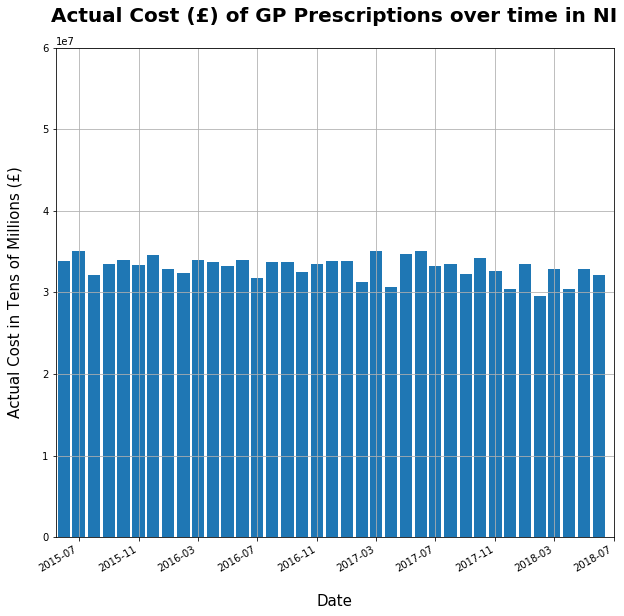

In [89]:
allDates = list(GPcost["Date"].unique())
allDates = sorted(allDates)
import matplotlib.pyplot as plt
import datetime

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.autofmt_xdate()
plt.xlabel('Date', fontsize = 15, labelpad = 20.0)
plt.ylabel('Actual Cost in Tens of Millions (£)', fontsize = 15, labelpad = 20.0)
plt.title('Actual Cost (£) of GP Prescriptions over time in NI', fontsize = 20, fontweight = 800, pad = 25.5)
ax.grid(True)
plt.bar(allDates, costPerMonth, width = 25)
ax.set_ylim([0,60000000])
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
plt.show()


<b> As we can see above there does not seem to be any noticable change over time with how much the NHS is spending over time on GP Prescriptions. It seems to have largely stayed the same, indeed it's probably gone slightly down going by the overall look of the graph and also taking into account inflation. Maybe we might see more if we do the same analysis but replace Actual Cost on the Y-axis with Total items instead </b>

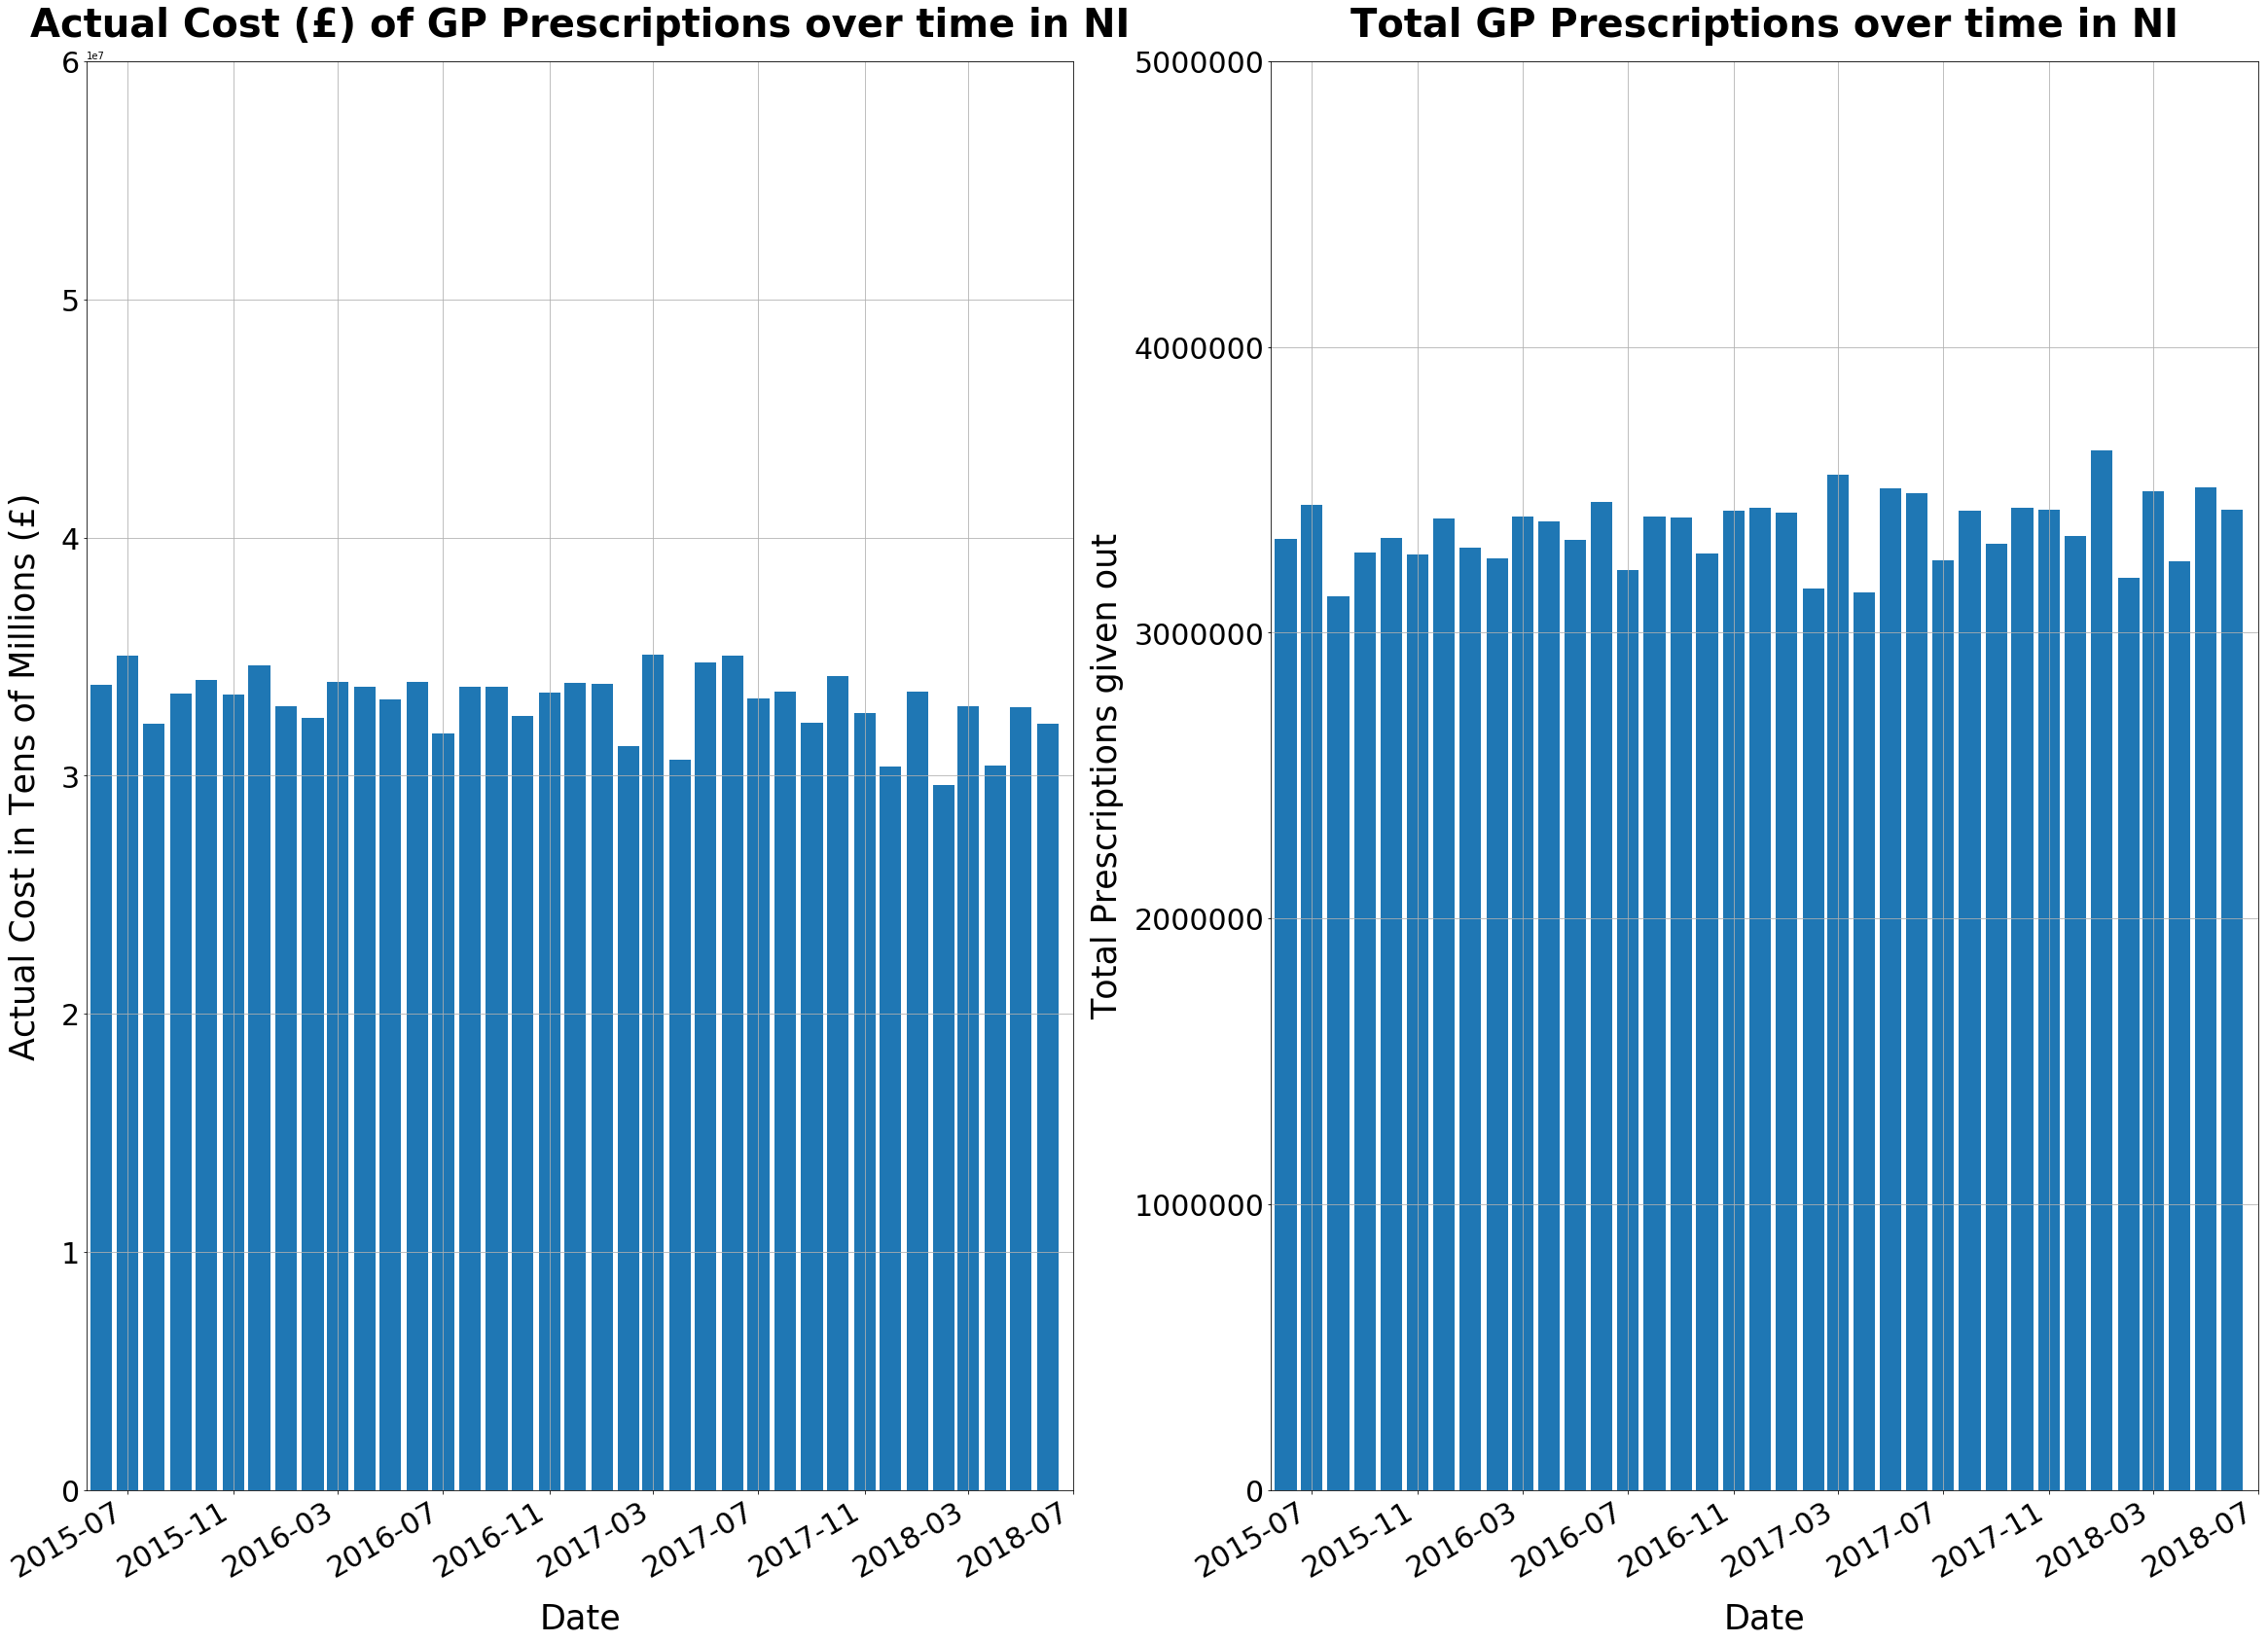

In [90]:

fig, (ax, ax2) = plt.subplots(1, 2)
fig.set_size_inches(40,30)
#plt.subplot(1, 2, 1)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('Actual Cost in Tens of Millions (£)', fontsize = 35, labelpad = 20.0)
ax.set_title('Actual Cost (£) of GP Prescriptions over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax.grid(True)
ax.bar(allDates, costPerMonth, width = 25)
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
ax.set_ylim([0,60000000])
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])


#plt.subplot(1, 2, 2)

ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Total Prescriptions given out', fontsize = 35, labelpad = 10.0)
ax2.set_title('Total GP Prescriptions over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax2.grid(True)
ax2.bar(allDates, itemsPerMonth, width = 25)
ax2.set_ylim([0,5000000])
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
ax2.set_yticks([1000000, 2000000, 3000000, 4000000, 5000000],\
             ['1', '2', '3', '4', '5'] )
plt.show()


# BNF Chapters
<b>In the below section I will attempt to showcase what types of drugs the NHS uses the most resources on. To do this I'll count the amount of mentions each specific BNF Chapter has in the accumulative GP_prescriptions dataframe below. This will hopefully highlight any errors in the labelling of BNF chapters when I combine all of the data from each year <b>

In [ ]:
dropcols = ["Unnamed: 17", "Unnamed: 18", "VTM_NM", "VMP_NM", "Total Quantity", \
             "Strength", "Presentation", "AMP_NM", "Gross Cost (£)" ]
GP_prescriptions = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing',\
                              'Practice', 'PRACTICE', dropcols) 
GP_prescriptions.info(memory_usage = "deep")

In [236]:
BNFChapters = dict(GP_prescriptions["BNF Chapter"].value_counts())
print(BNFChapters)

{4: 3574123, 2: 2253283, 13: 1563950, 6: 1418730, 3: 1184102, 9: 1120849, 1: 1067216, 5: 731280, 7: 676612, 10: 602877, 11: 593282, 20: 507559, 12: 409360, 21: 267218, 23: 254279, 8: 201914, '4': 100355, 22: 98011, '2': 62428, 15: 60398, 14: 48204, '13': 44657, '6': 42218, '9': 34343, '3': 34161, '1': 30365, 99: 25515, '5': 19994, '7': 19211, '11': 18074, '10': 16332, '20': 13993, '12': 11377, '21': 8690, '23': 8036, '8': 5818, 19: 4027, '22': 2912, '15': 1754, '14': 1619, '99': 332, '-': 156, '19': 47}


<b> As we can see from above there are errors in the data, namely that some of the BNF chapters have been labelled as str types rather than integer and so not all of the data from say Chapter 9 of the BNF classification is combined because it is split into the '9' (string) chapter and the 9 (integer) chapter. This can be resolvd by converting the entire BNF chapter column to an integer type. Before this however, I must deal with the '-' chapter which has 156 records in my data - a comparitively small amount overall, but it's ambiguity is worrisome so I'll drop these rows.

In [93]:
GP_prescriptions = GP_prescriptions[GP_prescriptions["BNF Chapter"] != '-']
GP_prescriptions["BNF Chapter"] = pd.to_numeric(GP_prescriptions["BNF Chapter"])
BNFChapters = dict(GP_prescriptions["BNF Chapter"].value_counts())
print(BNFChapters)

{4.0: 3674478, 2.0: 2315711, 13.0: 1608607, 6.0: 1460948, 3.0: 1218263, 9.0: 1155192, 1.0: 1097581, 5.0: 751274, 7.0: 695823, 10.0: 619209, 11.0: 611356, 20.0: 521552, 12.0: 420737, 21.0: 275908, 23.0: 262315, 8.0: 207732, 22.0: 100923, 15.0: 62152, 14.0: 49823, 99.0: 25847, 19.0: 4074}


<b> As we can see from the above output the data has been cleaned and we can proceed safely with our data </b>

In [96]:
BNFdf = GP_prescriptions[['BNF Chapter', 'Actual Cost (£)', 'Total Items']]
BNFdf = BNFdf.dropna()
BNFdf.reset_index(drop = True, inplace = True)
print(BNFdf.head())
BNFdf.info()

   BNF Chapter  Actual Cost (£)  Total Items
0         99.0           389.21         14.0
1          9.0            24.49          1.0
2          6.0            98.53          3.0
3          6.0            13.35          1.0
4          6.0            28.41          1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17139505 entries, 0 to 17139504
Data columns (total 3 columns):
BNF Chapter        float64
Actual Cost (£)    float64
Total Items        float64
dtypes: float64(3)
memory usage: 392.3 MB


In [97]:
BNFChapters = dict(BNFdf["BNF Chapter"].value_counts())
print(BNFChapters)

{4.0: 3674478, 2.0: 2315711, 13.0: 1608607, 6.0: 1460948, 3.0: 1218263, 9.0: 1155192, 1.0: 1097581, 5.0: 751274, 7.0: 695823, 10.0: 619209, 11.0: 611356, 20.0: 521552, 12.0: 420737, 21.0: 275908, 23.0: 262315, 8.0: 207732, 22.0: 100923, 15.0: 62152, 14.0: 49823, 99.0: 25847, 19.0: 4074}


<b>The drugs in the GP prescriptions database are classified by what area of the body they treat using BNF codes. As a way of making my data visulaisation more clear and easy to read I created the function below to change all of the BNF Chapters to their corresponding description <b>


In [95]:
#Using this function I will change the list values in BNFChapters list to their corresponding description on the BNF book. 
# Will make the data far more understandable and easy to interpret
def replaceChaptersWithDescription(chapterlist):
    for index, item in enumerate(chapterlist, start = 0):
        item = int(item)
        if item == 1:
            chapterlist[index] = "Gastro Intestinal System"
            
        elif item == 2:
            chapterlist[index] = "Cardiovascular System"
            
        elif item == 3:
            chapterlist[index] = "Respiratory System"
        
        elif item == 4:
            chapterlist[index] = "Central Nervous System"
            
        elif item == 5:
            chapterlist[index] = "Infections"
        
        elif item == 6:
            chapterlist[index] = "Endocrine System"
            
        elif item == 7:
            chapterlist[index] = "Obstetrics, Gynaecology and Urinary–tract Disorders"
        
        elif item == 8:
            chapterlist[index] = "Malignant disease and immunosuppression"
        
        elif item == 9:
            chapterlist[index] = "Nutrition and Blood"
            
        elif item == 10:
            chapterlist[index] = "Musculoskeletal and Joint Diseases"
        
        elif item == 11:
             chapterlist[index] = "Eyes"
        
        elif item == 13:
             chapterlist[index] = "Skin"
                
        elif item == 14:
            chapterlist[index] = "Immunological products and vaccines"
            
        elif item == 15:
            chapterlist[index] = "Anaesthesia"
        
        elif item == 18:
             chapterlist[index] = "Preparations used in diagnosis"
        
        elif item == 19:
             chapterlist[index] = "Other drugs and preparations"
                
        elif item == 20:
             chapterlist[index] = "Dressings"
                
        elif item == 21:
            chapterlist[index] = "Appliances"
            
        elif item == 22:
            chapterlist[index] = "Incontinence appliances"
        
        elif item == 23:
             chapterlist[index] = "Stoma appliances"
        
        elif item == 99:
             chapterlist[index] = "Unclassified"
                
        else: 
             chapterlist[index]  = "Other"
            
    return chapterlist

<b>Using the below code I will single out the top 10 types of prescriptions/preparations and put them in a dictionary, going by the amount of entries they have in the dataframe. Those types of prescription/preparation outside of the top 10 will be filtered into the 'other' type.</b>

In [98]:
import matplotlib.pyplot as plt

BNFChapters = dict(BNFdf["BNF Chapter"].value_counts())

#The below code will single out the top 10 BNF chapters and place them in a convenient list which I can sort through later
Chapternames = []
amount = []
numberOfChapters = 10 # The number of chapters here will be 9 as the tenth will be the 'other' category

for key in sorted(BNFChapters, key=BNFChapters.get, reverse=True):
    Chapternames.append(key)
    amount.append(BNFChapters.get(key))
    
BNFChapterslist = Chapternames[0:numberOfChapters]
valsperBNFChapters = amount[0:numberOfChapters]


#This code will make sure that no database entries are left behind, the remaining BNF chapters outside the top 11 will be 
# included under the umbrella label "Other"
other = 0
for i in range(numberOfChapters, len(amount)):
    other += amount[i]
BNFChapterslist.append(0)
valsperBNFChapters.append(other)

print("BNF Chapters list before they are processed with replaceChaptersWithDescription\
 function:\n", BNFChapterslist, "\n") 
improvedBNFlabels = replaceChaptersWithDescription(BNFChapterslist)
print("After function:\n", improvedBNFlabels, "\n")
print("The amount of times each type of prescription was recorded in the dataframe respectively: \n", \
     valsperBNFChapters)

BNF Chapters list before they are processed with replaceChaptersWithDescription function:
 [4.0, 2.0, 13.0, 6.0, 3.0, 9.0, 1.0, 5.0, 7.0, 10.0, 0] 

After function:
 ['Central Nervous System', 'Cardiovascular System', 'Skin', 'Endocrine System', 'Respiratory System', 'Nutrition and Blood', 'Gastro Intestinal System', 'Infections', 'Obstetrics, Gynaecology and Urinary–tract Disorders', 'Musculoskeletal and Joint Diseases', 'Other'] 

The amount of times each type of prescription was recorded in the dataframe respectively: 
 [3674478, 2315711, 1608607, 1460948, 1218263, 1155192, 1097581, 751274, 695823, 619209, 2542419]


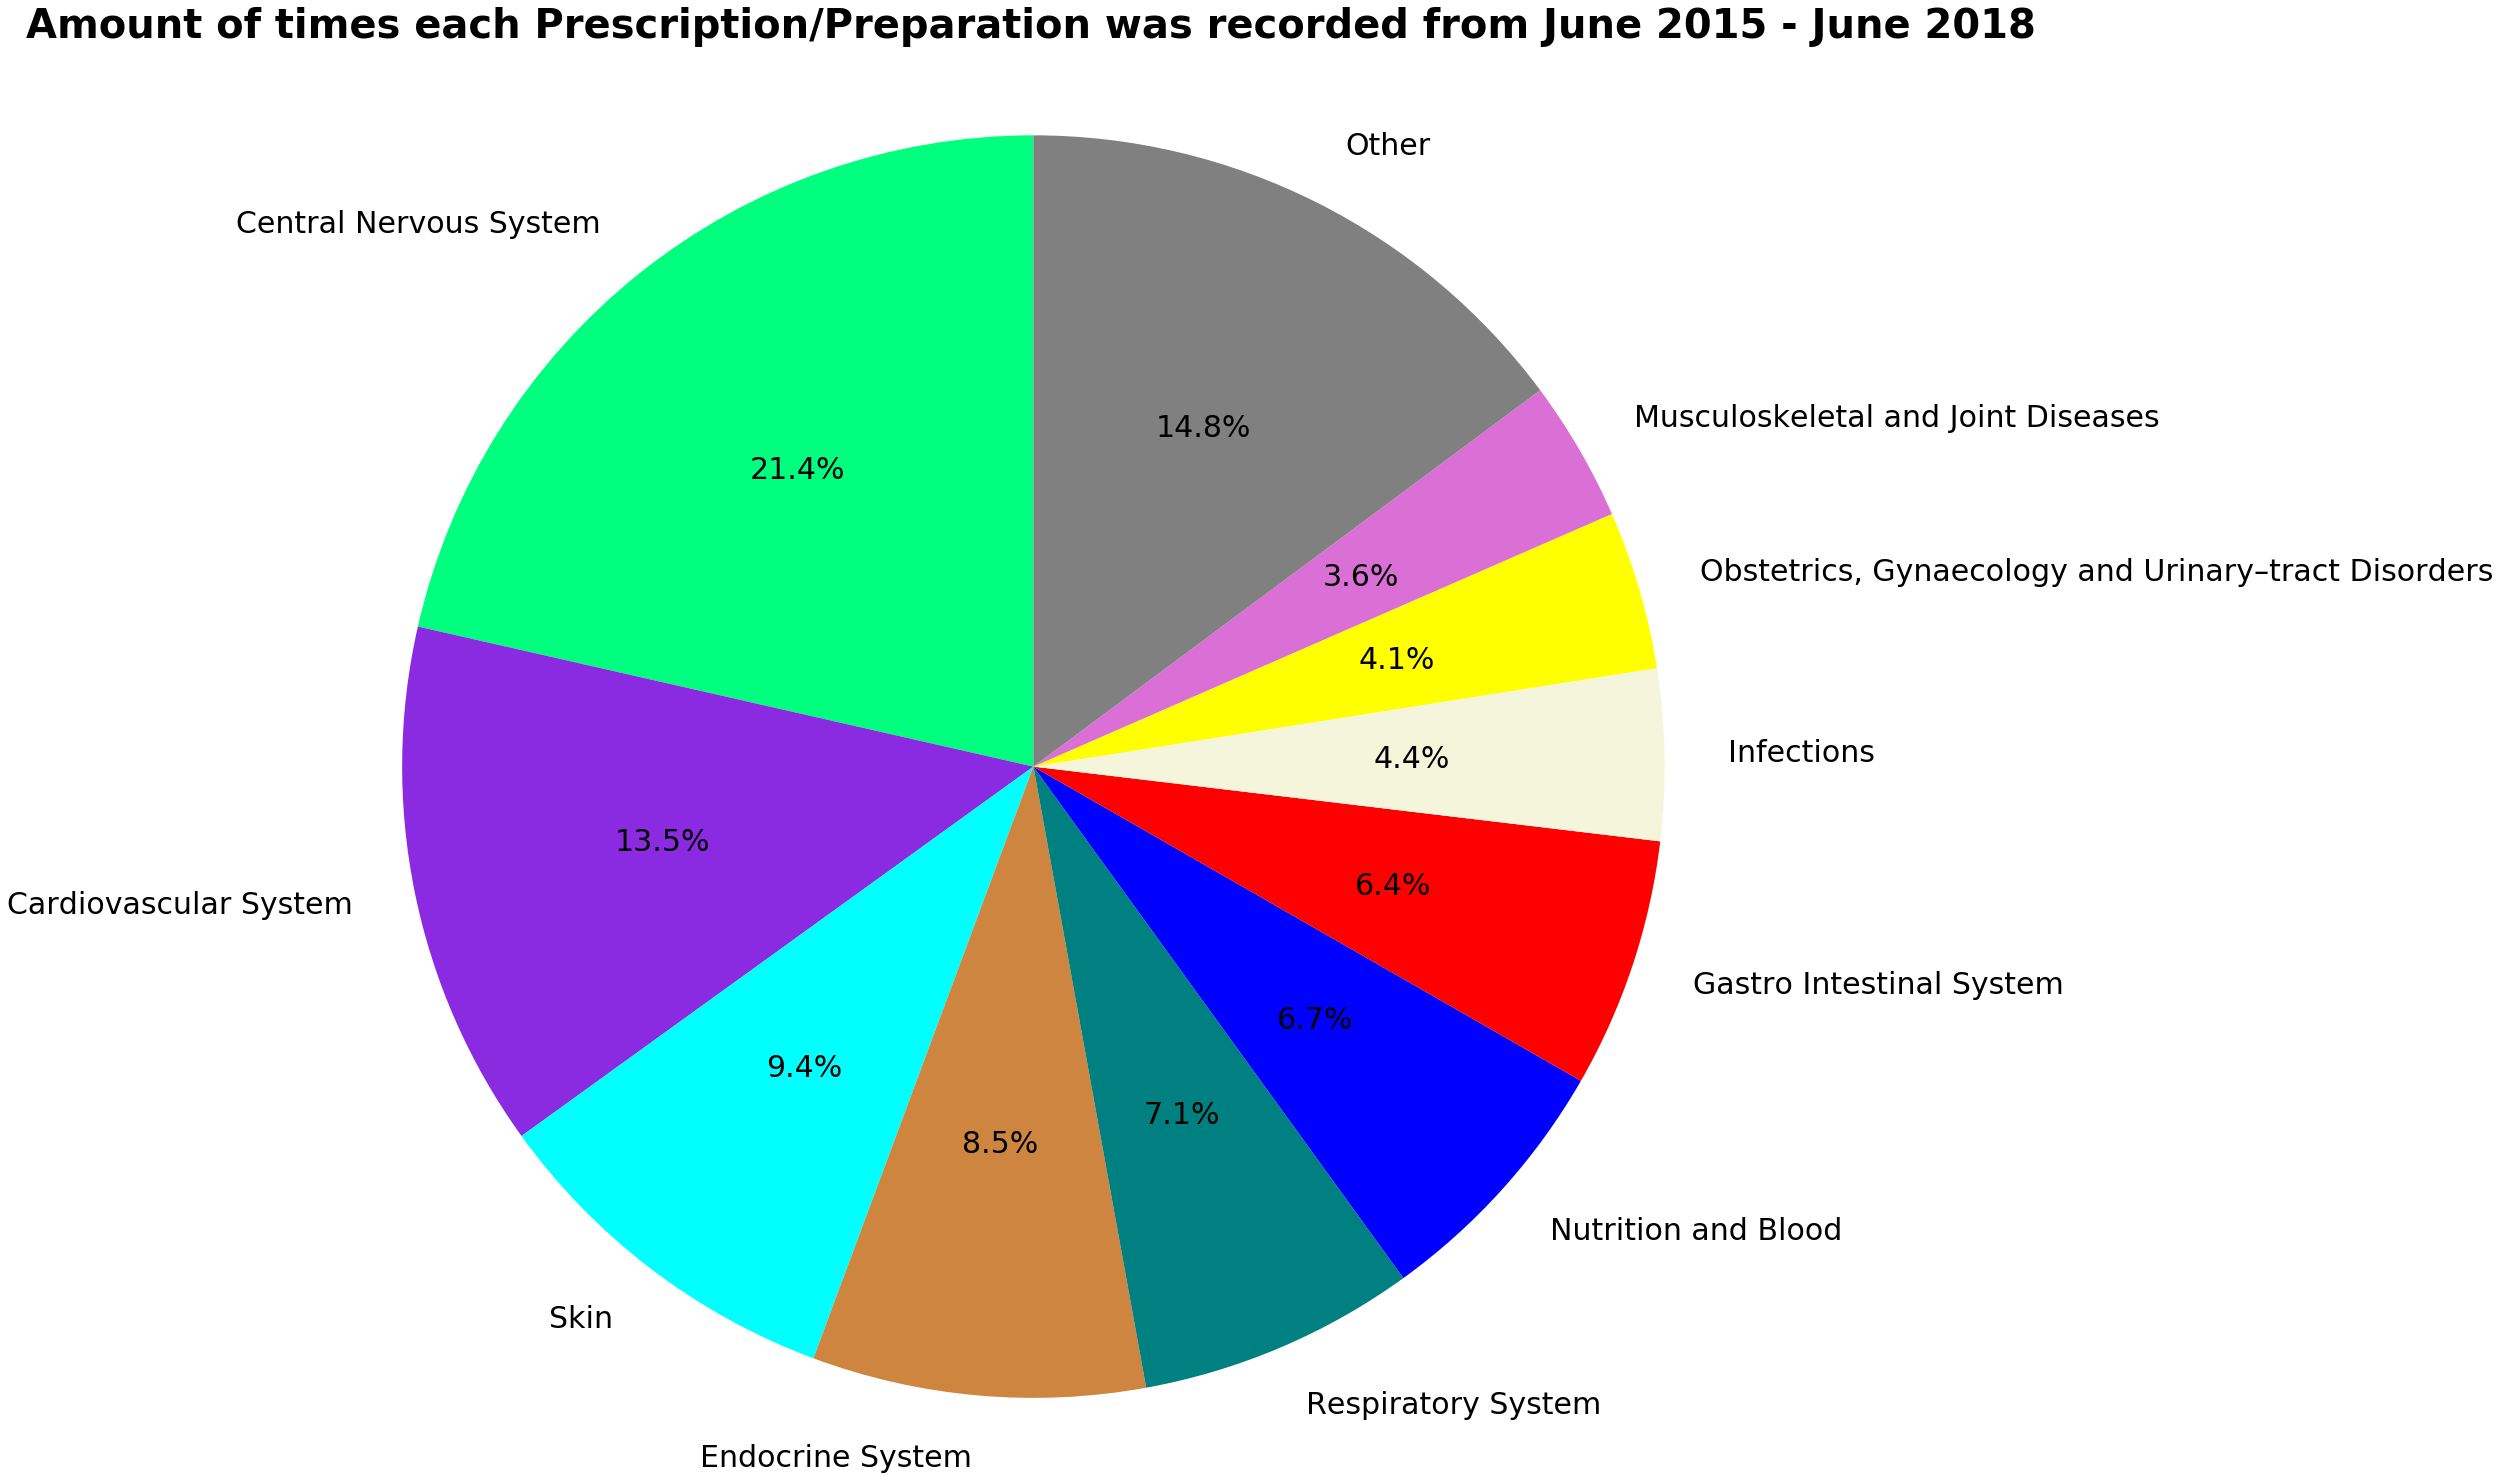

In [113]:
fig1, axl = plt.subplots() # Ask John what this means or google it

colours = ["springgreen", "blueviolet", "cyan", "peru", "teal", "blue", "red",\
           "beige", "yellow", "orchid", "grey" ]
axl.pie(valsperBNFChapters, labels = improvedBNFlabels, autopct = '%1.1f%%', \
        shadow = False, startangle = 90, colors = colours, textprops={'fontsize': 30} )
axl.axis('equal')
plt.title('Amount of times each Prescription/Preparation was recorded from June 2015 - June 2018', \
          fontsize = 40, fontweight = 1000, pad = 50.5)
fig1.set_size_inches(25,25)
plt.show()

<b> The above shows the percentage of the amount of entries in the database per BNF Chapter, however this might not be truly representative of their true importance in terms of the resources spent on each type of drug. A much more authentic measure or priority among these drug types would be to measure the actual cost to the NHS per drug classification, as well as the total prescriptions allocated; perhaps then we could possibly see a much different graph. <b>

In [102]:
allBNF = list(BNFdf["BNF Chapter"].unique())
allBNF = list(map(int, allBNF))
allBNF = sorted(allBNF)

costs = groupbylist(BNFdf, "Actual Cost (£)" , "BNF Chapter")

items = groupbylist(BNFdf, "Total Items", "BNF Chapter" )
    
print("All BNF chapters \n", allBNF, "\n")
print("Cost per BNF chapter list \n", costs, "\n")
print("Items per BNF chapter list \n", items, "\n")

All BNF chapters 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22, 23, 99] 

Cost per BNF chapter list 
 [60450189.64, 149144471.71, 131234999.19, 303181883.47, 27377808.31, 159339819.52, 48017833.68, 33050605.63, 90227691.33, 28347858.22, 13947214.72, 11210372.99, 47084437.99, 2806515.89, 7601709.6, 133590.95, 23573083.86, 18526582.89, 4597685.6, 27690300.65, 36447288.7] 

Items per BNF chapter list 
 [12110239.0, 28295486.0, 9646773.0, 31122034.0, 5559169.0, 10335605.0, 3159646.0, 499669.0, 5798580.0, 4691068.0, 1986584.0, 1889461.0, 6240694.0, 127757.0, 196041.0, 9291.0, 1164907.0, 548434.0, 163986.0, 360800.0, 564417.0] 



<b> Creating dictionaries out of these lists so that each list entry corresponds to a BNF chapter directly</b>

In [103]:
costPerBNFChapter = dict(zip((allBNF), (costs)))
itemsPerBNFChapter = dict(zip((allBNF), (items)))
print("Cost per BNF chapter dictionary \n", costPerBNFChapter)
print("\nItems per BNF chapter dictionary \n", itemsPerBNFChapter)

Cost per BNF chapter dictionary 
 {1: 60450189.64, 2: 149144471.71, 3: 131234999.19, 4: 303181883.47, 5: 27377808.31, 6: 159339819.52, 7: 48017833.68, 8: 33050605.63, 9: 90227691.33, 10: 28347858.22, 11: 13947214.72, 12: 11210372.99, 13: 47084437.99, 14: 2806515.89, 15: 7601709.6, 19: 133590.95, 20: 23573083.86, 21: 18526582.89, 22: 4597685.6, 23: 27690300.65, 99: 36447288.7}

Items per BNF chapter dictionary 
 {1: 12110239.0, 2: 28295486.0, 3: 9646773.0, 4: 31122034.0, 5: 5559169.0, 6: 10335605.0, 7: 3159646.0, 8: 499669.0, 9: 5798580.0, 10: 4691068.0, 11: 1986584.0, 12: 1889461.0, 13: 6240694.0, 14: 127757.0, 15: 196041.0, 19: 9291.0, 20: 1164907.0, 21: 548434.0, 22: 163986.0, 23: 360800.0, 99: 564417.0}


<b> That's much better now, each BNF chapter has now been grouped by the sum of it's respective cost and the total of times a drug in that BNF chapter have been prescribed. This will give us a far more accurate visualisation of what drugs the NHS mainly focuses it's resources on. The code below to create the new pie chart is just a rehash of the code I used to create my original pie chart, but this timeit has these two plots of total items and total cost side by side so we can see at a glance, what the NHS spends it's resources on in regards to category of drug. <b>

<b> I thought it would be useful to create a function of the method I used above to create labels and values for my pie chart earlier, it could possibly be reused later in my code as it's a very basic, easy way to quickly visualise simple data, especially when there are too many categories of labels to choose from.</b>

In [4]:
#Handy function returning two lists from a previously made dict; one for labels on a chart and another for values
#Creates a top number of values to plot and puts the rest in "Other" by default, this "other" label can be changed though to suit the user
def createValuesandLabels(dictionary, numvals, otherlabel = "Other"):
    labels = []
    values = []

    for key in sorted(dictionary, key=dictionary.get, reverse=True):
        labels.append(key)
        values.append(dictionary.get(key))

    labelslist = labels[0:numvals]
    valueslist = values[0:numvals]


#This code will make sure that no database entries are left behind, the remaining  
#BNF chapters outside the top 11 will be included under the umbrella label "Other"
    other = 0
    for i in range(numvals, len(values)):
        other += values[i]
    labelslist.append(otherlabel)
    valueslist.append(other)
    return labelslist, valueslist




<function matplotlib.pyplot.show(*args, **kw)>

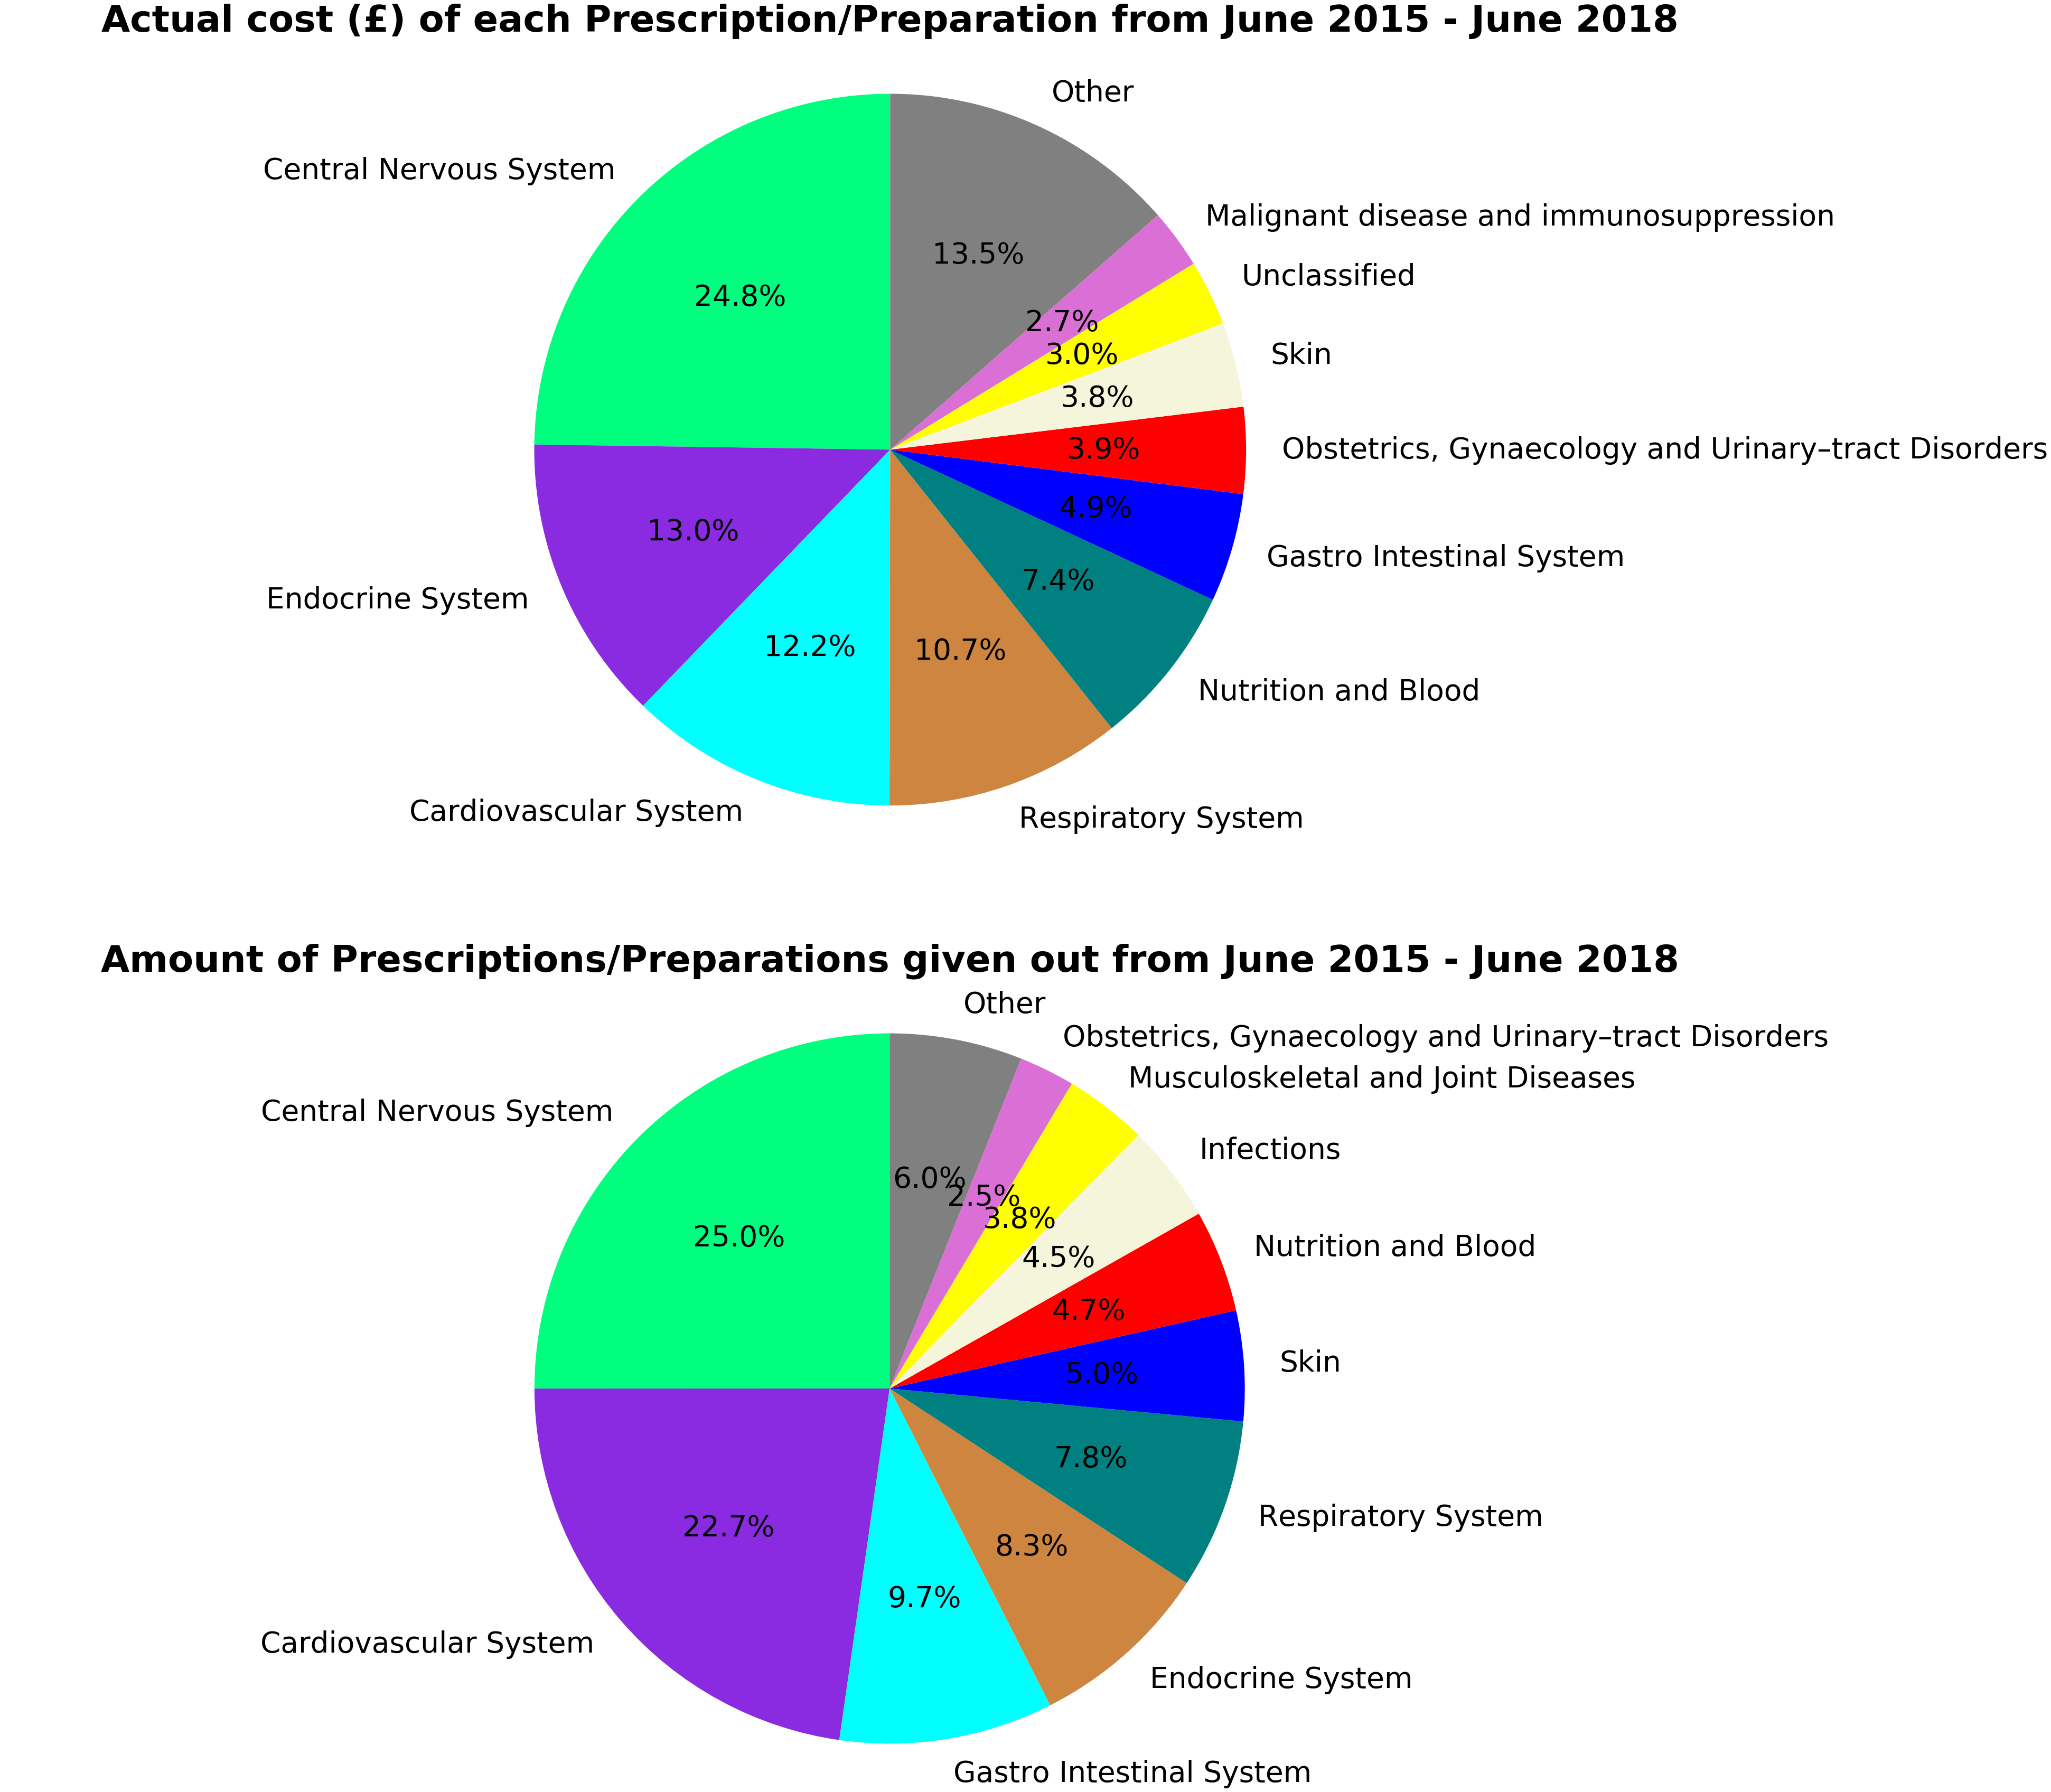

In [114]:

BNFChapterslist1, valsperBNFChapters1 = createValuesandLabels(costPerBNFChapter, 10, otherlabel = 98)
BNFChapterslist2, valsperBNFChapters2 = createValuesandLabels(itemsPerBNFChapter, 10, otherlabel = 98)
newBNFlabels = replaceChaptersWithDescription(BNFChapterslist1)
newBNFlabels1 = replaceChaptersWithDescription(BNFChapterslist2)

fig1, (ax1, ax2) = plt.subplots(2) 
ax1.pie(valsperBNFChapters1, labels = newBNFlabels, autopct = '%1.1f%%',\
        shadow = False, startangle = 90, colors = colours, textprops={'fontsize': 55} )
ax1.set_title('Actual cost (£) of each Prescription/Preparation from June 2015 - June 2018', \
          fontsize = 70, fontweight = 1000, pad = 50.5)
ax1.axis('equal')

ax2.pie(valsperBNFChapters2, labels = newBNFlabels1, autopct = '%1.1f%%',\
        shadow = False, startangle = 90, colors = colours, textprops={'fontsize': 55} )
ax2.set_title('Amount of Prescriptions/Preparations given out from June 2015 - June 2018', \
          fontsize = 70, fontweight = 1000, pad = 50.5)
ax2.axis('equal')
fig1.set_size_inches(60,60)
plt.show

<b> This visualisation has reinforced the suggestion that the most NHS resources are being spent on drugs in the Central Nervous System. This is consitent among both the total amount of prescriptions and the total cost of these prescriptions We'll need to investigate this further by singling out this category of drugs in my next analysis and breaking it down further by BNF section <b>

# Prescriptions for the Central Nervous system
<b> For this part we only want drugs in the central nervous system classification, below I will slice the main GP_prescriptions list I created earlier, in the cell below I'll load it again for ease of access for this part, then I'll slice the list by only selecting rows with the BNF Chapter 4

In [68]:
dropcols = ["Unnamed: 17", "Unnamed: 18", "Strength", "Presentation", "AMP_NM", "Gross Cost (£)" ]
GP_prescriptions = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing',\
                              'Practice', 'PRACTICE', dropcols) 

#Again I have to drop the '-' column so I can parse the 'BNF Chapter' column to a
#numeric. Also I need to convert both of the columns of interest to numeric so there
#are no mistaken duplicate string, numeric entries
GP_prescriptions = GP_prescriptions[GP_prescriptions["BNF Chapter"] != '-']
GP_prescriptions["BNF Chapter"] = pd.to_numeric(GP_prescriptions["BNF Chapter"])
GP_prescriptions["BNF Section"] = pd.to_numeric(GP_prescriptions["BNF Section"])

CNSdf = GP_prescriptions[GP_prescriptions["BNF Chapter"] == 4]
print(CNSdf.head())
CNSdf.info()

    Actual Cost (£)  BNF Chapter         BNF Code BNF Paragraph  BNF Section  \
92             3.81          4.0  0402010A0AAAGAG             1          2.0   
93             6.75          4.0  0402010A0AAAAAA             1          2.0   
94             5.02          4.0  0402010A0AAABAB             1          2.0   
95             8.44          4.0  0403010B0AAAGAG             1          3.0   
96            10.77          4.0  0403010B0AAAHAH             1          3.0   

   BNF Sub-Paragraph  Month  PRACTICE  Total Items  Total Quantity  \
92                 0    4.0       1.0          2.0            56.0   
93                 0    4.0       1.0          2.0            56.0   
94                 0    4.0       1.0          1.0           112.0   
95                 0    4.0       1.0          4.0           314.0   
96                 0    4.0       1.0          8.0           392.0   

                        VMP_NM         VTM_NM    Year  
92   Amisulpride 100mg tablets    Amisulpr

In [7]:
BNFSection = dict(CNSdf["BNF Section"].value_counts())
print("Sorted keys of the BNF section dictionary to show there are no",\
      " anomalies/duplicate entries:\n\n", sorted(BNFSection), \
     "\n\n Each section is a subset of the sections of BNF Chapter 4")

Sorted keys of the BNF section dictionary to show there are no  anomalies/duplicate entries:

 [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0] 

 Each section is a subset of the sections of BNF Chapter 4


In [29]:
allBNFCodes = list(CNSdf["BNF Code"].unique())
print("There are", len(allBNFCodes),\
      "specific type of drugs used to treat the central nervous system")

There are 1812 specific type of drugs used to treat the central nervous system


<b>There are far too many specific drugs to go through, sorting by BNF Code seems to be a bad idea. Don't write this off completely though, there may be specific outliers that could be notable? </b>

In [30]:
allSec = list(CNSdf["BNF Section"].unique())
allSec = list(map(int, allSec))
allSec = sorted(allSec)
costPerSection = groupbylist(CNSdf, "Actual Cost (£)", "BNF Section")

itemsPerSection = groupbylist(CNSdf, "Total Items", "BNF Section")

    
costPerSection = dict(zip((allSec), (costPerSection)))
itemsPerSection = dict(zip((allSec), (itemsPerSection)))
print("Cost per BNF Section in Central nervous system list \n", \
      costPerSection)
print("\nItems per BNF Section in Central nervous system list \n",\
      itemsPerSection)

Cost per BNF Section in Central nervous system list 
 {1: 13810110.83, 2: 33263564.95, 3: 33027570.44, 4: 9185384.33, 5: 892119.12, 6: 7466236.63, 7: 85646560.24, 8: 94440518.05, 9: 13768212.91, 10: 6217632.29, 11: 5463973.68}

Items per BNF Section in Central nervous system list 
 {1: 4427062.0, 2: 1749634.0, 3: 9248568.0, 4: 196633.0, 5: 47864.0, 6: 1244188.0, 7: 10074021.0, 8: 2893956.0, 9: 479556.0, 10: 256940.0, 11: 503612.0}


<b> Like the replaceChaptersWithDescription() function I created earlier, I can do this with the Sections data to make my new pie charts look more readable.
    
Also, The function I created earlier of creating values and labels will be useful as although there aren't many sections within BNF chapter 4 - some of these sections are too small to be relevant and are better being sorted into the 'other' category that my function provides. Also the function aligns the largest values to go on the pie chart following in descending order which makes the pie chart more attractive and legible</b>

In [97]:
def replaceSectionsWithDescription(sectionlist):
    for index, item in enumerate(sectionlist, start = 0):
        item = int(item)
        if item == 1:
            sectionlist[index] = "Hypnotics and anxiolytics"
            
        elif item == 2:
            sectionlist[index] = "Drugs used in psychoses and related disorders"
            
        elif item == 3:
            sectionlist[index] = "Antidepressant drugs"
        
        elif item == 4:
            sectionlist[index] = "CNS stimulants and drugs used for attention deficient hyperactivity disorder"
            
        elif item == 5:
            sectionlist[index] = "Drugs used in the treatment of obesity"
        
        elif item == 6:
            sectionlist[index] = "Drugs used in nausea and vertigo"
            
        elif item == 7:
            sectionlist[index] = "Analgesics"
        
        elif item == 8:
            sectionlist[index] = "Antiepileptics"
        
        elif item == 9:
            sectionlist[index] = "Drugs used in Parkinsonism and related disorders"
            
        elif item == 10:
            sectionlist[index] = "Drugs used in substance dependence"
        
        elif item == 11:
             sectionlist[index] = "Drugs for dementia"
                
        else: 
             sectionlist[index]  = "Other"
            
    return sectionlist

newBNFSection1, costPerSection1 = createValuesandLabels(costPerSection, 5, otherlabel = 98)
newBNFSection2, itemsPerSection1 = createValuesandLabels(itemsPerSection, 5, otherlabel = 98)
newBNFSection1 = replaceSectionsWithDescription(newBNFSection1)
newBNFSection2 = replaceSectionsWithDescription(newBNFSection2)
# newBNFSection = replaceSectionsWithDescription(allSec)
print(newBNFSection1)
print(costPerSection1)

['Antiepileptics', 'Analgesics', 'Drugs used in psychoses and related disorders', 'Antidepressant drugs', 'Hypnotics and anxiolytics', 'Other']
[94440518.05, 85646560.24, 33263564.95, 33027570.44, 13810110.83, 42993558.96]


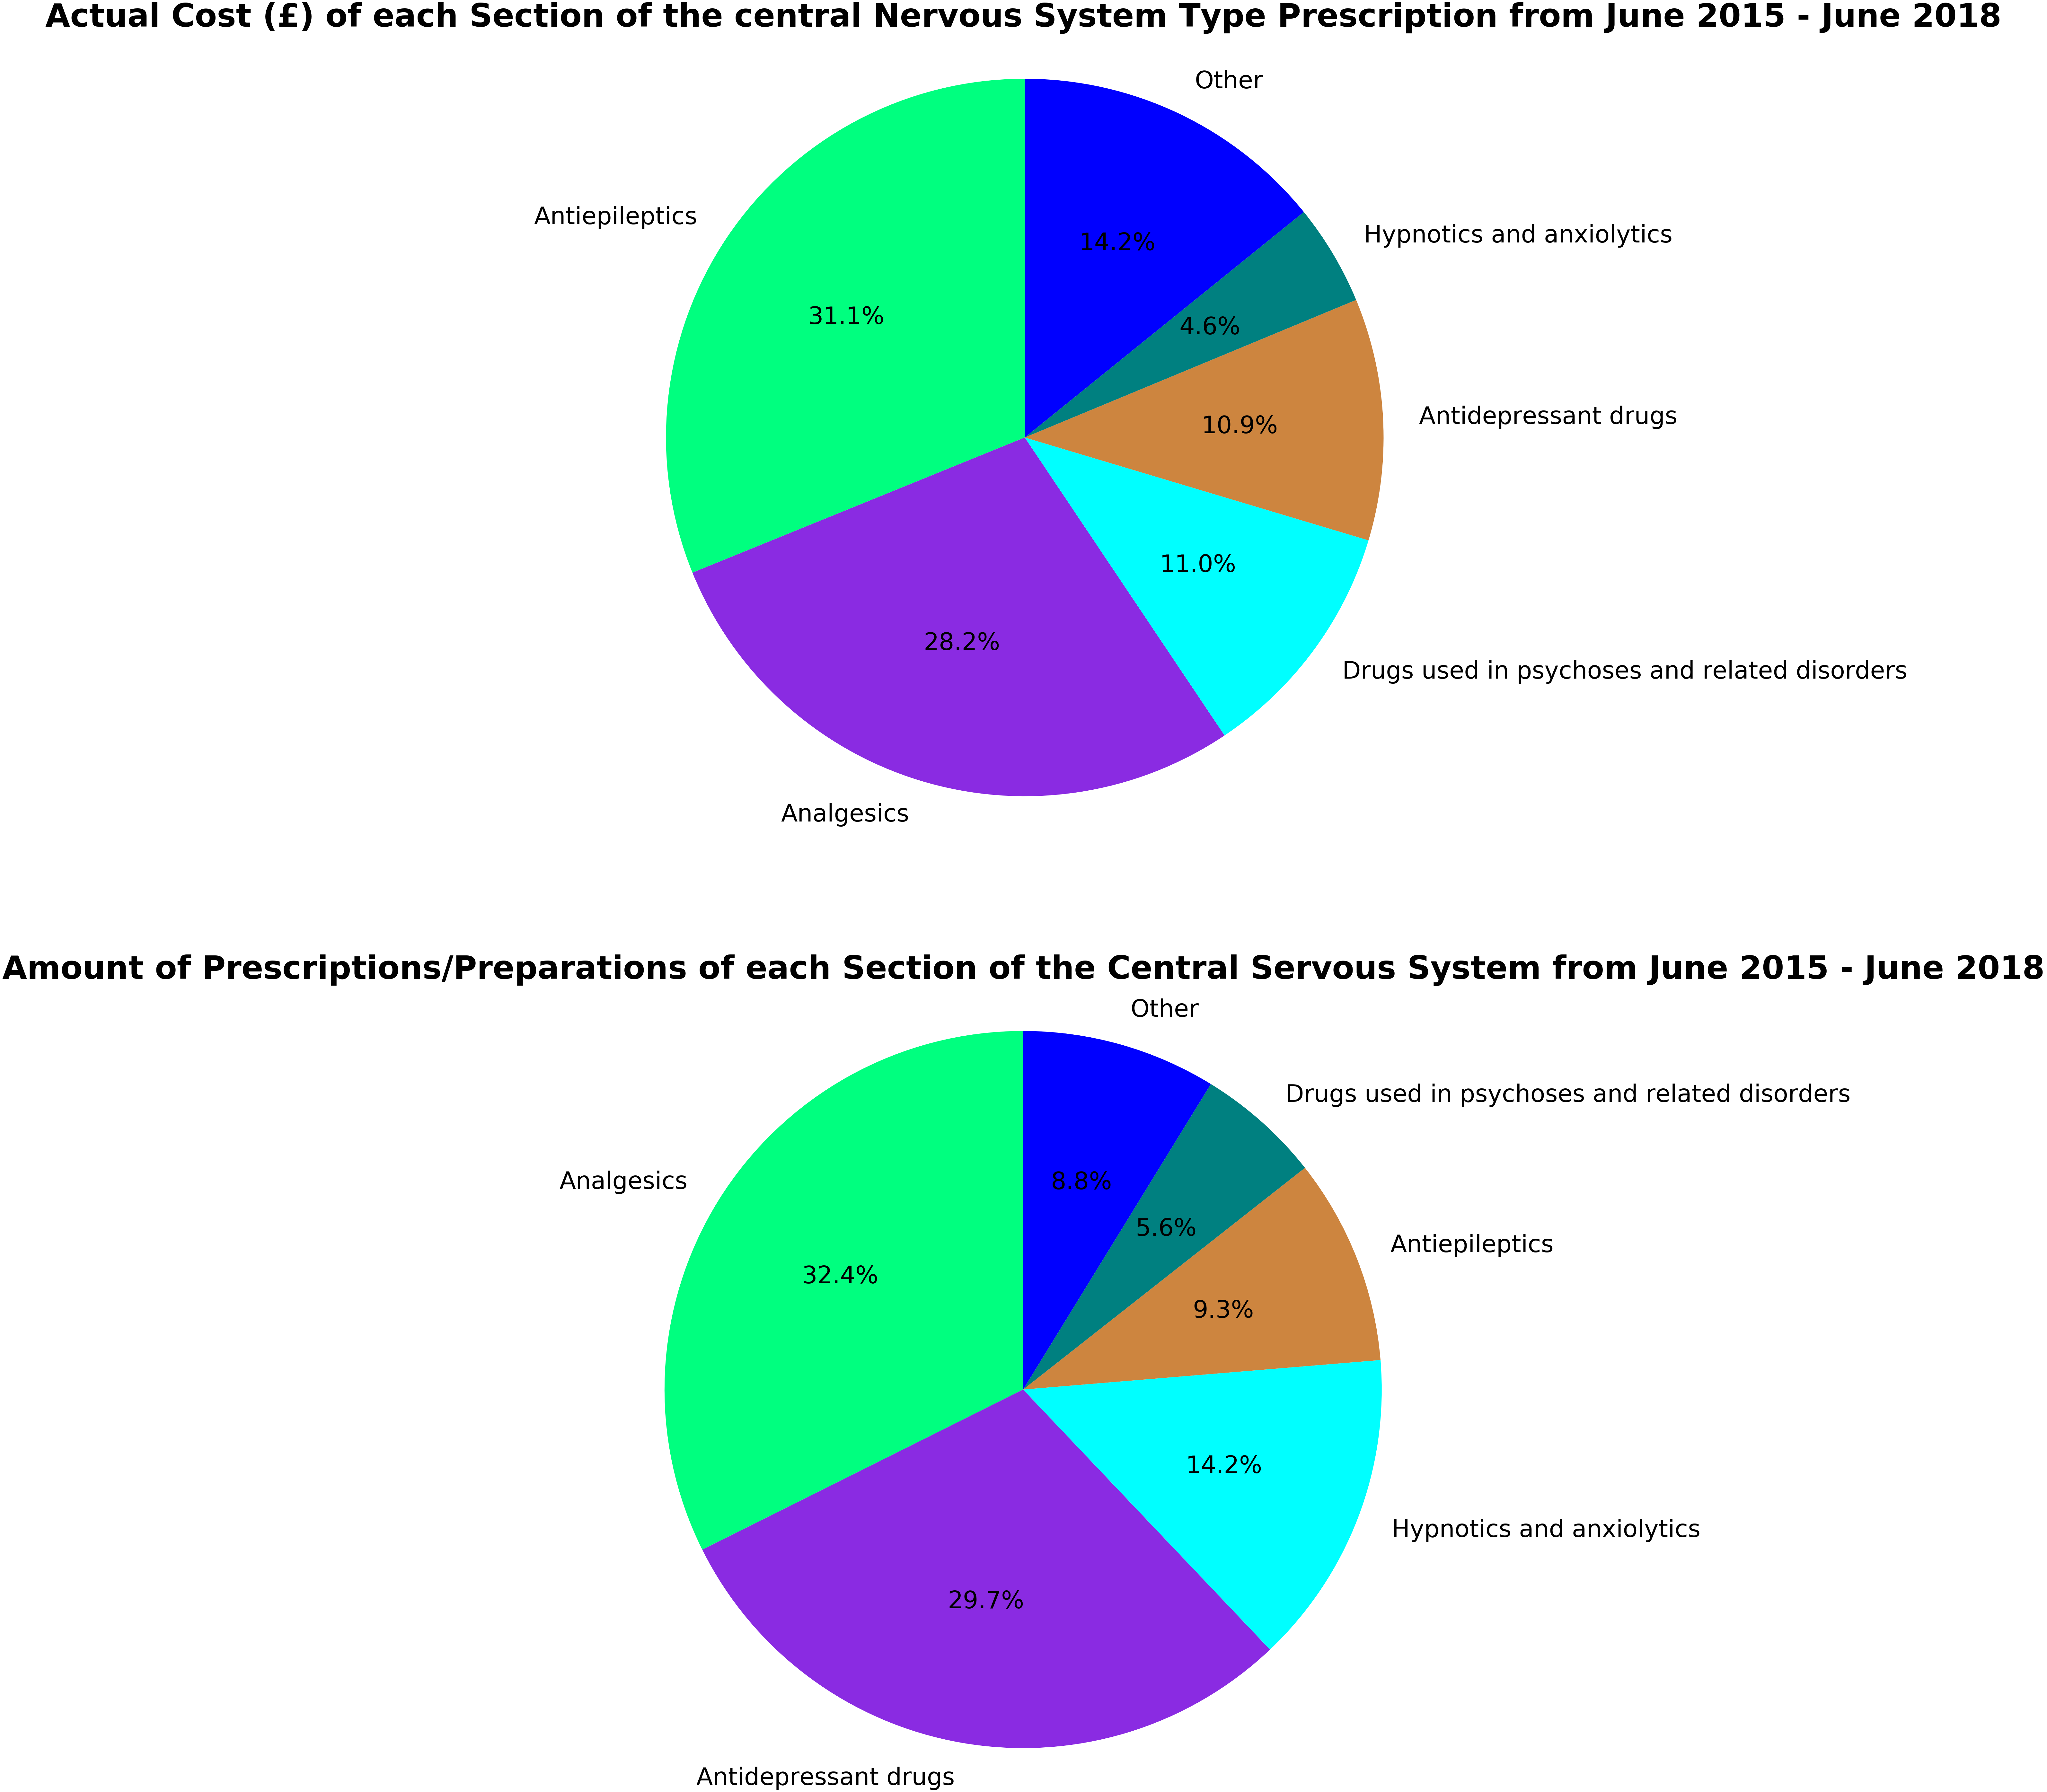

In [116]:
fig1, (ax1, ax2) = plt.subplots(2)
ax1.pie(costPerSection1, labels = newBNFSection1, autopct = '%1.1f%%',\
        shadow = False, startangle = 90, colors = colours, textprops={'fontsize': 75} )
ax1.set_title('Actual Cost (£) of each Section of the central Nervous System Type Prescription from June 2015 - June 2018', \
          fontsize = 100, fontweight = 1000, pad = 50.5)
ax1.axis('equal')


ax2.pie(itemsPerSection1, labels = newBNFSection2, autopct = '%1.1f%%',\
        shadow = False, startangle = 90, colors = colours, textprops={'fontsize': 75} )
    
ax2.set_title('Amount of Prescriptions/Preparations of each Section of the Central Servous System from June 2015 - June 2018', \
          fontsize = 100, fontweight = 1000, pad = 50.5)
ax2.axis('equal')
fig1.set_size_inches(100,100)

plt.show()

This information got me excited as it was surprising to me the cost of antiepileptics (AEDs) was the greatest cost of drug category rather than what I expected it to be which was either painkillers (analgesics) or antidepressants. While these are the most prescribed medicines they aren't the medicines that cost the NHS the most.
    
My immediate thought was that maybe CBD oil would be a far more cost effective way of treating seizures, especially in extreme or hard to treat cases of epilepsy as I had read about it in passing before, also people who suffer these extreme cases of epilepsy are often prescribed many AEDs in conjunction with each other which can be a huge cost to the NHS, whereas often CBD oil can be prescribed as a monotherapy.
    
Unfortunately I was not able to validate my hypothesis that CBD oil could alleviate the cost of antieplieptic medication, as it was very costly when compared to other antiepileptics, largely this has been down to the massive regulations on cannabis in the UK and also CBD oil firms don't have the advantage of economies of scale that large pharmacuticals like Pfizer has. Maybe with time the cost will go down and CBD oil could be seen as a solution to the huge cost of antiepileptics in the future. Especially when CBD oil can be prescribed on it's own whereas a lot of the time antiepileptics are prescribed in combination with other antiepileptics.
    

# Antiepileptics
Despite this although, I decided to investigate further what antiepileptics cost the NHS so much and if they could be substituted for a cheaper alternative. Perhaps resorting to generic prescriptions instead of name brand prescriptions could save money.

According to the official BNF prescribing website in the majority of cases a generic version of the prescription is recommended:

<b>Where non-proprietary (‘generic’) titles are given, they should be used in prescribing. This will enable any suitable product to be dispensed, thereby saving delay to the patient and sometimes expense to the health service. The only exception is where there is a demonstrable difference in clinical effect between each manufacturer’s version of the formulation, making it important that the patient should always receive the same brand; in such cases, the brand name or the manufacturer should be stated.</b>

Source: https://bnf.nice.org.uk/guidance/guidance-on-prescribing.html

Also via studies of the American Epilepsy society, the switching between Branded and Generic does not damage the effectiveness of treatment:
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3280470/

<b>Below I'll use VTM_NM to identify particular drugs, each unique VTM_NM is a specific drug chemical. Also I'll use BNF Code to single out which drugs are generic and which drugs are branded. I'll have to remove rows which don't have a record for BNF Code first as they throw up an error when I attempt to split the string to determine if they're generic or not. This is beter demonstrated below<b>

In [90]:
antiepilepticsdf = CNSdf[CNSdf["BNF Section"] == 8]
antiepilepticsdf.reset_index(inplace = True, drop = True)
err = antiepilepticsdf[antiepilepticsdf["BNF Code"] == '-']
err.reset_index(inplace = True, drop = True)
print(err.head())
print(err.info())

   Actual Cost (£)  BNF Chapter BNF Code BNF Paragraph  BNF Section  \
0             44.5          4.0        -             2          8.0   
1            102.5          4.0        -             2          8.0   
2             82.0          4.0        -             2          8.0   
3             91.5          4.0        -             2          8.0   
4             85.5          4.0        -             2          8.0   

  BNF Sub-Paragraph  Month  PRACTICE  Total Items  Total Quantity  \
0                 0    4.0       1.0          1.0             2.0   
1                 0    4.0       6.0          1.0             5.0   
2                 0    4.0      13.0          1.0             4.0   
3                 0    4.0      14.0          1.0             4.0   
4                 0    4.0      15.0          1.0             4.0   

                                              VMP_NM     VTM_NM    Year  
0  Midazolam 7.5mg/1.5ml oromucosal solution pre-...  Midazolam  2016.0  
1  Midazol

<b> The drugs above have been entered in without a BNF Code, I will be unable to split these drugs into generic/non-generic so they are worthless to my investigation. Although they total 3716 rows; they must be dropped <b>

In [91]:
antiepilepticsdf = antiepilepticsdf[antiepilepticsdf["BNF Code"] != '-']
print(("From June 2015 - June 2018 antiepileptics have cost NI £%.2f:") % (mySum(antiepilepticsdf['Actual Cost (£)'])))
print("There are", len(antiepilepticsdf.index), "records of antiepileptic prescriptions dispensed in my database")
print(len(err.index), "records have been removed due to not having an entry for the BNF code")

From June 2015 - June 2018 antiepileptics have cost NI £94142306.76:
There are 692852 records of antiepileptic prescriptions dispensed in my database
3716 records have been removed due to not having an entry for the BNF code


In [92]:
allBNFCodes = list(antiepilepticsdf["BNF Code"].unique())
print("There are", len(allBNFCodes),\
            "specific types of drugs used to treat epilepsy")
allparagraphs = list(antiepilepticsdf["BNF Paragraph"].unique())
print("There are", len(allparagraphs),\
            "specific sub-groups of drugs to treat epilepsy")

There are 284 specific types of drugs used to treat epilepsy
There are 4 specific sub-groups of drugs to treat epilepsy


<b> Although above it says there are 283 specific types of drugs these are split into branded and generic drugs, I could create a new dataframe column splitting the 10th and 11th characters of the BNF Code to identify if a drug is generic or not<b>

In [93]:

antiepilepticsdf['Generic'] = antiepilepticsdf['BNF Code'].str[10:12]
antiepilepticsdf['Generic'].replace('AA', 'Generic',inplace=True)

antiepilepticsdf.loc[antiepilepticsdf['Generic'] != 'Generic', 'Generic'] = 'Not Generic'


totalItems = antiepilepticsdf['Total Items']
totalItems = mySum(totalItems)
print("There were", int(totalItems), "epilepsy prescriptions given out from June 2015 - June 2018 ")
antiepilepticsdf.head()

There were 2885768 epilepsy prescriptions given out from June 2015 - June 2018 


Actual Cost (£)  BNF Chapter         BNF Code BNF Paragraph  BNF Section  \
0             6.92          4.0  0408010C0BBAEAG             1          8.0   
1             9.22          4.0  0408010C0BBABAC             1          8.0   
2             6.69          4.0  0408010C0AAADAD             1          8.0   
3            11.47          4.0  0408010C0BBACAD             1          8.0   
4             3.89          4.0  0408010G0AAABAB             1          8.0   

  BNF Sub-Paragraph  Month  PRACTICE  Total Items  Total Quantity  \
0                 0    4.0       1.0          1.0            84.0   
1                 0    4.0       1.0          1.0           224.0   
2                 0    4.0       1.0          1.0            84.0   
3                 0    4.0       1.0          1.0           140.0   
4                 0    4.0       1.0          1.0           112.0   

                                         VMP_NM         VTM_NM    Year  \
0  Carbamazepine 200mg modified-release tablets  Carbamazepine  2016.0   
1                   Carbamazepine 200mg tablets  Carbamazepine  2016.0   
2                   Carbamazepine 400mg tablets  Carbamazepine  2016.0   
3                   Carbamazepine 400mg tablets  Carbamazepine  2016.0   
4                     Gabapentin 300mg capsules     Gabapentin  2016.0   

       Generic  
0  Not Generic  
1  Not Generic  
2      Generic  
3  Not Generic  
4      Generic

In [94]:
gendict = dict(antiepilepticsdf['VTM_NM'].value_counts())

print("There are", len(gendict),\
            "specific drugs - by chemical - to treat epilepsy")

print("The different types of drugs, by unique chemical code:\n")

print(gendict)

There are 30 specific drugs - by chemical - to treat epilepsy
The different types of drugs, by unique chemical code:

{'Pregabalin': 125210, 'Lamotrigine': 94494, 'Sodium valproate': 94320, 'Carbamazepine': 81948, 'Levetiracetam': 64947, 'Gabapentin': 53069, 'Topiramate': 40267, 'Phenytoin sodium': 22593, 'Lacosamide': 19614, 'Clonazepam': 17949, 'Zonisamide': 16084, 'Phenobarbital': 13977, 'Clobazam': 13015, 'Midazolam': 6455, 'Primidone': 6002, 'Perampanel': 5695, 'Oxcarbazepine': 4518, 'Vigabatrin': 2489, 'Ethosuximide': 2262, 'Phenytoin': 2190, 'Rufinamide': 2048, 'Eslicarbazepine': 1630, 'Brivaracetam': 747, 'Valproic acid': 677, 'Stiripentol': 329, 'Tiagabine': 263, 'Retigabine': 46, '-': 11, 'Phenobarbital sodium': 2, 'Fosphenytoin': 1}


In [95]:
drugsgeneric = antiepilepticsdf[antiepilepticsdf['Generic'] == 'Generic']
drugsbranded = antiepilepticsdf[antiepilepticsdf['Generic'] != 'Generic']
drugsbranded = drugsbranded.dropna()

In [96]:
import numpy as np

#Generic Drugs


allDrugs = list(drugsgeneric["VTM_NM"].unique())
allDrugs = sorted(allDrugs) # SOrting to make sure we divide the same drug cost/items

costPerDrug = np.array(groupbylist(drugsgeneric, "Actual Cost (£)", "VTM_NM"))
itemsPerDrug = np.array(groupbylist(drugsgeneric, "Total Items", "VTM_NM"))


ItemPerCostDrug = costPerDrug/itemsPerDrug
ItemPerCostDrug = np.round(ItemPerCostDrug, 2)

costPerDrugs = dict(zip((allDrugs), (ItemPerCostDrug)))

print("Below is a cost per Drug dictionary:\n")

print(costPerDrugs)
print("\nThere are", len(allDrugs),\
            "different types of drug in generic classifications\n")


Below is a cost per Drug dictionary:

{'-': 1105.86, 'Brivaracetam': 254.57, 'Carbamazepine': 6.75, 'Clonazepam': 14.05, 'Ethosuximide': 233.72, 'Gabapentin': 4.67, 'Lacosamide': 105.83, 'Lamotrigine': 2.13, 'Levetiracetam': 18.56, 'Midazolam': 101.36, 'Oxcarbazepine': 26.99, 'Phenobarbital': 12.93, 'Phenobarbital sodium': 36.82, 'Phenytoin': 8.49, 'Phenytoin sodium': 36.55, 'Pregabalin': 42.44, 'Primidone': 73.31, 'Rufinamide': 120.17, 'Sodium valproate': 8.48, 'Stiripentol': 343.91, 'Topiramate': 12.01, 'Vigabatrin': 57.11, 'Zonisamide': 64.6}

There are 23 different types of drug in generic classifications



<b> There seems to be more innacurate records of ' - ', this time for VTM_NM. These records total 11 and whilst 11 records should be insignificant in the grand scheme of an overall near 700,00 records, their average price intrigues me so I'll look into it <b>

In [97]:
err = antiepilepticsdf[antiepilepticsdf["VTM_NM"] == '-']
err.reset_index(drop = True, inplace = True)
err.info()

err.head(11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 14 columns):
Actual Cost (£)      11 non-null float64
BNF Chapter          11 non-null float64
BNF Code             11 non-null object
BNF Paragraph        11 non-null object
BNF Section          11 non-null float64
BNF Sub-Paragraph    11 non-null object
Month                11 non-null float64
PRACTICE             11 non-null float64
Total Items          11 non-null float64
Total Quantity       11 non-null float64
VMP_NM               11 non-null object
VTM_NM               11 non-null object
Year                 11 non-null float64
Generic              11 non-null object
dtypes: float64(8), object(6)
memory usage: 1.3+ KB


Actual Cost (£)  BNF Chapter         BNF Code BNF Paragraph  BNF Section  \
0            885.23          4.0  0408010C0AAAVAV             1          8.0   
1           2106.92          4.0  0408010C0AAAVAV             1          8.0   
2            123.90          4.0  0408010C0AAAVAV             1          8.0   
3            757.85          4.0  0408010C0AAAVAV             1          8.0   
4           8422.04          4.0  0408010C0AAAVAV             1          8.0   
5            379.09          4.0  0408010C0AAAVAV             1          8.0   
6            527.08          4.0  0408010C0AAAVAV             1          8.0   
7            251.13          4.0  0408010C0AAAVAV             1          8.0   
8           4196.91          4.0  0408010C0AAAVAV             1          8.0   
9            139.92          4.0  0408010P0AAAAAA             1          8.0   
10          2115.39          4.0  0408010C0AAAVAV             1          8.0   

   BNF Sub-Paragraph  Month  PRACTICE  Total Items  Total Quantity  \
0                  0    4.0     201.0          2.0            35.0   
1                  0    8.0     537.0          1.0            84.0   
2                  0    7.0      86.0          1.0             5.0   
3                  0    6.0     201.0          2.0            30.0   
4                  0    6.0     537.0          4.0           336.0   
5                  0    5.0     201.0          1.0            15.0   
6                  0    5.0     537.0          1.0            21.0   
7                  0   10.0     385.0          1.0            10.0   
8                  0   10.0     537.0          2.0           168.0   
9                  0   10.0     551.0          2.0            20.0   
10                 0    9.0     537.0          1.0            84.0   

                                               VMP_NM VTM_NM    Year  Generic  
0                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
1                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
2                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
3                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
4                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
5                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
6                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
7                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
8                   Carbamazepine 250mg suppositories      -  2017.0  Generic  
9   Phenobarbital 200mg/1ml solution for injection...      -  2017.0  Generic  
10                  Carbamazepine 250mg suppositories      -  2017.0  Generic

<b> The data shows that most of these entries are of the drug Carbamazepine, and they're mostly bulk orders. What's the most interesting thing about this visualisation of the data though is that it shows us that Total Items is no always a reliable metric when it comes to prescriptions - some records above have Total Items at 1 with absolutely different prices, for example £2106.92 and £123.90. These are probably bulk orders and most likely outliers. Extracting outliers of price may be too risky though as I could extract expensive drugs altogether which may be crucial to my investigations. A bulk order for a cheap drug could be a normal prescription for an expensive drug. Still perhaps I could use Total Quantity possibly as a more accurte comparison metric</b>

In [98]:
#Non-Generic Drugs

allDrugs1 = list(drugsbranded["VTM_NM"].unique())
allDrugs1 = sorted(allDrugs1) # Sorting to make sure we divide the same drug cost/items


costPerDrug1 = np.array(groupbylist(drugsbranded, "Actual Cost (£)", "VTM_NM"))
itemsPerDrug1 = np.array(groupbylist(drugsbranded, "Total Items", "VTM_NM"))



quanPerDrug1 = groupbylist(drugsbranded, "Total Quantity", "VTM_NM")
QuanPerCost = np.round(quanPerDrug1/costPerDrug1, 2)


costPerItemDrug1 = costPerDrug1/itemsPerDrug1
costPerItemDrug1 = np.round(costPerItemDrug1, 2) # For better readability

costPerDrugs1 = dict(zip((allDrugs1), (costPerItemDrug1)))
quanperdrugs = dict(zip((allDrugs1), (QuanPerCost)))

print("Below is a cost per item dictionary:")
print(costPerDrugs1)

print("\nBelow is a cost per quantity dictionary:\n")
print(quanperdrugs)
print("\nThere are", len(allDrugs1),\
            "different types of drug in branded classifications\n")

Below is a cost per item dictionary:
{'Brivaracetam': 149.69, 'Carbamazepine': 6.23, 'Clobazam': 32.45, 'Clonazepam': 131.64, 'Eslicarbazepine': 193.31, 'Ethosuximide': 9.39, 'Fosphenytoin': 40.0, 'Gabapentin': 98.36, 'Lacosamide': 104.99, 'Lamotrigine': 73.15, 'Levetiracetam': 81.26, 'Midazolam': 110.36, 'Oxcarbazepine': 40.07, 'Perampanel': 152.14, 'Phenytoin': 8.2, 'Phenytoin sodium': 3.99, 'Pregabalin': 59.53, 'Primidone': 7.4, 'Retigabine': 32.36, 'Rufinamide': 115.98, 'Sodium valproate': 19.5, 'Stiripentol': 495.22, 'Tiagabine': 85.91, 'Topiramate': 58.09, 'Valproic acid': 7.61, 'Vigabatrin': 57.1, 'Zonisamide': 83.43}

Below is a cost per quantity dictionary:

{'Brivaracetam': 0.44, 'Carbamazepine': 20.69, 'Clobazam': 2.79, 'Clonazepam': 2.18, 'Eslicarbazepine': 0.25, 'Ethosuximide': 46.21, 'Fosphenytoin': 0.02, 'Gabapentin': 2.18, 'Lacosamide': 0.69, 'Lamotrigine': 0.97, 'Levetiracetam': 1.3, 'Midazolam': 0.04, 'Oxcarbazepine': 2.17, 'Perampanel': 0.22, 'Phenytoin': 107.1, 'Phe

<b> Testing the quantity per cost idea of measuring the drugs is not an accurate idea, the values returned here do not at all reflect the realities of the real world in terms of ranking the expensiveness of drugs. Quantity is only a valuable metric to use when comparing from within the same drug and strength of drug, but across prescriptions/preparations it is not advisable. Comparing with items is not perfect but it's the best we can do; hopefully the large sample size with each drug will somewhat negate these outliers, also these outliers could be balanced out by other bulk orders of the same drug </b>

In [99]:
generic = pd.DataFrame(
    {'Drug_Name': allDrugs,
     'AvgCostPerDrugGeneric': ItemPerCostDrug
    })
generic = generic[generic["Drug_Name"] != '-']

print(generic.head())

nonGeneric = pd.DataFrame(
    {'Drug_Name': allDrugs1,
     'AvgCostPerDrugBranded': costPerItemDrug1
    })
nonGeneric.head()

       Drug_Name  AvgCostPerDrugGeneric
1   Brivaracetam                 254.57
2  Carbamazepine                   6.75
3     Clonazepam                  14.05
4   Ethosuximide                 233.72
5     Gabapentin                   4.67


Drug_Name  AvgCostPerDrugBranded
0     Brivaracetam                 149.69
1    Carbamazepine                   6.23
2         Clobazam                  32.45
3       Clonazepam                 131.64
4  Eslicarbazepine                 193.31

In [100]:
#generic["AvgCostPerDrugBranded"] = generic["Drug_Code"].apply(addBrandedPrice)
alldf = pd.merge(generic, nonGeneric, on="Drug_Name")
alldf.set_index("Drug_Name", inplace = True)
print(alldf)

                  AvgCostPerDrugGeneric  AvgCostPerDrugBranded
Drug_Name                                                     
Brivaracetam                     254.57                 149.69
Carbamazepine                      6.75                   6.23
Clonazepam                        14.05                 131.64
Ethosuximide                     233.72                   9.39
Gabapentin                         4.67                  98.36
Lacosamide                       105.83                 104.99
Lamotrigine                        2.13                  73.15
Levetiracetam                     18.56                  81.26
Midazolam                        101.36                 110.36
Oxcarbazepine                     26.99                  40.07
Phenytoin                          8.49                   8.20
Phenytoin sodium                  36.55                   3.99
Pregabalin                        42.44                  59.53
Primidone                         73.31                

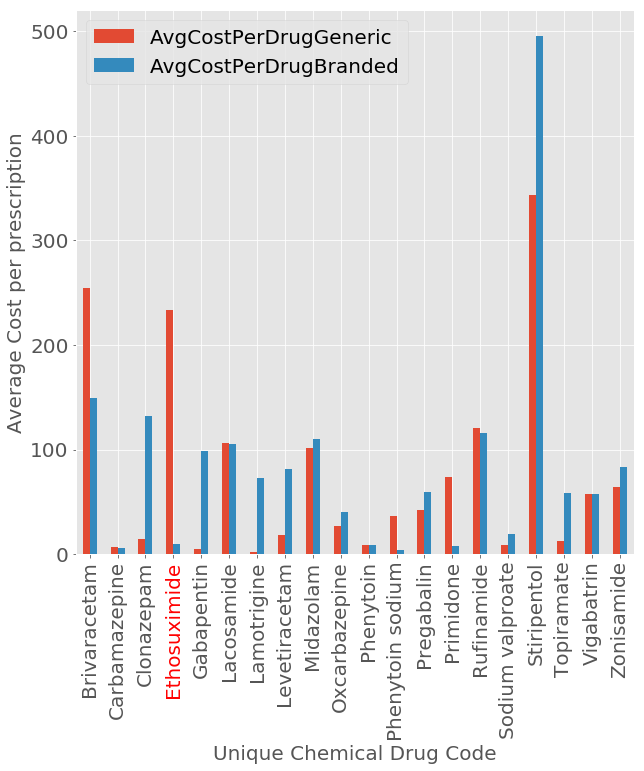

In [101]:
ax = alldf.plot(kind='bar', figsize=(10,10))
ax.legend(fontsize=20)
ax.set_ylabel("Average Cost per prescription",fontsize = 20)
ax.set_xlabel("Unique Chemical Drug Code",fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
ax.xaxis.get_ticklabels()[3].set_color('red')


# Ethosuximide

<b> As expected, the Generic prescriptions on average cost less. A curious showing though is the massive price discrepancy with the Drug Ethosuximide, highlighted in red, between it's generic and branded prescriptions. This may be down to how the drug is presented though, could be it's strength, or possibly the quantity of medicine dispensed per prescription - (Sometimes one prescription can be a dosage for several months, I'd imagine this is the case for epilepsy where a prescription can be life or death). I'll investigate below by examining the 2017 data at random

N.B Ethosuximide is a drug used to treat abscence seizures in adults and children </b>

In [122]:

dropcols = ['Year', 'Unnamed: 17','Unnamed: 18', 'Gross Cost (£)', \
            'BNF Chapter', 'BNF Paragraph','BNF Section' , 'BNF Sub-Paragraph' ]
ethodrug = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing 2017', \
                          'Practice', 'PRACTICE', dropcols)

ethodrug = ethodrug[ethodrug["BNF Code"] != '-']
ethodrug.reset_index(inplace=True,drop = True)

ethodrug['Unique_Chemical_Drug'] = ethodrug['BNF Code'].str[:9]

ethodrug['Generic'] = ethodrug['BNF Code'].str[10:12]

ethodrug['Generic'].replace('AA', 'Generic',inplace=True)
ethodrug.loc[ethodrug['Generic'] != 'Generic', 'Generic'] = 'Not Generic'


strange = ethodrug[ethodrug['Unique_Chemical_Drug'] == '0408010I0'] # Unique chemical code for Ethosuximide
strange.reset_index(inplace = True, drop = True)
ethodrug = ethodrug[ethodrug['VTM_NM'] == 'Ethosuximide']
print(("Cost of Ethosuximide in 2017 £%.2f") % mySum(strange['Actual Cost (£)']))
print(("Cost of Ethosuximide in 2017 £%.2f") % mySum(ethodrug['Actual Cost (£)']))
print("Amount of Ethosuximide prescriptions in 2017:", int(mySum(ethodrug['Total Items'])))

Cost of Ethosuximide in 2017 £307758.94
Cost of Ethosuximide in 2017 £307758.94
Amount of Ethosuximide prescriptions in 2017: 945


<b> Just to intermittently check how accurate my VTM_NM identifier was, I decided to test it alongside the BNF code identifier and see if both records matched up. Whilst VTM_NM is a way to uniquely identify chemical drugs, another way is to extract the first 9 characters of the BNF code and see from there. As we can see, the costs matched up perfectly which means that the dataset I'm usng is very consistent. <b>

As we can see, the cost of Ethosuximide overall to the NHS in Northern Ireland in 2017 was £307,759. This would be insignificant, but seeing how the total amount of precriptions is only 945 this is worthy of further analysis

According to the regional Drug and Theraputics Centre, in Newcastle, it is by far the most expensive antiepileptic drug for a calender year dose in the NHS. The graph below will demonstrate:

<img src="Antiepileptics.png">

Below I will separate it into times when it was prescribed as a generic and times when it was prescribed as branded and we can peek at these dataframes and try to see where the difference lies

In [125]:
drugsbranded = ethodrug[ethodrug['Generic'] != 'Generic']
drugsbranded.reset_index(inplace = True, drop = True)

#print("Cost of Branded Ethosuximide overall is", mySum(drugsbranded['Actual Cost (£)']))
print("There were", int(mySum(drugsbranded['Total Items'])), \
"branded Ethosuximide prescriptions in 2017")
costpermlbranded = mySum(drugsbranded['Actual Cost (£)'])/mySum(drugsbranded['Total Quantity'])
print(("Average cost per prescription for branded Ethosuximide was £%.3f per syrup dose") %
      (costpermlbranded))
drugsbranded.head(10)

There were 35 branded Ethosuximide prescriptions in 2017
Average cost per prescription for branded Ethosuximide was £0.021 per syrup dose


AMP_NM  Actual Cost (£)         BNF Code  Month  \
0  Zarontin 250mg/5ml syrup            22.94  0408010I0BCABAB    4.0   
1  Zarontin 250mg/5ml syrup             3.18  0408010I0BCABAB    4.0   
2  Zarontin 250mg/5ml syrup             7.48  0408010I0BCABAB    4.0   
3  Zarontin 250mg/5ml syrup             7.64  0408010I0BCABAB    4.0   
4   Emeside 250mg/5ml syrup            20.40  0408010I0BBABAB    4.0   
5   Emeside 250mg/5ml syrup            11.90  0408010I0BBABAB    8.0   
6  Zarontin 250mg/5ml syrup             1.91  0408010I0BCABAB    8.0   
7  Zarontin 250mg/5ml syrup             7.48  0408010I0BCABAB    2.0   
8   Emeside 250mg/5ml syrup             8.85  0408010I0BBABAB    2.0   
9  Zarontin 250mg/5ml syrup             3.82  0408010I0BCABAB    2.0   

   PRACTICE   Presentation   Strength  Total Items  Total Quantity  \
0      95.0  Oral solution  250mg/5ml          1.0          1200.0   
1     356.0  Oral solution  250mg/5ml          1.0           168.0   
2     390.0  Oral solution  250mg/5ml          1.0           400.0   
3     516.0  Oral solution  250mg/5ml          1.0           400.0   
4     624.0  Oral solution  250mg/5ml          3.0           690.0   
5     202.0  Oral solution  250mg/5ml          1.0           400.0   
6     410.0  Oral solution  250mg/5ml          1.0           100.0   
7     390.0  Oral solution  250mg/5ml          1.0           400.0   
8     491.0  Oral solution  250mg/5ml          1.0           300.0   
9     495.0  Oral solution  250mg/5ml          1.0           200.0   

                                 VMP_NM        VTM_NM Unique_Chemical_Drug  \
0  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
1  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
2  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
3  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
4  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
5  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
6  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
7  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
8  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
9  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   

       Generic  
0  Not Generic  
1  Not Generic  
2  Not Generic  
3  Not Generic  
4  Not Generic  
5  Not Generic  
6  Not Generic  
7  Not Generic  
8  Not Generic  
9  Not Generic

<b> To be able to compare the two type of drug accurately I'll have to make sure  that the presentation and the strength is the same for each prescription. Checking the dataframe above, I have learned that the branded Ethosuximide is always presented as an Oral Solution and has a strength of 250mg/5ml. 
    
By doing this I can ensure that I have little concern about finding the average cost per ml of the generic Ethosuximide vs the branded Ethosuximide as I can divide the sum of the Actual cost by the Total quantity in each case as they will be both measured the same way</b> 

In [129]:
drugsgeneric = ethodrug[(ethodrug['Generic'] == 'Generic') & \
                      (ethodrug['Presentation'] == 'Oral solution') & \
                      (ethodrug['Strength'] == '250mg/5ml')]
drugsgeneric.reset_index(inplace = True, drop = True)
#print("\nCost of generic Ethosuximide when presented as an oral solution overall is:", mySum(drugsgeneric['Actual Cost (£)']))

print("There were", int(mySum(drugsgeneric['Total Items'])), \
      "generic Ethosuximide prescriptions - as an oral solution -  in 2017")

costpermlgeneric = mySum(drugsgeneric['Actual Cost (£)'])/mySum(drugsgeneric['Total Quantity'])

print(("\nAverage cost per prescription for generic Ethosuximide was £%.3f per syrup dose") % \
       (costpermlgeneric))

times = costpermlgeneric/costpermlbranded

print(("\nGeneric Ethosuximide costs the NHS %.2fx more than the branded version on average, when they are the same preparation/strength") % (times))
drugsgeneric.head(10)

There were 294 generic Ethosuximide prescriptions - as an oral solution -  in 2017

Average cost per prescription for generic Ethosuximide was £0.583 per syrup dose

Generic Ethosuximide costs the NHS 27.37x more than the branded version on average, when they are the same preparation/strength


AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE   Presentation  \
0      -           940.32  0408010I0AAABAB    4.0      95.0  Oral solution   
1      -           311.43  0408010I0AAABAB    4.0     202.0  Oral solution   
2      -           313.30  0408010I0AAABAB    4.0     221.0  Oral solution   
3      -           155.56  0408010I0AAABAB    4.0     222.0  Oral solution   
4      -           544.71  0408010I0AAABAB    4.0     271.0  Oral solution   
5      -           309.84  0408010I0AAABAB    4.0     457.0  Oral solution   
6      -           468.86  0408010I0AAABAB    4.0     491.0  Oral solution   
7      -           776.68  0408010I0AAABAB    4.0     500.0  Oral solution   
8      -           783.17  0408010I0AAABAB    4.0     516.0  Oral solution   
9      -           310.22  0408010I0AAABAB    4.0     539.0  Oral solution   

    Strength  Total Items  Total Quantity  \
0  250mg/5ml          1.0          1200.0   
1  250mg/5ml          1.0           400.0   
2  250mg/5ml          1.0           400.0   
3  250mg/5ml          1.0           200.0   
4  250mg/5ml          1.0           700.0   
5  250mg/5ml          1.0           400.0   
6  250mg/5ml          1.0           600.0   
7  250mg/5ml          2.0          1000.0   
8  250mg/5ml          1.0          1000.0   
9  250mg/5ml          1.0           400.0   

                                 VMP_NM        VTM_NM Unique_Chemical_Drug  \
0  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
1  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
2  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
3  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
4  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
5  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
6  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
7  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
8  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   
9  Ethosuximide 250mg/5ml oral solution  Ethosuximide            0408010I0   

   Generic  
0  Generic  
1  Generic  
2  Generic  
3  Generic  
4  Generic  
5  Generic  
6  Generic  
7  Generic  
8  Generic  
9  Generic

<b>The price difference here is staggering and very strange. Checking and comparing the two databases there seemed to be no apparent difference to explain the more than 27x increase in price between the generic and branded versions of Ethosuximide, especially since I controlled for the strength and preparation of medicine supplied in the two cases of generic and branded Ethosuximide. 
    
The only observable difference is of course being that the branded dataframe has it's brand name - (which is either Zarontin or Emeside). This type of difference in price, although almost too remarkable to believe, happens far too often to be put down to a simple clerical error.


These curious results lead me to research online and I found that Zarontin and Emeside - (the branded versions of Ethosuximide that were prescribed by the NHS and that are far cheaper) - were discontinued by the pharmacuticals that produced them in mid 2017. However, this demonstrates there is still a possibility of a cheaper alternative to the prescribing of Ethosuximide than the way that the NHS seems to be doing at the moment, as these branded prescriptions showed that there is a cheaper way to dispense Ethosuximide than relying on the more expensive generic versions that the NHS is currently prescribing. 

I would suggest that NICE (National Institute for Health and Care Excellence) the de-facto regulatory body of the NHS, should maybe look into finding a cheaper alternative Ethosuximide, either another branded or generic version of the drug and approve it's use. The potential for savings is massive, also they could perhaps lobby pfizer or another pharma giant to make the branded Ethosuximide again.</b>



***
Now I'll do a price analysis of all of the data I have for Ethosuximide, from June 2015 - June 2018, as well as a total prescription analysis - and I'll attempt to find why there is a cost difference in the two products and if this cost difference has always existed. </b>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
dropcols = ["Unnamed: 17", 'Unnamed: 18']
ethodrug = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing', \
                          'Practice', 'PRACTICE', dropcols)
cols = ["Year", "Month"]
ethodrug[cols] = ethodrug[cols].applymap(np.int64)

ethodrug["Date"] =  ethodrug["Month"].astype(str) + ethodrug["Year"].astype(str)
ethodrug['Date'] = pd.to_datetime(ethodrug['Date'], format ='%m%Y')



In [8]:
ethodrug = ethodrug[ethodrug["BNF Code"] != '-']
ethodrug = ethodrug[ethodrug['VTM_NM'] == 'Ethosuximide']
ethodrug.reset_index(inplace=True,drop = True)

costPerMonth = groupbylist(ethodrug, "Actual Cost (£)", "Date")
itemsPerMonth = groupbylist(ethodrug, "Total Items", "Date")

ethodrug.head()

AMP_NM  Actual Cost (£) BNF Chapter         BNF Code BNF Paragraph  \
0      -           585.60           4  0408010I0AAAAAA             1   
1      -             3.79           4  0408010I0AAABAB             1   
2      -           109.80           4  0408010I0AAAAAA             1   
3      -           146.40           4  0408010I0AAAAAA             1   
4      -            73.20           4  0408010I0AAAAAA             1   

  BNF Section BNF Sub-Paragraph  Gross Cost (£)  Month  PRACTICE  \
0           8                 0          585.60      4      29.0   
1           8                 0            4.22      4      66.0   
2           8                 0          109.80      4      68.0   
3           8                 0          146.40      4      73.0   
4           8                 0           73.20      4      81.0   

    Presentation   Strength  Total Items  Total Quantity  \
0        Capsule      250mg          2.0           448.0   
1  Oral solution  250mg/5ml          1.0           200.0   
2        Capsule      250mg          1.0            84.0   
3        Capsule      250mg          1.0           112.0   
4        Capsule      250mg          1.0            56.0   

                                 VMP_NM        VTM_NM  Year       Date  
0           Ethosuximide 250mg capsules  Ethosuximide  2016 2016-04-01  
1  Ethosuximide 250mg/5ml oral solution  Ethosuximide  2016 2016-04-01  
2           Ethosuximide 250mg capsules  Ethosuximide  2016 2016-04-01  
3           Ethosuximide 250mg capsules  Ethosuximide  2016 2016-04-01  
4           Ethosuximide 250mg capsules  Ethosuximide  2016 2016-04-01

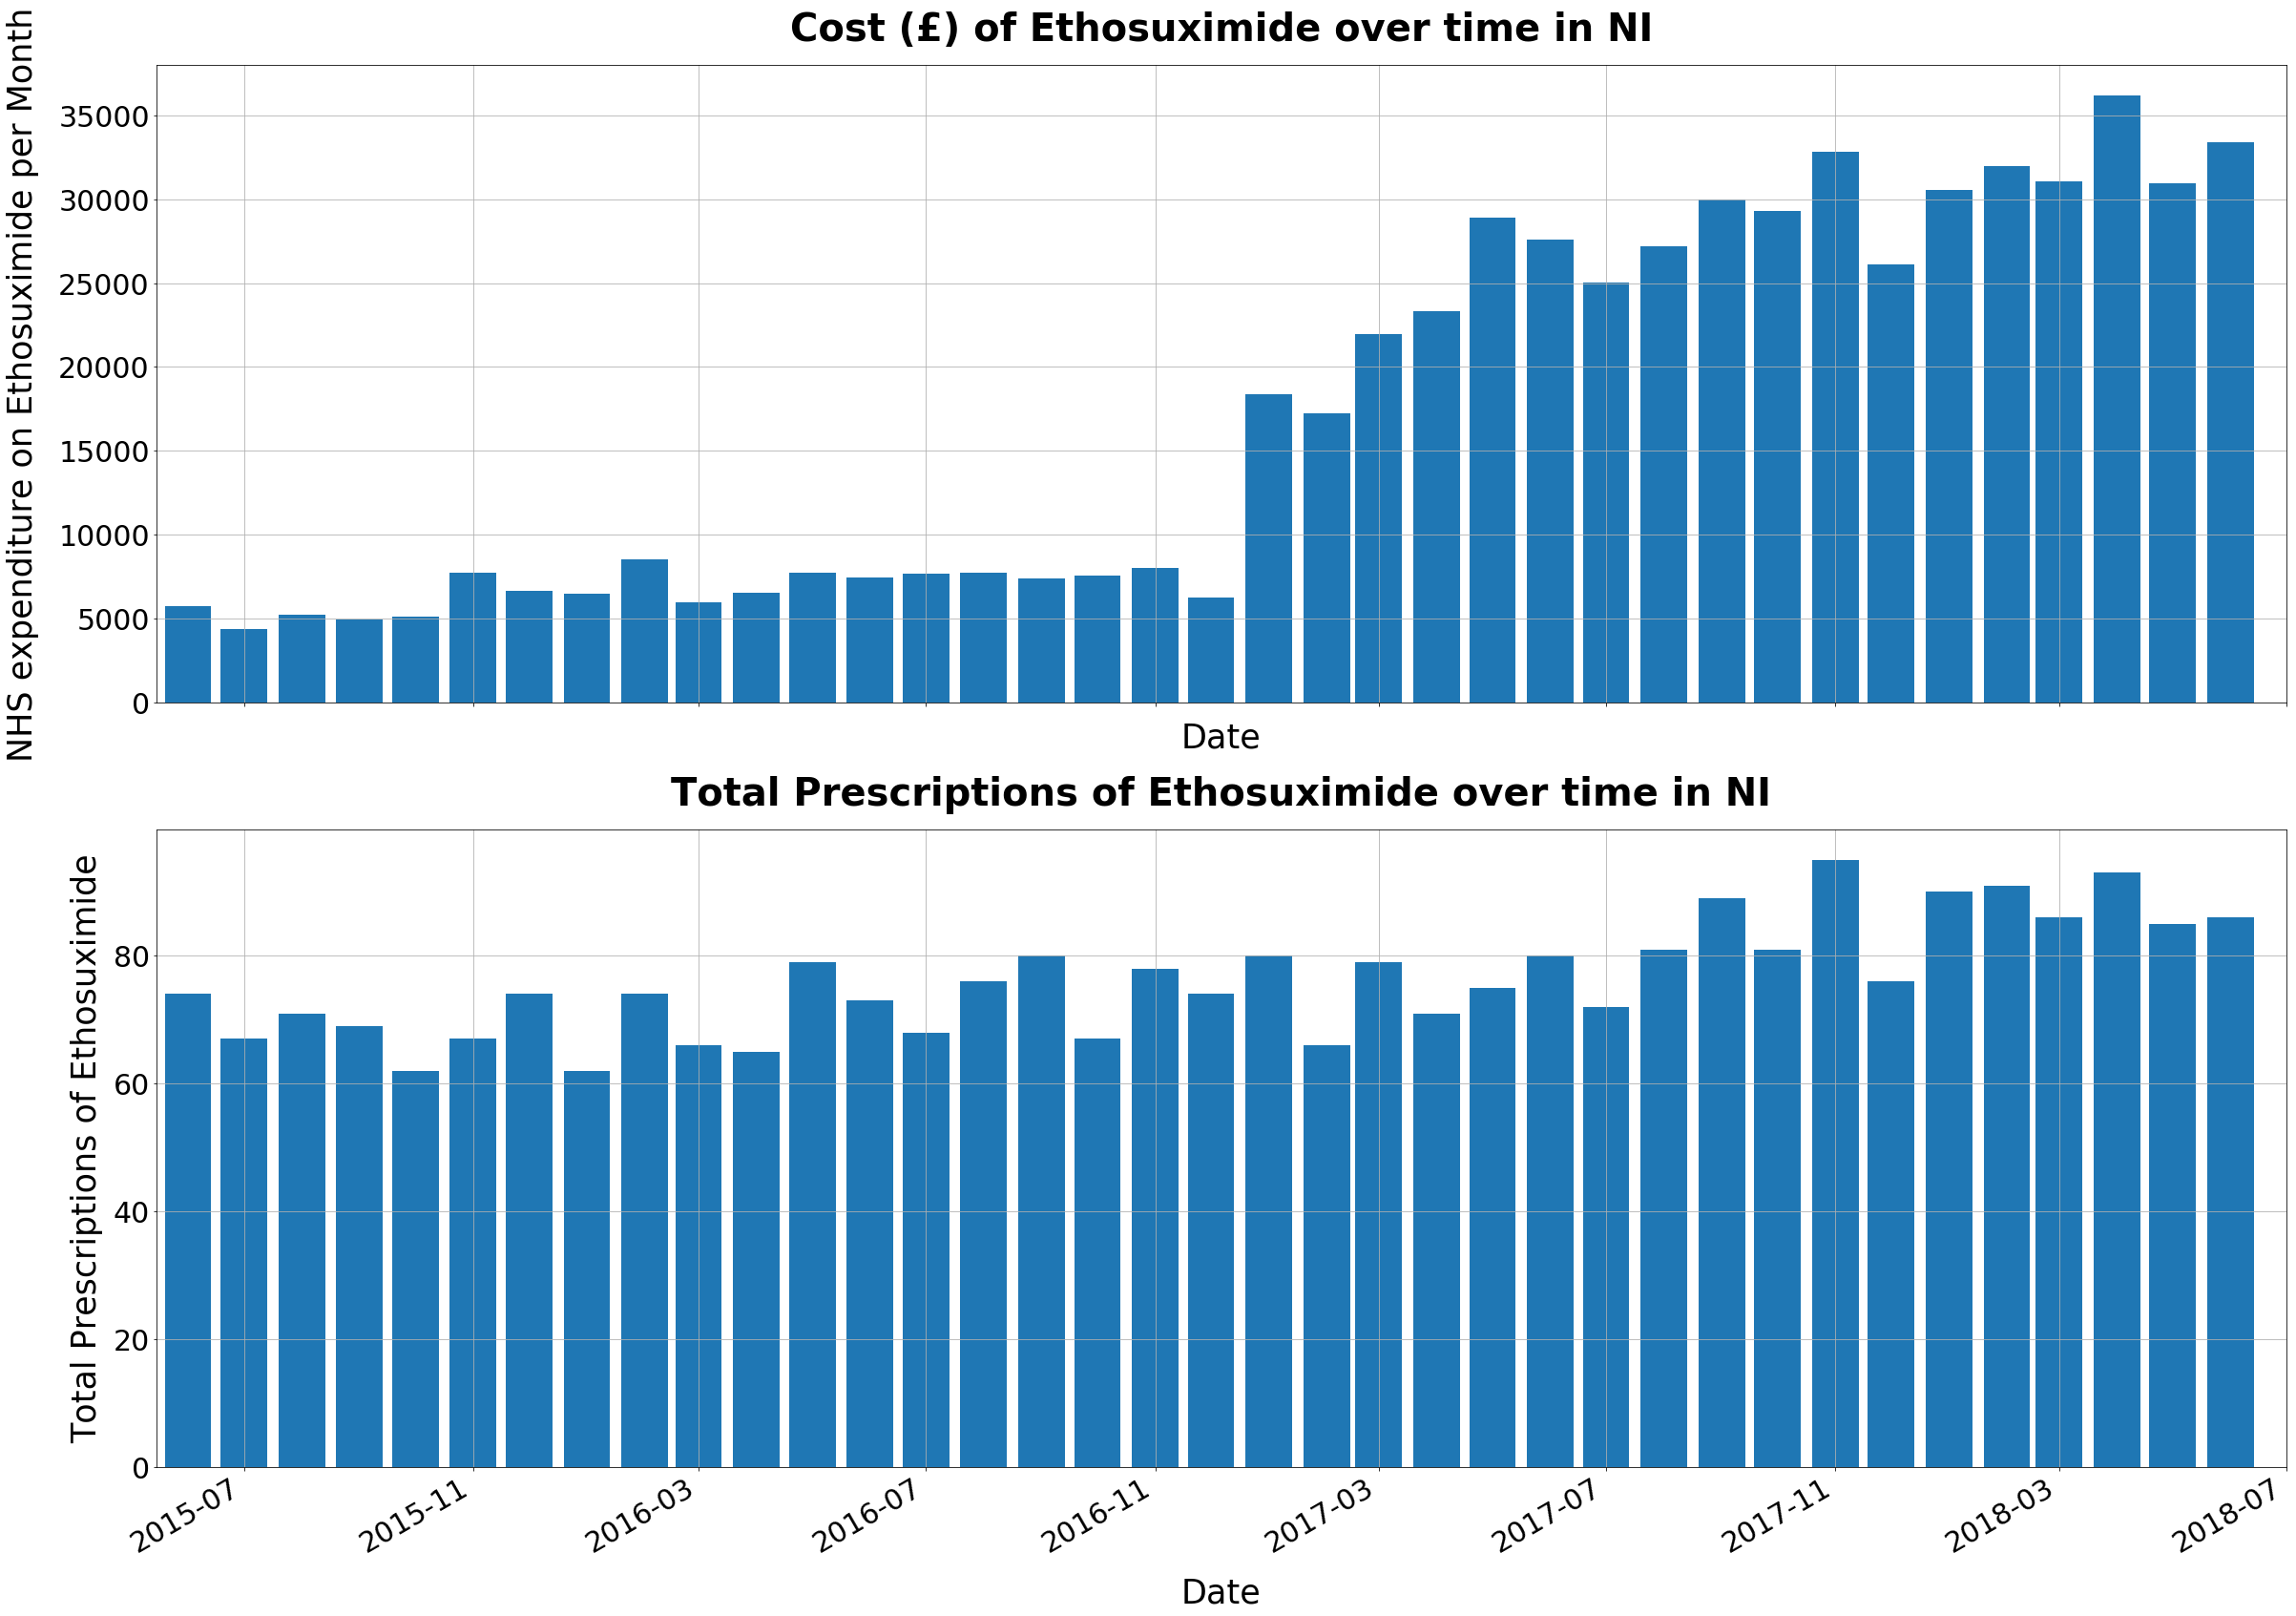

In [145]:
fig, (ax, ax2) = plt.subplots(2, 1)
fig.set_size_inches(40,30)
#plt.subplot(1, 2, 1)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('NHS expenditure on Ethosuximide per Month', fontsize = 35, labelpad = 20.0)
ax.set_title('Cost (£) of Ethosuximide over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax.grid(True)
ax.bar(allDates, costPerMonth, width = 25)
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
#ax.set_ylim([0,60000000])
#ax.set_xlim([datetime.date(2015, 12, 15),datetime.date(2018, 6, 30)])
ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Total Prescriptions of Ethosuximide', fontsize = 35, labelpad = 10.0)
ax2.set_title('Total Prescriptions of Ethosuximide over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax2.grid(True)
ax2.bar(allDates, itemsPerMonth, width = 25)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
plt.subplots_adjust(hspace = 0.2) 

plt.show()

<b> As we can see, the cost of Ethosuximide steeply rose at the start of the calender year of 2017; possibly because the NHS was aware that Zarontin and Emeside were about to be discontinued, and they adjusted so that affected patients could acclimatise to their new generic prescriptions.
This rise has not been down to a rise in demand for the drug, as demonstrated above the demand has remained the same - but rather it seems to be from the switching from brand Ethosuximide to the far more expensive generic version.
    
I'll do some further statistical analysis of how many branded and generic Ethosuximide prescriptions were handed out from June 2015 - June 2018 and I'll visualise whether or not there was a switch from branded to generic products </b>

In [9]:
ethodrug['Generic'] = ethodrug['BNF Code'].str[10:12]

ethodrug['Generic'].replace('AA', 'Generic',inplace=True)
ethodrug.loc[ethodrug['Generic'] != 'Generic', 'Generic'] = 'Not Generic'

ethobranded = ethodrug[ethodrug['Generic'] != 'Generic']
ethobranded.reset_index(inplace = True, drop = True)

ethogeneric = ethodrug[ethodrug['Generic'] == 'Generic']
ethogeneric.reset_index(inplace = True, drop = True)

In [10]:
ethoBitems = groupbylist(ethobranded, "Total Items", "Date")
ethoGitems = groupbylist(ethogeneric, "Total Items", "Date")
gendates = sorted(ethogeneric["Date"].unique())
brandates = sorted(ethobranded["Date"].unique())
print(ethoGitems)
print(ethoBitems)

[73.0, 61.0, 64.0, 62.0, 53.0, 62.0, 66.0, 60.0, 65.0, 60.0, 63.0, 73.0, 68.0, 63.0, 71.0, 73.0, 65.0, 75.0, 68.0, 74.0, 62.0, 75.0, 64.0, 75.0, 79.0, 67.0, 79.0, 86.0, 81.0, 94.0, 74.0, 89.0, 91.0, 86.0, 93.0, 85.0, 86.0]
[1.0, 6.0, 7.0, 7.0, 9.0, 5.0, 8.0, 2.0, 9.0, 6.0, 2.0, 6.0, 5.0, 5.0, 5.0, 7.0, 2.0, 3.0, 6.0, 6.0, 4.0, 4.0, 7.0, 1.0, 5.0, 2.0, 3.0, 1.0, 2.0, 1.0]


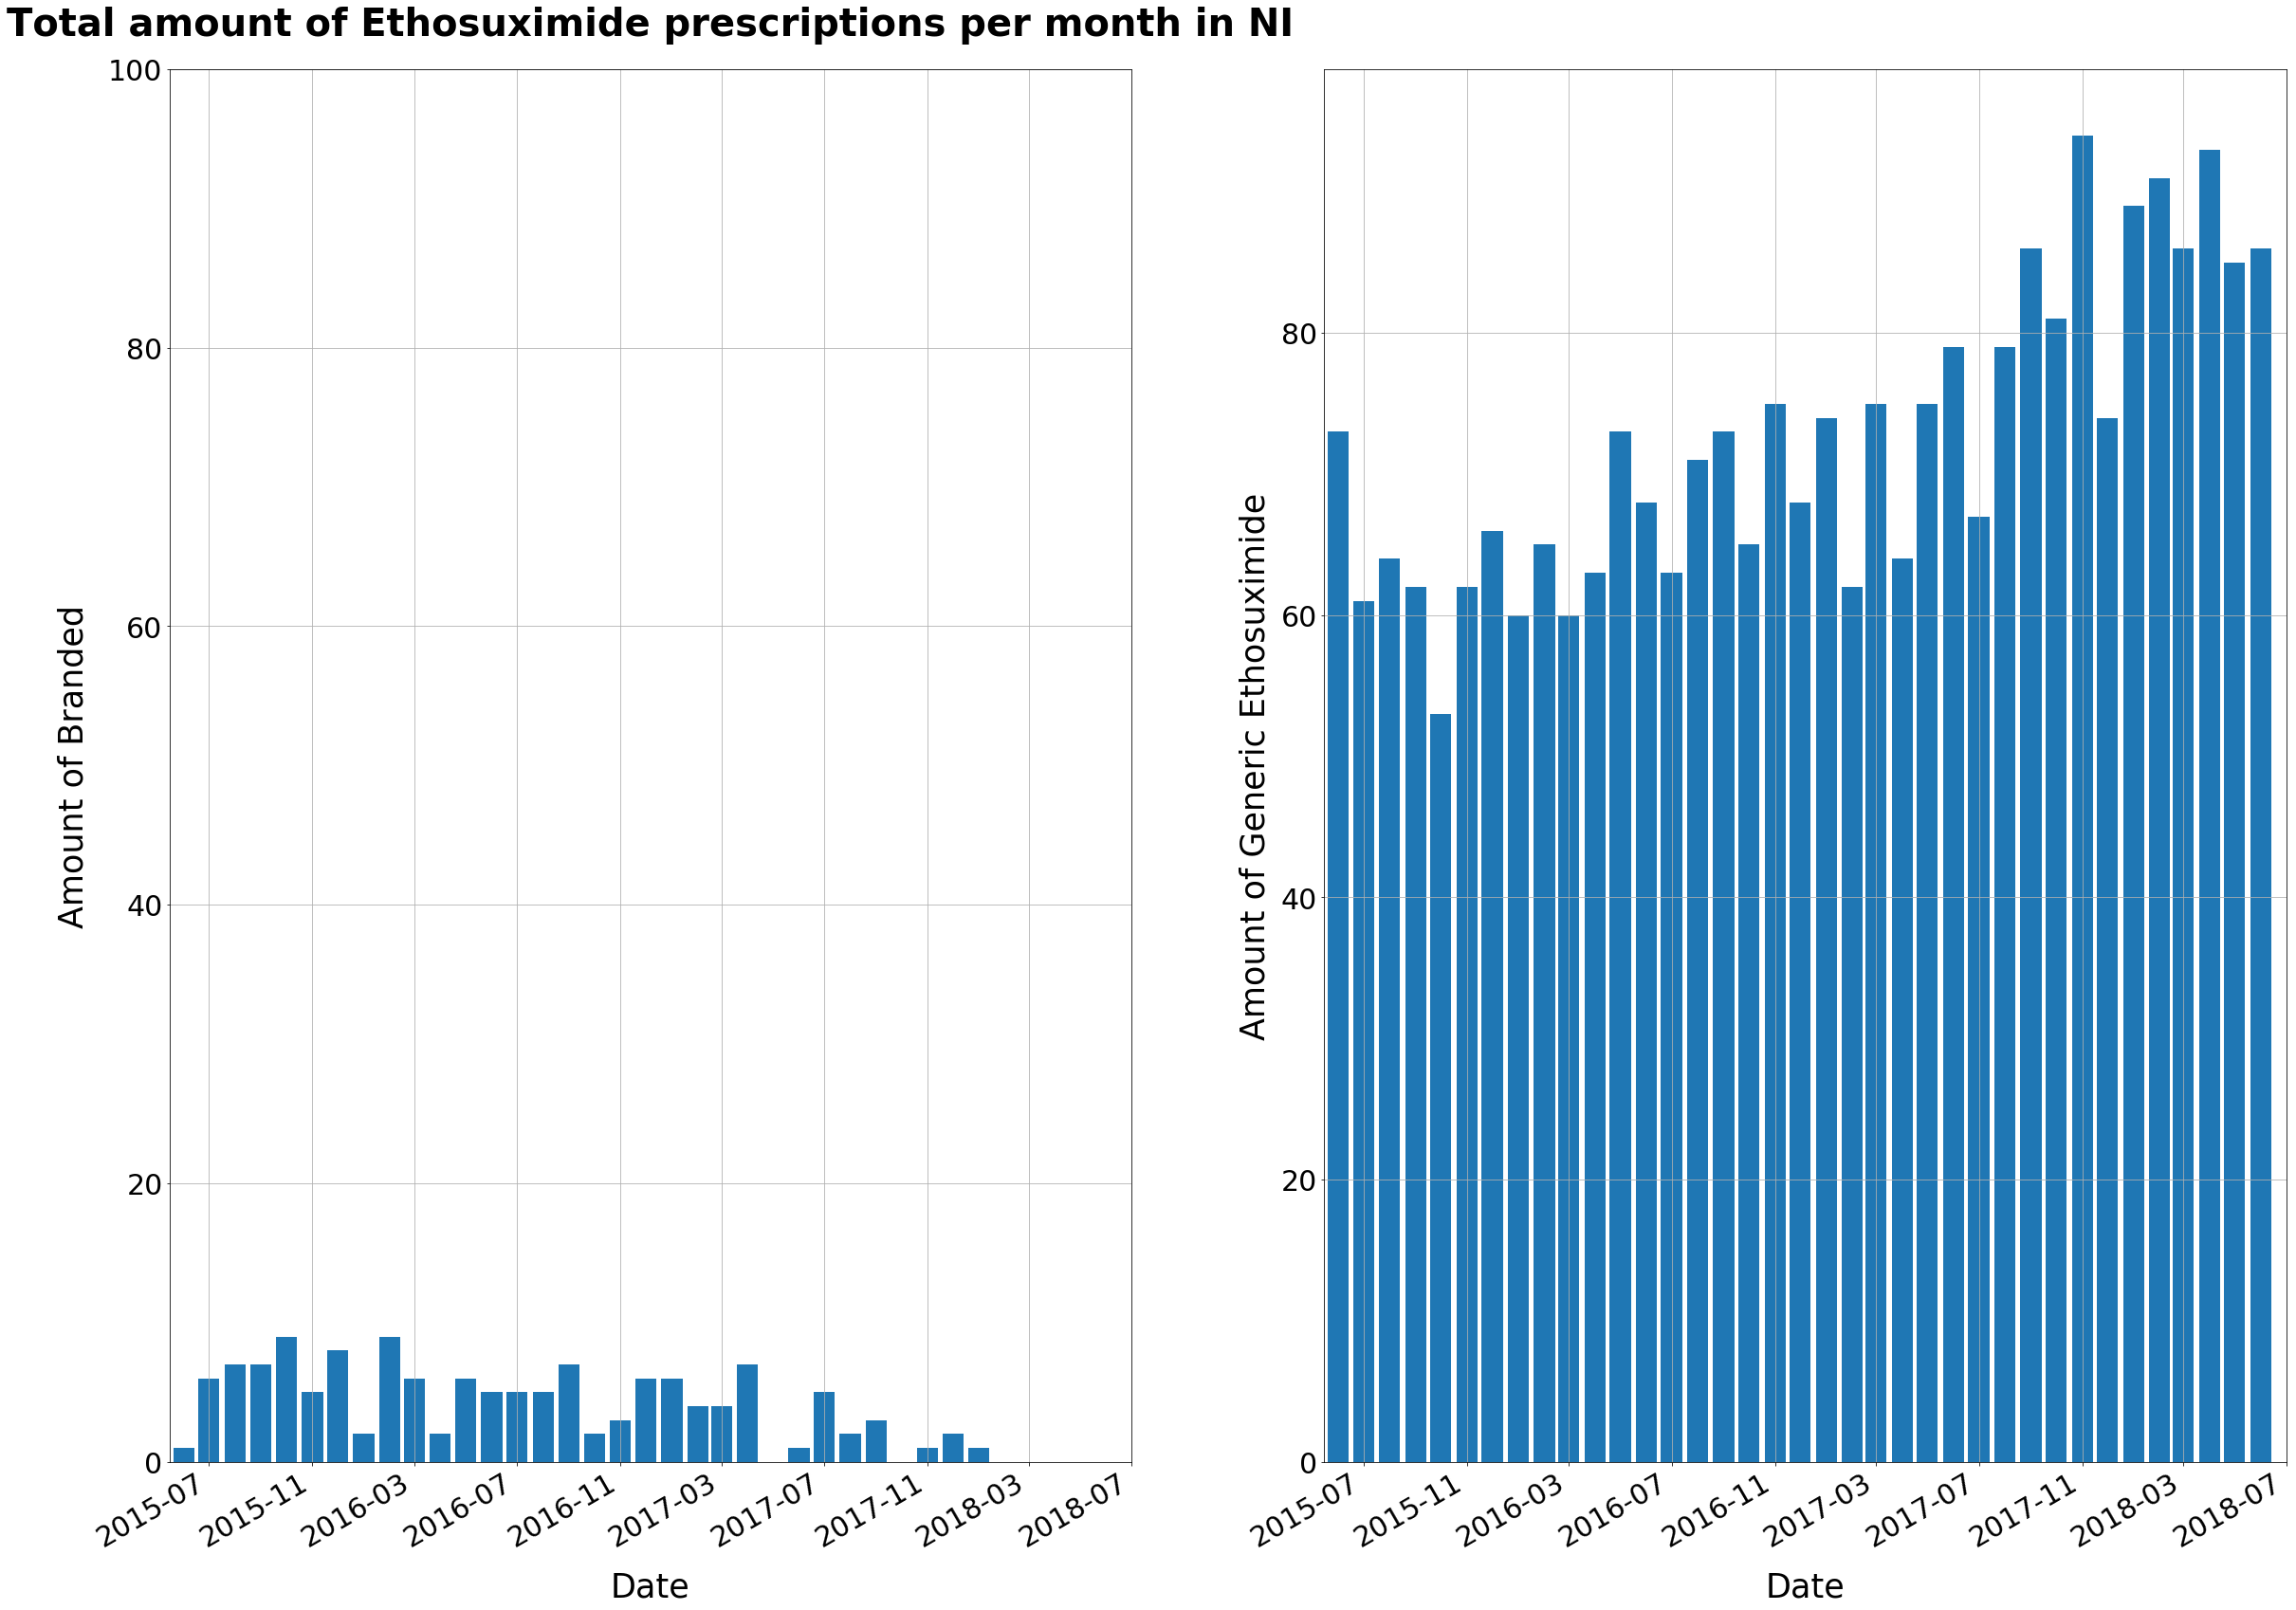

In [106]:
fig, (ax, ax2) = plt.subplots(1, 2)
fig.set_size_inches(40,30)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('Amount of Branded', fontsize = 35, labelpad = 20.0)
ax.set_title('Total amount of Ethosuximide prescriptions per month in NI', fontsize = 40, fontweight = 800, pad = 35.5)
ax.grid(True)
ax.bar(brandates, ethoBitems, width = 25)
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax.set_ylim(0, 100)
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)

ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Amount of Generic Ethosuximide', fontsize = 35, labelpad = 10.0)
ax2.grid(True)
ax2.bar(gendates, ethoGitems, width = 25)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
plt.subplots_adjust(hspace = 0.2) 
plt.show()

<b> In fact the NHS in northern ireland never did seem to prescribe much of the branded Ethosuximide  in their history at all and this change in NHS spending on Ethosuximide may be in fact for another reason. Going on the evidence above, the only thing left to explain the sudden increase in cost of Ethosuximide  to the NHS must be that the drug has rose in price, I'd stipulate that there has been a recent price hike in the Drug by the supplier of the Ethosuximide probably because they are the only supplier to the NHS and because the demand is unwavering/inelastic and they don't have any competitors they can get away with charging extortionate prices for it's Ethosuximide. My suggestion is for the NHS to find a better supplier of Ethosuximide.

I would not be surprised if this has gone unnoticed, as in the grand scheme of things, the amount of people prescribed this drug is very small (some 70 - 90 prescriptions a month in NI). However, this drug costs the NHS a lot of money for the small amount of patients it serves. </b>

In [11]:
etho16 = costPerMonth[7:19]
etho17 = costPerMonth[19:31]
print(("In 2016 Ethosuximide cost the NHS £%.2f, in 2017 it cost the NHS £%.2f")\
      % (mySum(etho16), mySum(etho17)))
print(("Thats a cost increase of £%.2f on the year in NI. This could be easily rectified if the NHS allowed another product of Ethosuximide to be prescribed") % (mySum(etho17) - mySum(etho16)))

In 2016 Ethosuximide cost the NHS £87266.21, in 2017 it cost the NHS £307758.94
Thats a cost increase of £220492.73 on the year in NI. This could be easily rectified if the NHS allowed another product of Ethosuximide to be prescribed


<b> Just as an absoulte confirmation, let's see if the generic price of Ethosuximide spiked when the branded version of it came out of circulation. We can do this by again comparing the two across the same dose/strength and seeing what the price for this same strength has been over time. The strength will be 250mg. </b>

In [12]:
ethogeneric = ethogeneric[ethogeneric['Strength'] == '250mg/5ml']
ethogeneric.reset_index(drop = True, inplace =True)

GEquanpermonth = np.array(groupbylist(ethogeneric, "Total Quantity", "Date" ))
GEcostpermonth = np.array(groupbylist(ethogeneric, "Actual Cost (£)", "Date" ))
GEcostpermonth = GEcostpermonth/GEquanpermonth # cost per unit quantity (?)


ethobranded = ethobranded[ethobranded['Strength'] == '250mg/5ml']
ethobranded.reset_index(drop = True, inplace =True)

BEquanpermonth = np.array(groupbylist(ethobranded, "Total Quantity", "Date" ))
BEcostpermonth = np.array(groupbylist(ethobranded, "Actual Cost (£)", "Date" ))
BEcostpermonth = BEcostpermonth/BEquanpermonth 

gendates = sorted(ethogeneric["Date"].unique())
brandates = sorted(ethobranded["Date"].unique())

Text(735750,0.3,'Branded \nEthosuximide \ndiscontinued')

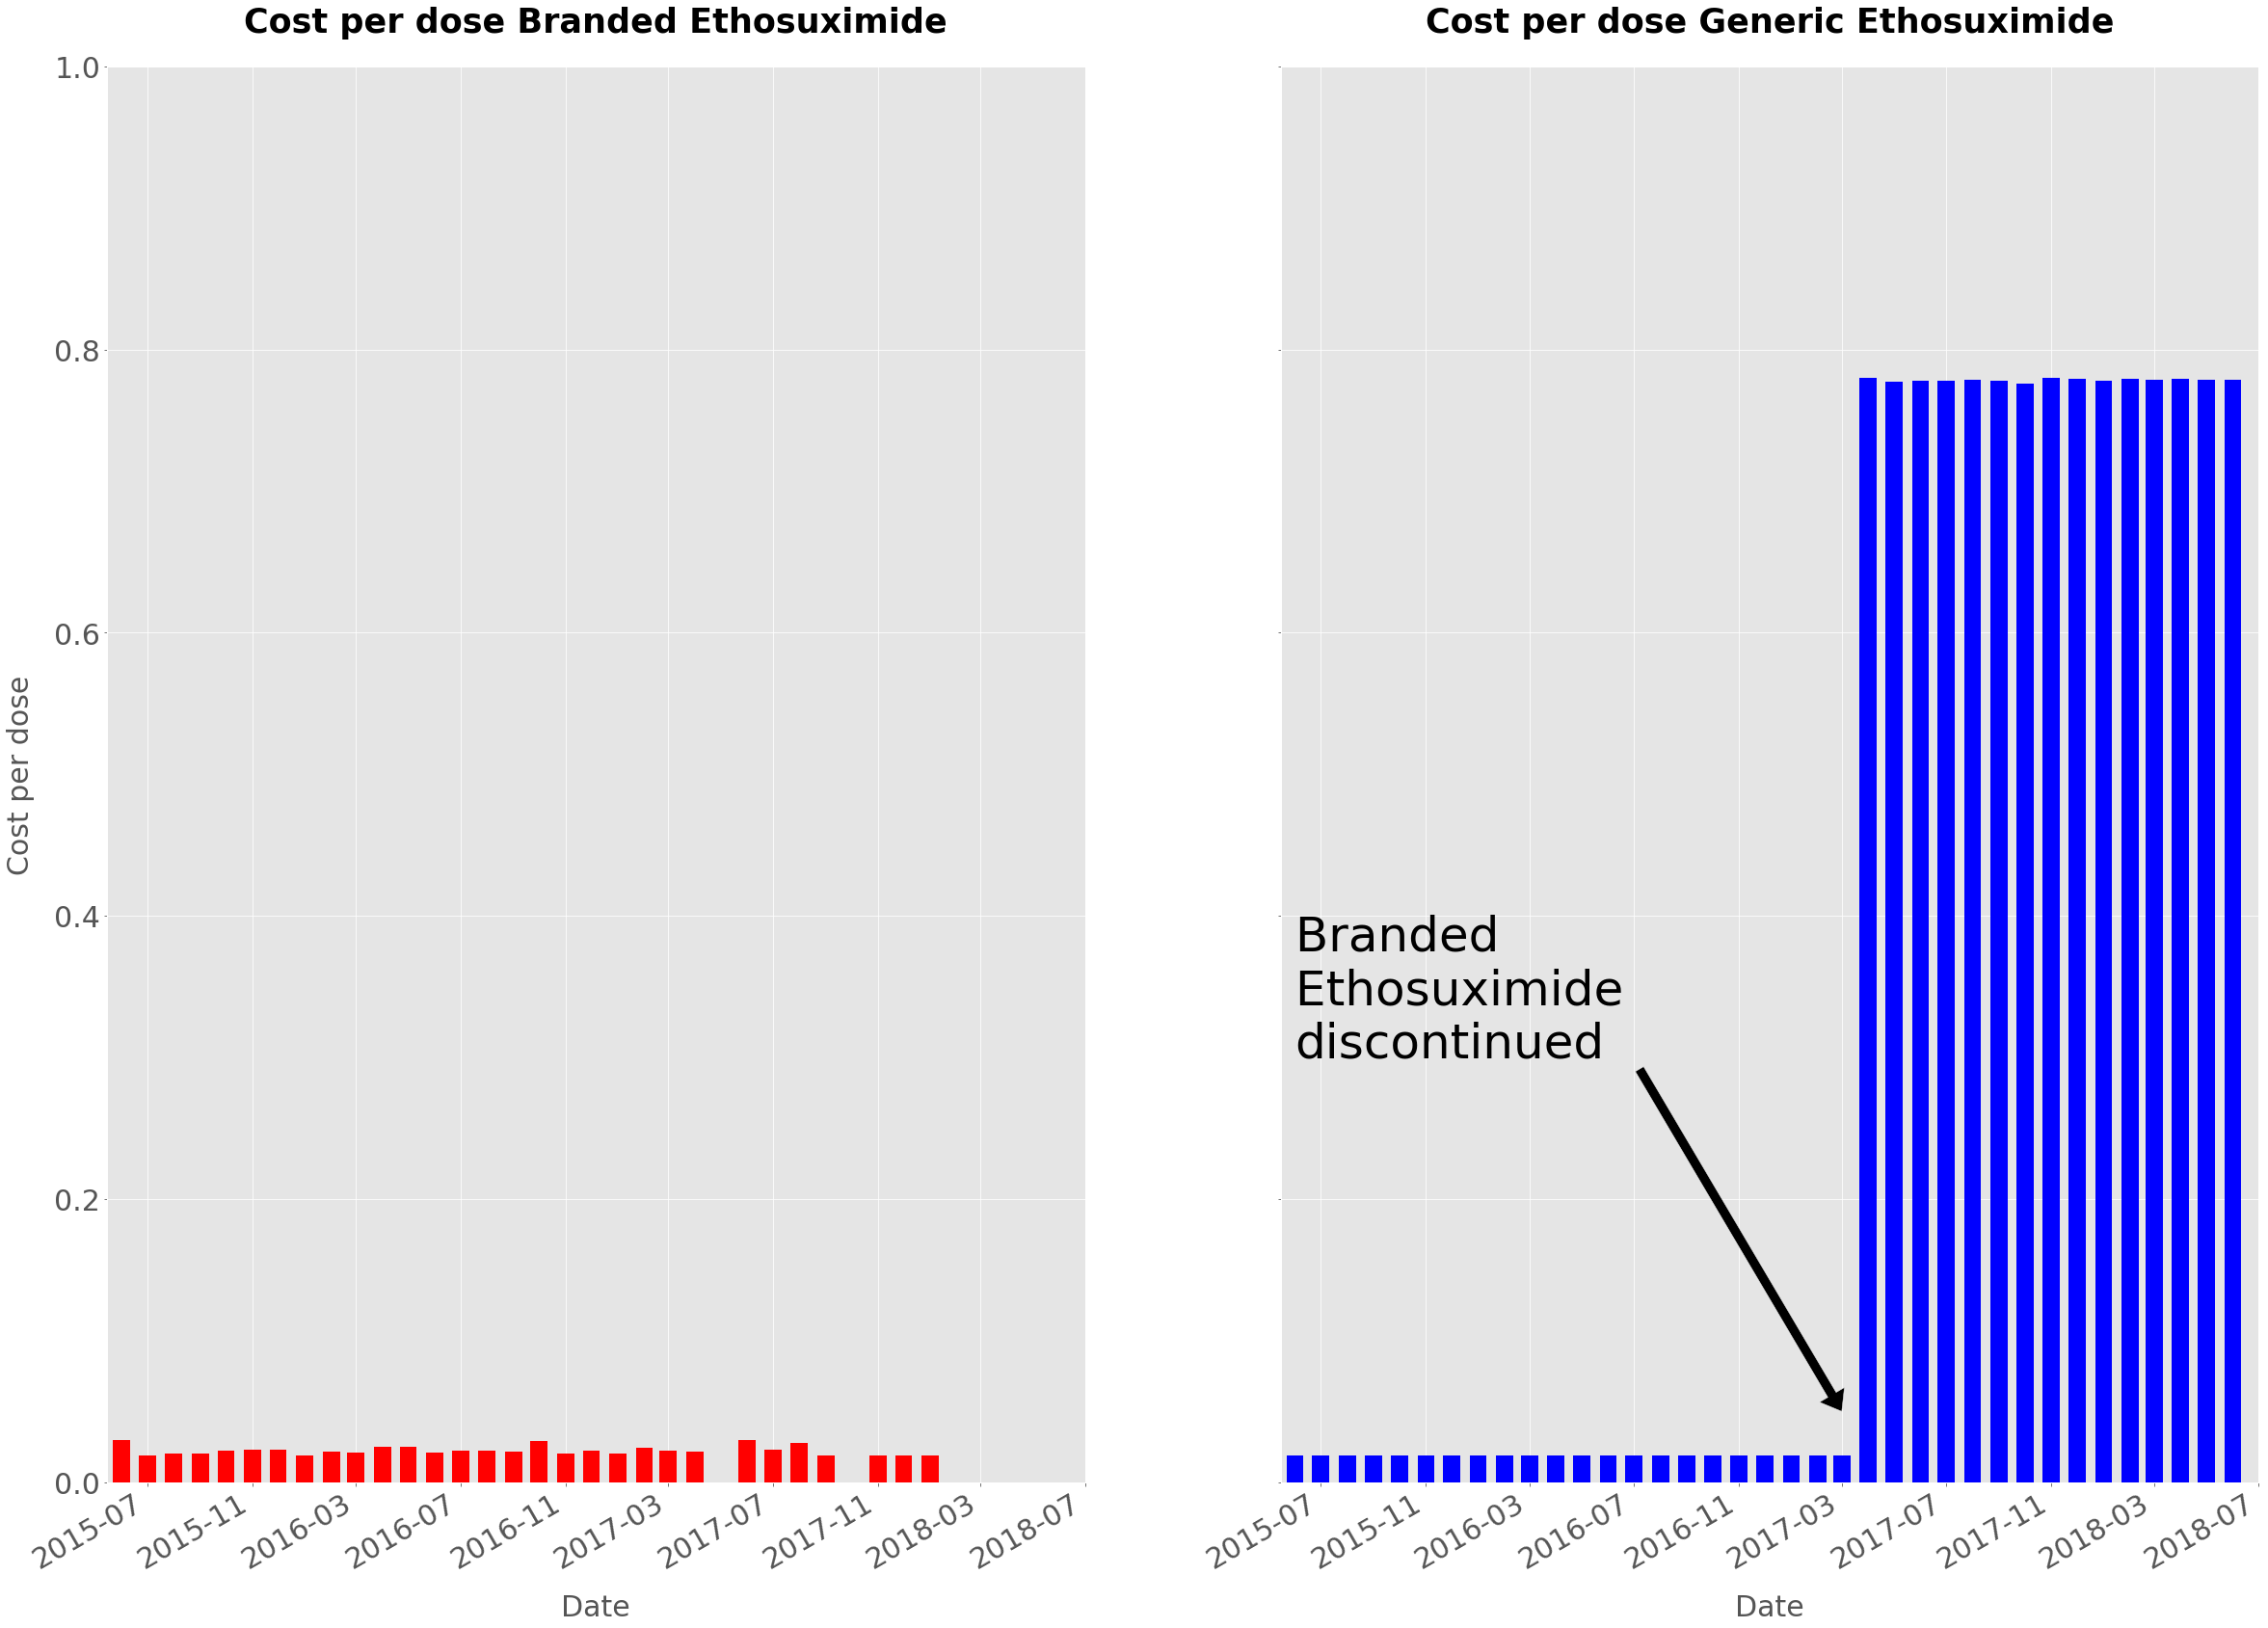

In [66]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

fig, (ax3, ax4) = plt.subplots(1, 2, sharey = 'row')
fig.set_size_inches(40,30)
fig.autofmt_xdate()

ax3.set_xlabel('Date', fontsize = 30, labelpad = 20.0)
ax3.set_ylabel('Cost per dose', fontsize = 30, labelpad = 20.0)
ax3.set_title('Cost per dose Branded Ethosuximide', fontsize = 35, fontweight = 800, pad = 35.5)
ax3.grid(True)
ax3.bar(brandates, BEcostpermonth, width = 20, color = "red")
ax3.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax3.xaxis.set_tick_params(labelsize = 30)
ax3.yaxis.set_tick_params(labelsize =30)


ax4.set_xlabel('Date', fontsize = 30, labelpad = 20.0)
ax4.grid(True)
ax4.bar(gendates, GEcostpermonth, width = 20, color = "blue")
ax4.set_title('Cost per dose Generic Ethosuximide', fontsize = 35, fontweight = 800, pad = 35.5)
ax4.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax4.set_ylim(0, 1)
ax4.xaxis.set_tick_params(labelsize = 30)
ax4.annotate('Branded \nEthosuximide \ndiscontinued', fontsize = 50, xy =(mdates.date2num(gendates[21]), 0.05), \
xytext = (mdates.date2num(gendates[0]), 0.3), arrowprops = dict(facecolor = "black",\
                                                                headlength = 20, width = 10, headwidth = 30))

<b> This graph, more than ever before, shows my stiplualtion to be true. The cost per dose of generic Ethosuximide takes an almighty spike, just as it's the only option left to the NHS on the market - as the branded versions of ethosuximide (Emeside and Zarontin) were discontinued from the UK market exactly when the price spike occured. My guess for why there were still supplies of the branded version being dispensed after this was probably because there was leftover stock that had to be still dispensed.

## Brivaracetam
<b>Another strange discrepancy between the price of a generic drug vs it's branded counterpart is Brivarecetam. Like ethosuximide, it is one of the most expensive AEDs prescribed in NI. I'll analsyse further below </b>

In [85]:
dropcols = ['Year', 'Unnamed: 17','Unnamed: 18', 'Gross Cost (£)', \
            'BNF Chapter', 'BNF Paragraph','BNF Section' , 'BNF Sub-Paragraph' ]
brivdrug = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing', \
                          'Practice', 'PRACTICE', dropcols)

brivdrug = brivdrug[brivdrug['VTM_NM'] == 'Brivaracetam']
brivdrug = brivdrug[brivdrug["BNF Code"] != '-']
brivdrug.reset_index(inplace=True,drop = True)
brivdrug['Generic'] = brivdrug['BNF Code'].str[10:12]
brivdrug.head()

AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE  \
0   Briviact 50mg tablets           129.64  0408010ALBBACAC    4.0      61.0   
1   Briviact 50mg tablets           259.28  0408010ALBBACAC    4.0      83.0   
2   Briviact 50mg tablets           324.10  0408010ALBBACAC    4.0      92.0   
3  Briviact 100mg tablets           129.64  0408010ALBBAEAE    4.0     145.0   
4   Briviact 50mg tablets           129.64  0408010ALBBACAC    4.0     145.0   

  Presentation Strength  Total Items  Total Quantity  \
0       Tablet     50mg          1.0            56.0   
1       Tablet     50mg          2.0           112.0   
2       Tablet     50mg          1.0           140.0   
3       Tablet    100mg          1.0            56.0   
4       Tablet     50mg          1.0            56.0   

                       VMP_NM        VTM_NM Generic  
0   Brivaracetam 50mg tablets  Brivaracetam      BA  
1   Brivaracetam 50mg tablets  Brivaracetam      BA  
2   Brivaracetam 50mg tablets  Brivaracetam      BA  
3  Brivaracetam 100mg tablets  Brivaracetam      BA  
4   Brivaracetam 50mg tablets  Brivaracetam      BA

In [87]:
brivdrug['Generic'] = brivdrug['BNF Code'].str[10:12]

brivdrug['Generic'].replace('AA', 'Generic',inplace=True)
brivdrug.loc[brivdrug['Generic'] != 'Generic', 'Generic'] = 'Not Generic'



print("Amount of Brivaracetam prescriptions from June 2015 - June 2018:", int(mySum(brivdrug['Total Items'])))
brivdrug.reset_index(drop = True, inplace = True)
brivdrug.head()

Amount of Brivaracetam prescriptions from June 2015 - June 2018: 901


AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE  \
0   Briviact 50mg tablets           129.64  0408010ALBBACAC    4.0      61.0   
1   Briviact 50mg tablets           259.28  0408010ALBBACAC    4.0      83.0   
2   Briviact 50mg tablets           324.10  0408010ALBBACAC    4.0      92.0   
3  Briviact 100mg tablets           129.64  0408010ALBBAEAE    4.0     145.0   
4   Briviact 50mg tablets           129.64  0408010ALBBACAC    4.0     145.0   

  Presentation Strength  Total Items  Total Quantity  \
0       Tablet     50mg          1.0            56.0   
1       Tablet     50mg          2.0           112.0   
2       Tablet     50mg          1.0           140.0   
3       Tablet    100mg          1.0            56.0   
4       Tablet     50mg          1.0            56.0   

                       VMP_NM        VTM_NM      Generic  
0   Brivaracetam 50mg tablets  Brivaracetam  Not Generic  
1   Brivaracetam 50mg tablets  Brivaracetam  Not Generic  
2   Brivaracetam 50mg tablets  Brivaracetam  Not Generic  
3  Brivaracetam 100mg tablets  Brivaracetam  Not Generic  
4   Brivaracetam 50mg tablets  Brivaracetam  Not Generic

In [88]:
drugsbranded = brivdrug[brivdrug['Generic'] != 'Generic']
drugsbranded.reset_index(inplace = True, drop = True)

drugsgeneric = brivdrug[brivdrug['Generic'] == 'Generic']
drugsgeneric.reset_index(inplace = True, drop = True)

Gpresentations = dict(drugsgeneric["Presentation"].value_counts())
Gstrength = dict(drugsgeneric["Strength"].value_counts())
Bpresentations = dict(drugsbranded["Presentation"].value_counts())
Bstrength = dict(drugsbranded["Strength"].value_counts())

print("Types of generic Brivaracetam Presentations", Gpresentations)
print("Types of branded Brivaracetam Presentations", Bpresentations)
print("\nTypes of generic Brivaracetam Strength", Gstrength)
print("Types of branded Brivaracetam Strength", Bstrength)

print("\nThere were", int(mySum(drugsgeneric["Total Items"])),\
            "branded Brivaracetam prescriptions from June 2015 - June 2018")

print("And", int(mySum(drugsbranded["Total Items"])), \
             "generic Brivaracetam prescriptions from June 2015 - June 2018")

print(("\nCost of Brivaracetam from June 15 - June 18  to the NHS in Northern Ireland: £%.2f") % \
      mySum(brivdrug['Actual Cost (£)']))

Types of generic Brivaracetam Presentations {'Oral solution': 12}
Types of branded Brivaracetam Presentations {'Tablet': 733}

Types of generic Brivaracetam Strength {'50mg/5ml': 12}
Types of branded Brivaracetam Strength {'50mg': 351, '100mg': 274, '25mg': 108, '50mg/5ml': 2}

There were 15 branded Brivaracetam prescriptions from June 2015 - June 2018
And 886 generic Brivaracetam prescriptions from June 2015 - June 2018

Cost of Brivaracetam from June 15 - June 18  to the NHS in Northern Ireland: £136441.46


<b> There have only been 15 branded prescriptions of Brivaracetam for the whole 3 years from June 15 to June 18 in Northern Ireland, clearly this is not worth examining any further as the more expensive generic version of this drug is extremely rarely prescribed. </b>

# Potential price savings on AEDs if switching from generic to branded
<b> Let's remind ourselves of the price comparison between generic and branded AEDs by re-plotting the bar graph from before

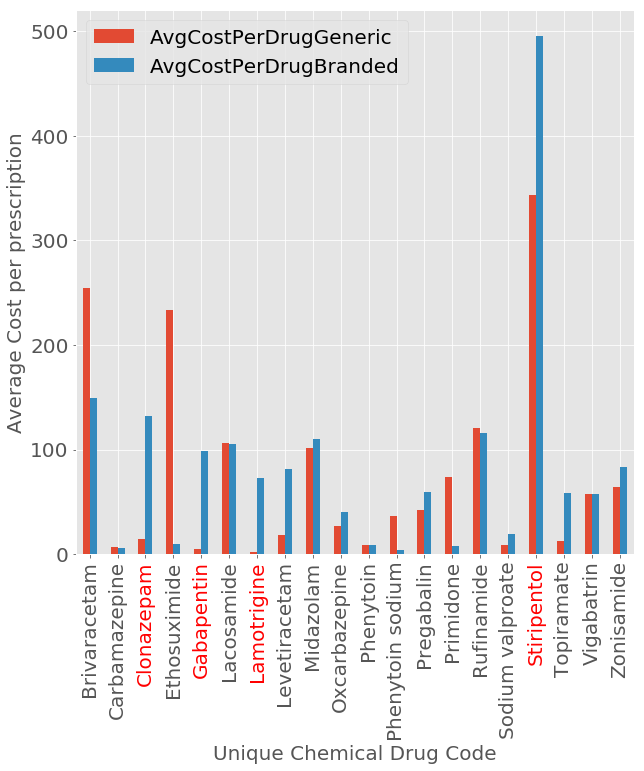

In [104]:
ax = alldf.plot(kind='bar', figsize=(10,10))
ax.legend(fontsize=20)
ax.set_ylabel("Average Cost per prescription",fontsize = 20)
ax.set_xlabel("Unique Chemical Drug Code",fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
ax.xaxis.get_ticklabels()[2].set_color('red')
ax.xaxis.get_ticklabels()[6].set_color('red')
ax.xaxis.get_ticklabels()[4].set_color('red')
ax.xaxis.get_ticklabels()[16].set_color('red')
plt.show()

<b> Highlighted above are the Unique drugs that have a large price discrepancy between it's branded drug and it's generic drug, we can do likewise analysis of what was done above and identify what this is costing the NHS. The drugs as highlighted above, are as follows:
***    
- Stiripentol
<br>
<br>
- Clonazepam
<br>
<br>
- Gabapentin
<br>
<br>
- Lamotrigine

</b>

In [105]:

dropcols = ['Unnamed: 17','Unnamed: 18', 'Gross Cost (£)', \
            'BNF Chapter', 'BNF Paragraph','BNF Section' , 'BNF Sub-Paragraph' ]
aeddrug = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing', \
                          'Practice', 'PRACTICE', dropcols)
aeddrug.head()

AMP_NM  Actual Cost (£)         BNF Code  Month  \
0                                -           389.21                -    4.0   
1                                -            24.49                -    4.0   
2             Aviva testing strips            98.53  0601060D0CCAAA0    4.0   
3      Contour Next testing strips            13.35  0601060D0DGAAA0    4.0   
4  FreeStyle Optium testing strips            28.41  0601060D0BJADA0    4.0   

   PRACTICE Presentation   Strength  Total Items  Total Quantity  \
0       1.0          NaN        NaN         14.0             0.0   
1       1.0   SUSPENSION  500MG/5ML          1.0           100.0   
2       1.0      REAGENT        NaN          3.0           350.0   
3       1.0      REAGENT        NaN          1.0            50.0   
4       1.0      REAGENT        NaN          1.0           100.0   

                                   VMP_NM VTM_NM    Year  
0                                       -      -  2016.0  
1                                       -      -  2016.0  
2  Blood glucose biosensor testing strips      -  2016.0  
3  Blood glucose biosensor testing strips      -  2016.0  
4  Blood glucose biosensor testing strips      -  2016.0

In [106]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
aeddrug = aeddrug.loc[(aeddrug['VTM_NM'] == 'Stiripentol') | \
           (aeddrug['VTM_NM'] == 'Clonazepam') | \
           (aeddrug['VTM_NM'] == 'Gabapentin') | \
           (aeddrug['VTM_NM'] == 'Lamotrigine')]
cols = ["Year", "Month"]
aeddrug[cols] = aeddrug[cols].applymap(np.int64)

aeddrug["Date"] =  aeddrug["Month"].astype(str) + aeddrug["Year"].astype(str)
aeddrug['Date'] = pd.to_datetime(aeddrug['Date'], format ='%m%Y')
aeddrug = aeddrug[aeddrug["BNF Code"] != '-']
aeddrug.reset_index(inplace=True,drop = True)
aeddrug.head()

AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE  \
0      -             3.89  0408010G0AAABAB      4       1.0   
1      -             1.62  0408010H0AAAAAA      4       1.0   
2      -            13.58  0408010H0AAAPAP      4       1.0   
3      -            19.89  0408010F0AAACAC      4       3.0   
4      -            66.09  0408010F0AAABAB      4       3.0   

         Presentation      Strength  Total Items  Total Quantity  \
0             Capsule         300mg          1.0           112.0   
1              Tablet         100mg          1.0            56.0   
2  Dispersible tablet           5mg          1.0            56.0   
3              Tablet           2mg          2.0            84.0   
4              Tablet  500microgram          5.0           312.0   

                                           VMP_NM       VTM_NM  Year  \
0                       Gabapentin 300mg capsules   Gabapentin  2016   
1                       Lamotrigine 100mg tablets  Lamotrigine  2016   
2  Lamotrigine 5mg dispersible tablets sugar free  Lamotrigine  2016   
3                          Clonazepam 2mg tablets   Clonazepam  2016   
4                 Clonazepam 500microgram tablets   Clonazepam  2016   

        Date  
0 2016-04-01  
1 2016-04-01  
2 2016-04-01  
3 2016-04-01  
4 2016-04-01

<b> Again, like before, I will separate the AEDs by whether they are generic or not. </b>

In [107]:

aeddrug['Generic'] = aeddrug['BNF Code'].str[10:12]

aeddrug['Generic'].replace('AA', 'Generic',inplace=True)
aeddrug.loc[aeddrug['Generic'] != 'Generic', 'Generic'] = 'Not Generic'

drugsbranded = aeddrug[aeddrug['Generic'] != 'Generic']
drugsbranded.reset_index(inplace = True, drop = True)
drugsgeneric = aeddrug[aeddrug['Generic'] == 'Generic']
drugsgeneric.reset_index(inplace = True, drop = True)


<b> For ease of understanding I created boolean masks below to separate out the drugs from each other as well as their generic/branded counterpart </b>

In [108]:
#Boolean masking for ease later
StiripentolG = drugsgeneric['VTM_NM'] ==  'Stiripentol' 
ClonazepamG = drugsgeneric['VTM_NM'] ==  'Clonazepam'
GabapentinG = drugsgeneric['VTM_NM'] ==  'Gabapentin'
LamotrigineG = drugsgeneric['VTM_NM'] ==  'Lamotrigine'
print("From June 2015 - June 2018 there were:")
print(int(mySum(drugsgeneric[StiripentolG]["Total Items"])), "generic prescriptions of Stiripentol")
print(int(mySum(drugsgeneric[ClonazepamG]["Total Items"])), "generic prescriptions of Clonazepam")
print(int(mySum(drugsgeneric[GabapentinG]["Total Items"])), "generic prescriptions of Gabapentin")
print(int(mySum(drugsgeneric[LamotrigineG]["Total Items"])), "generic prescriptions of Lamotrigine")

From June 2015 - June 2018 there were:
140 generic prescriptions of Stiripentol
59284 generic prescriptions of Clonazepam
536890 generic prescriptions of Gabapentin
141212 generic prescriptions of Lamotrigine


In [109]:
StiripentolB = drugsbranded['VTM_NM'] ==  'Stiripentol' 
ClonazepamB = drugsbranded['VTM_NM'] ==  'Clonazepam'
GabapentinB = drugsbranded['VTM_NM'] ==  'Gabapentin'
LamotrigineB = drugsbranded['VTM_NM'] ==  'Lamotrigine'
print("From June 2015 - June 2018 there were:")
print(int(mySum(drugsbranded[StiripentolB]["Total Items"])), "branded prescriptions of Stiripentol")
print(int(mySum(drugsbranded[ClonazepamB]["Total Items"])), "branded prescriptions of Clonazepam")
print(int(mySum(drugsbranded[GabapentinB]["Total Items"])), "branded prescriptions of Gabapentin")
print(int(mySum(drugsbranded[LamotrigineB]["Total Items"])), "branded prescriptions of Lamotrigine")

From June 2015 - June 2018 there were:
271 branded prescriptions of Stiripentol
2463 branded prescriptions of Clonazepam
9529 branded prescriptions of Gabapentin
178062 branded prescriptions of Lamotrigine


# Stiripentol
<b> I'll begin my analysis by looking deeper into stiripentol - it is by decent margin the biggest difference in price between the average generic expenditure on the drug and the average branded expenditure on the drug
    
N.B Stiripentol is used to treat children with Dravet Syndrome, usually in combination with other drugs. It is a rarely prescribed drug, having only been prescribed 408 times in NI from June 2015- June 2018. </b>

In [111]:
import numpy as np
allDates = list(drugsbranded[StiripentolB]["Date"].unique())
allDates = sorted(allDates)

stirCostB = groupbylist(drugsbranded[StiripentolB], "Actual Cost (£)", "Date")
#stirCostB = np.array(stirCostB)

stirCostG = groupbylist(drugsgeneric[StiripentolG], "Actual Cost (£)", "Date")
#stirCostG = np.array(stirCostG)
#stirCostdiff = stirCostB - stirCostG
#print(stirCostdiff)

print("\nThere were", int(mySum(drugsgeneric[StiripentolG]["Total Items"])), \
      "generic prescriptions of Stiripentol from June 2015 - June 2018")

print("Cost to the NHS in NI per month for generic Stiripentol:\n", stirCostG)

print("\nThere were", int(mySum(drugsbranded[StiripentolB]["Total Items"])), \
      "branded prescriptions of Stiripentol from June 2015 - June 2018")

print("Cost to the NHS in NI per month for branded Stiripentol:\n", stirCostB)



There were 140 generic prescriptions of Stiripentol from June 2015 - June 2018
Cost to the NHS in NI per month for generic Stiripentol:
 [132.53, 568.0, 681.6, 568.0, 568.0, 681.6, 568.0, 23.67, 444.93, 142.0, 965.6, 113.6, 227.2, 113.6, 1278.0, 994.0, 1107.6, 1311.13, 2432.93, 3550.0, 2698.0, 1164.4, 2735.87, 4165.34, 2262.54, 946.66, 1571.46, 2385.6, 2645.93, 5154.6, 1703.98, 994.0, 3247.05]

There were 271 branded prescriptions of Stiripentol from June 2015 - June 2018
Cost to the NHS in NI per month for branded Stiripentol:
 [5628.82, 2385.45, 8008.5, 2009.5, 6342.62, 4766.5, 3323.96, 4266.33, 3138.33, 5637.8, 4340.5, 6880.71, 1454.23, 4632.5, 3554.01, 6000.05, 2218.5, 4190.5, 2719.72, 2831.17, 2218.5, 3034.08, 279.37, 3697.5, 3830.03, 2408.53, 2793.66, 3713.93, 2839.04, 3713.93, 1766.58, 3728.98, 2218.5, 4308.91, 3713.93, 2758.83, 2785.44]


<b>At a glance there seems to be a pronounced difference, even if one takes into account that in that time period double the branded prescriptions were purchased. Perhaps we can get a better idea if we look deeper into the cost per ml between generic and branded </b>

<b> To reliably compare the price difference between the generic and branded versions of each of these drugs, again I will have to compare across strength of the product, if the measurement is the same then I don't think that taking into account the way it is presented matters much - 250mg of powder and 250mg of capsules should be treated equal and are most likely interchangable.
    
Like before I will find the cost per mg for each of these drugs and compare the prices of branded and generic for each drug <b>

In [112]:
GSpresentations = dict(drugsgeneric[StiripentolG]["Presentation"].value_counts())
GSstrength = dict(drugsgeneric[StiripentolG]["Strength"].value_counts())
BSpresentations = dict(drugsbranded[StiripentolB]["Presentation"].value_counts())
BSstrength = dict(drugsbranded[StiripentolB]["Strength"].value_counts())

print("Types of generic Stiripentol Presentations", GSpresentations)
print("Types of branded Stiripentol Presentations", BSpresentations)
print("Types of generic Stiripentol Strength", GSstrength)
print("Types of branded Stiripentol Strength", BSstrength)

Types of generic Stiripentol Presentations {'Powder': 75, 'Capsule': 44}
Types of branded Stiripentol Presentations {'Powder': 166, 'Capsule': 44}
Types of generic Stiripentol Strength {'250mg': 119}
Types of branded Stiripentol Strength {'500mg': 129, '250mg': 81}


<b> Generic Stiripentol only has a strength of 250mg, so it is against this strength that I will compare the branded version of it against </b>

In [113]:
compar = drugsbranded[StiripentolB]
compar = compar.loc[compar['Strength'] == '250mg']
compar.reset_index(drop = True, inplace =True)
compar.head()

AMP_NM  Actual Cost (£)         BNF Code  \
0  Diacomit 250mg oral powder sachets            568.0  0408010AGBBACAC   
1  Diacomit 250mg oral powder sachets            284.0  0408010AGBBACAC   
2  Diacomit 250mg oral powder sachets            284.0  0408010AGBBACAC   
3  Diacomit 250mg oral powder sachets            852.0  0408010AGBBACAC   
4  Diacomit 250mg oral powder sachets            568.0  0408010AGBBACAC   

   Month  PRACTICE Presentation Strength  Total Items  Total Quantity  \
0      4     333.0       Powder    250mg          1.0           120.0   
1      4     471.0       Powder    250mg          2.0            60.0   
2      4     602.0       Powder    250mg          1.0            60.0   
3      8     273.0       Powder    250mg          3.0           180.0   
4      8     333.0       Powder    250mg          1.0           120.0   

                                  VMP_NM       VTM_NM  Year       Date  \
0  Stiripentol 250mg oral powder sachets  Stiripentol  2016 2016-04-01   
1  Stiripentol 250mg oral powder sachets  Stiripentol  2016 2016-04-01   
2  Stiripentol 250mg oral powder sachets  Stiripentol  2016 2016-04-01   
3  Stiripentol 250mg oral powder sachets  Stiripentol  2015 2015-08-01   
4  Stiripentol 250mg oral powder sachets  Stiripentol  2015 2015-08-01   

       Generic  
0  Not Generic  
1  Not Generic  
2  Not Generic  
3  Not Generic  
4  Not Generic

In [114]:
costperbrandedS = mySum(compar['Actual Cost (£)'])/mySum(compar['Total Quantity'])

costpergenericS = mySum(drugsgeneric[StiripentolG]['Actual Cost (£)'])/\
mySum(drugsgeneric[StiripentolG]['Total Quantity'])

print(("\nAverage cost per prescription for generic Stiripentol was £%.3f/250mg") % \
       (costpergenericS))
print(("\nAverage cost per prescription for branded Stiripentol was £%.3f/250mg") % \
       (costperbrandedS))

# percentageIncrease = ((costpermlgeneric - costpermlbranded)/costpermlbranded) * 100

# print(("Generic Ethosuximide costs the NHS %.2f%% more than the branded version on average (or 27x the price) when they are the same preparation/strength") % (percentageIncrease))


Average cost per prescription for generic Stiripentol was £4.733/250mg

Average cost per prescription for branded Stiripentol was £4.733/250mg


<b> Strangely there is no cost difference between generic and branded prescriptions of Stiripentol, the difference in cost therefore must largely be down to the branded versions of Stiripentol on average being of 500mg strength rather than 250mg, which it always is for the generic version - even if we investigate the price of the 500mg dose, it still checks out as being the same price, if not cheaper because its in bulk. This is demonstrated below:

In [115]:
compar = drugsbranded[StiripentolB]
compar = compar.loc[compar['Strength'] == '500mg']
costperbrandedS = mySum(compar['Actual Cost (£)'])/mySum(compar['Total Quantity'])
costperbrandedS = costperbrandedS/2   # Divide by 2 because we are measuring the price of 500mg doses

costpergenericS = mySum(drugsgeneric[StiripentolG]['Actual Cost (£)'])/\
mySum(drugsgeneric[StiripentolG]['Total Quantity'])


# costpermlgeneric = mySum(drugsgeneric['Actual Cost (£)'])/mySum(drugsgeneric['Total Quantity'])

print(("Average cost per prescription for generic Stiripentol was £%.3f/250mg") % \
       (costpergenericS))
print(("Average cost per prescription for branded Stiripentol was £%.3f/250mg") % \
       (costperbrandedS))

Average cost per prescription for generic Stiripentol was £4.733/250mg
Average cost per prescription for branded Stiripentol was £4.108/250mg


# Clonazepam
<b> Hopefully we can find more price differentials by analysing the cost of Clonazepam. It is a much more commonly prescribed drug in NI, having been prescribed 61,729 times in NI from June 2015 - June 2018. I'll follow the steps I took when comparing the prices of Stiripentol </b> 

In [116]:
GCpresentations = dict(drugsgeneric[ClonazepamG]["Presentation"].value_counts())
GCstrength = dict(drugsgeneric[ClonazepamG]["Strength"].value_counts())
BCpresentations = dict(drugsbranded[ClonazepamB]["Presentation"].value_counts())
BCstrength = dict(drugsbranded[ClonazepamB]["Strength"].value_counts())

print("Types of generic Clonazepam Presentations", GCpresentations)
print("Types of branded Clonazepam Presentations", BCpresentations)
print("Types of generic Clonazepam Strength", GCstrength)
print("Types of branded Clonazepam Strength", BCstrength)

print("\nThere were", int(mySum(drugsgeneric[ClonazepamG]["Total Items"])), \
      "generic prescriptions of Clonazepam from June 2015 - June 2018")

print("There were", int(mySum(drugsbranded[ClonazepamB]["Total Items"])), \
      "branded prescriptions of Clonazepam from June 2015 - June 2018")

Types of generic Clonazepam Presentations {'Tablet': 16133}
Types of branded Clonazepam Presentations {'Oral solution': 1801, 'Solution for injection': 15}
Types of generic Clonazepam Strength {'500microgram': 11332, '2mg': 4801}
Types of branded Clonazepam Strength {'500microgram/5ml': 1398, '2mg/5ml': 403, '1mg/1ml': 15}

There were 59284 generic prescriptions of Clonazepam from June 2015 - June 2018
There were 2463 branded prescriptions of Clonazepam from June 2015 - June 2018


<b>The most common dosage of Clonazepam between the two types of prescription seems to be the 500 microgram dose, although the presentations are different (Generic Clonazepam  is in tablet form and branded Clonazepam is in liquid form) the strength of the two doses are shared and so they should roughly cost the same.</b>

In [117]:
import numpy as np

compar = drugsbranded[ClonazepamB]
compar = compar.loc[compar['Strength'] == '500microgram/5ml']
compar.reset_index(drop = True, inplace =True)
#print(compar.head())
GBquanpermonth = np.array(groupbylist(compar, "Total Quantity", "Date" ))
GBcostpermonth = np.array(groupbylist(compar, "Actual Cost (£)", "Date" ))
GBcostpermonth = GBcostpermonth/GBquanpermonth # cost per unit quantity (?)
#print(GBcostpermonth)

compar1 = drugsgeneric[ClonazepamG]
compar1 = compar1.loc[compar1['Strength'] == '500microgram']
compar1.reset_index(drop = True, inplace =True)

GCquanpermonth = np.array(groupbylist(compar1, "Total Quantity", "Date" ))
GCcostpermonth = np.array(groupbylist(compar1, "Actual Cost (£)", "Date" ))
GCcostpermonth = GCcostpermonth/GCquanpermonth # cost per unit quantity (?)
#print(GCcostpermonth)

In [119]:
costperbrandedC = mySum(compar['Actual Cost (£)'])/mySum(compar['Total Quantity'])
costpergenericC = mySum(compar1['Actual Cost (£)'])/mySum(compar1['Total Quantity'])



# costpermlgeneric = mySum(drugsgeneric['Actual Cost (£)'])/mySum(drugsgeneric['Total Quantity'])

print(("Average cost per prescription for generic Clonazepam was £%.3f/500 micrograms") % \
       (costpergenericC))
print(("Average cost per prescription for branded Clonazepam was £%.3f/500 micrograms") % \
       (costperbrandedC))


times = costperbrandedC/costpergenericC
Cgencost = mySum(drugsgeneric[ClonazepamG]["Actual Cost (£)"])
Cbrancost = mySum(drugsbranded[ClonazepamB]["Actual Cost (£)"])
savings = Cgencost + Cbrancost/times
savings = (Cgencost + Cbrancost) - savings

print(("\nBranded Clonazepam costs the NHS %.2fx more than the generic version on average when they are the same preparation/strength") % (times))
print(("\nIf the NHS used the generic Clonazepam instead of the branded version from June 2015 - June 2018 in Northern Ireland, then roughly the potential savings could have been £%.2f, which is £%.2f a calender year") % (savings, savings/3))


Average cost per prescription for generic Clonazepam was £0.211/500 micrograms
Average cost per prescription for branded Clonazepam was £0.417/500 micrograms

Branded Clonazepam costs the NHS 1.97x more than the generic version on average when they are the same preparation/strength

If the NHS used the generic Clonazepam instead of the branded version from June 2015 - June 2018 in Northern Ireland, then roughly the potential savings could have been £159939.50, which is £53313.17 a calender year


<b> Based on this informaton, one could say it's an easy suggestion to persuade GP practices to switch from branded to generic Clonazepam as the cost saving on the NHS is evident. However in my research into AEDs online I found that sometimes GPs may prescribe patients with liquid form medication for extreme cases as some epileptic patients struggle to consume their medication in tabular form sometimes - especially small children.
    
Whenever this is not the case however, the switch from branded Clonazepam to generic should be done to save costs.</b>

# Clonazepam - Price analysis

In [120]:
Clonazepam = aeddrug[aeddrug['VTM_NM'] ==  'Clonazepam']
Clonazepam.head()

AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE   Presentation  \
3       -            19.89  0408010F0AAACAC      4       3.0         Tablet   
4       -            66.09  0408010F0AAABAB      4       3.0         Tablet   
18      -            26.60  0408010F0AAACAC      4       5.0         Tablet   
19      -            41.89  0408010F0AAABAB      4       5.0         Tablet   
28      -            96.95  0408010F0AACRCR      4       6.0  Oral solution   

        Strength  Total Items  Total Quantity  \
3            2mg          2.0            84.0   
4   500microgram          5.0           312.0   
18           2mg          1.0           112.0   
19  500microgram          3.0           196.0   
28       2mg/5ml          1.0           150.0   

                                         VMP_NM      VTM_NM  Year       Date  \
3                        Clonazepam 2mg tablets  Clonazepam  2016 2016-04-01   
4               Clonazepam 500microgram tablets  Clonazepam  2016 2016-04-01   
18                       Clonazepam 2mg tablets  Clonazepam  2016 2016-04-01   
19              Clonazepam 500microgram tablets  Clonazepam  2016 2016-04-01   
28  Clonazepam 2mg/5ml oral solution sugar free  Clonazepam  2016 2016-04-01   

        Generic  
3       Generic  
4       Generic  
18      Generic  
19      Generic  
28  Not Generic

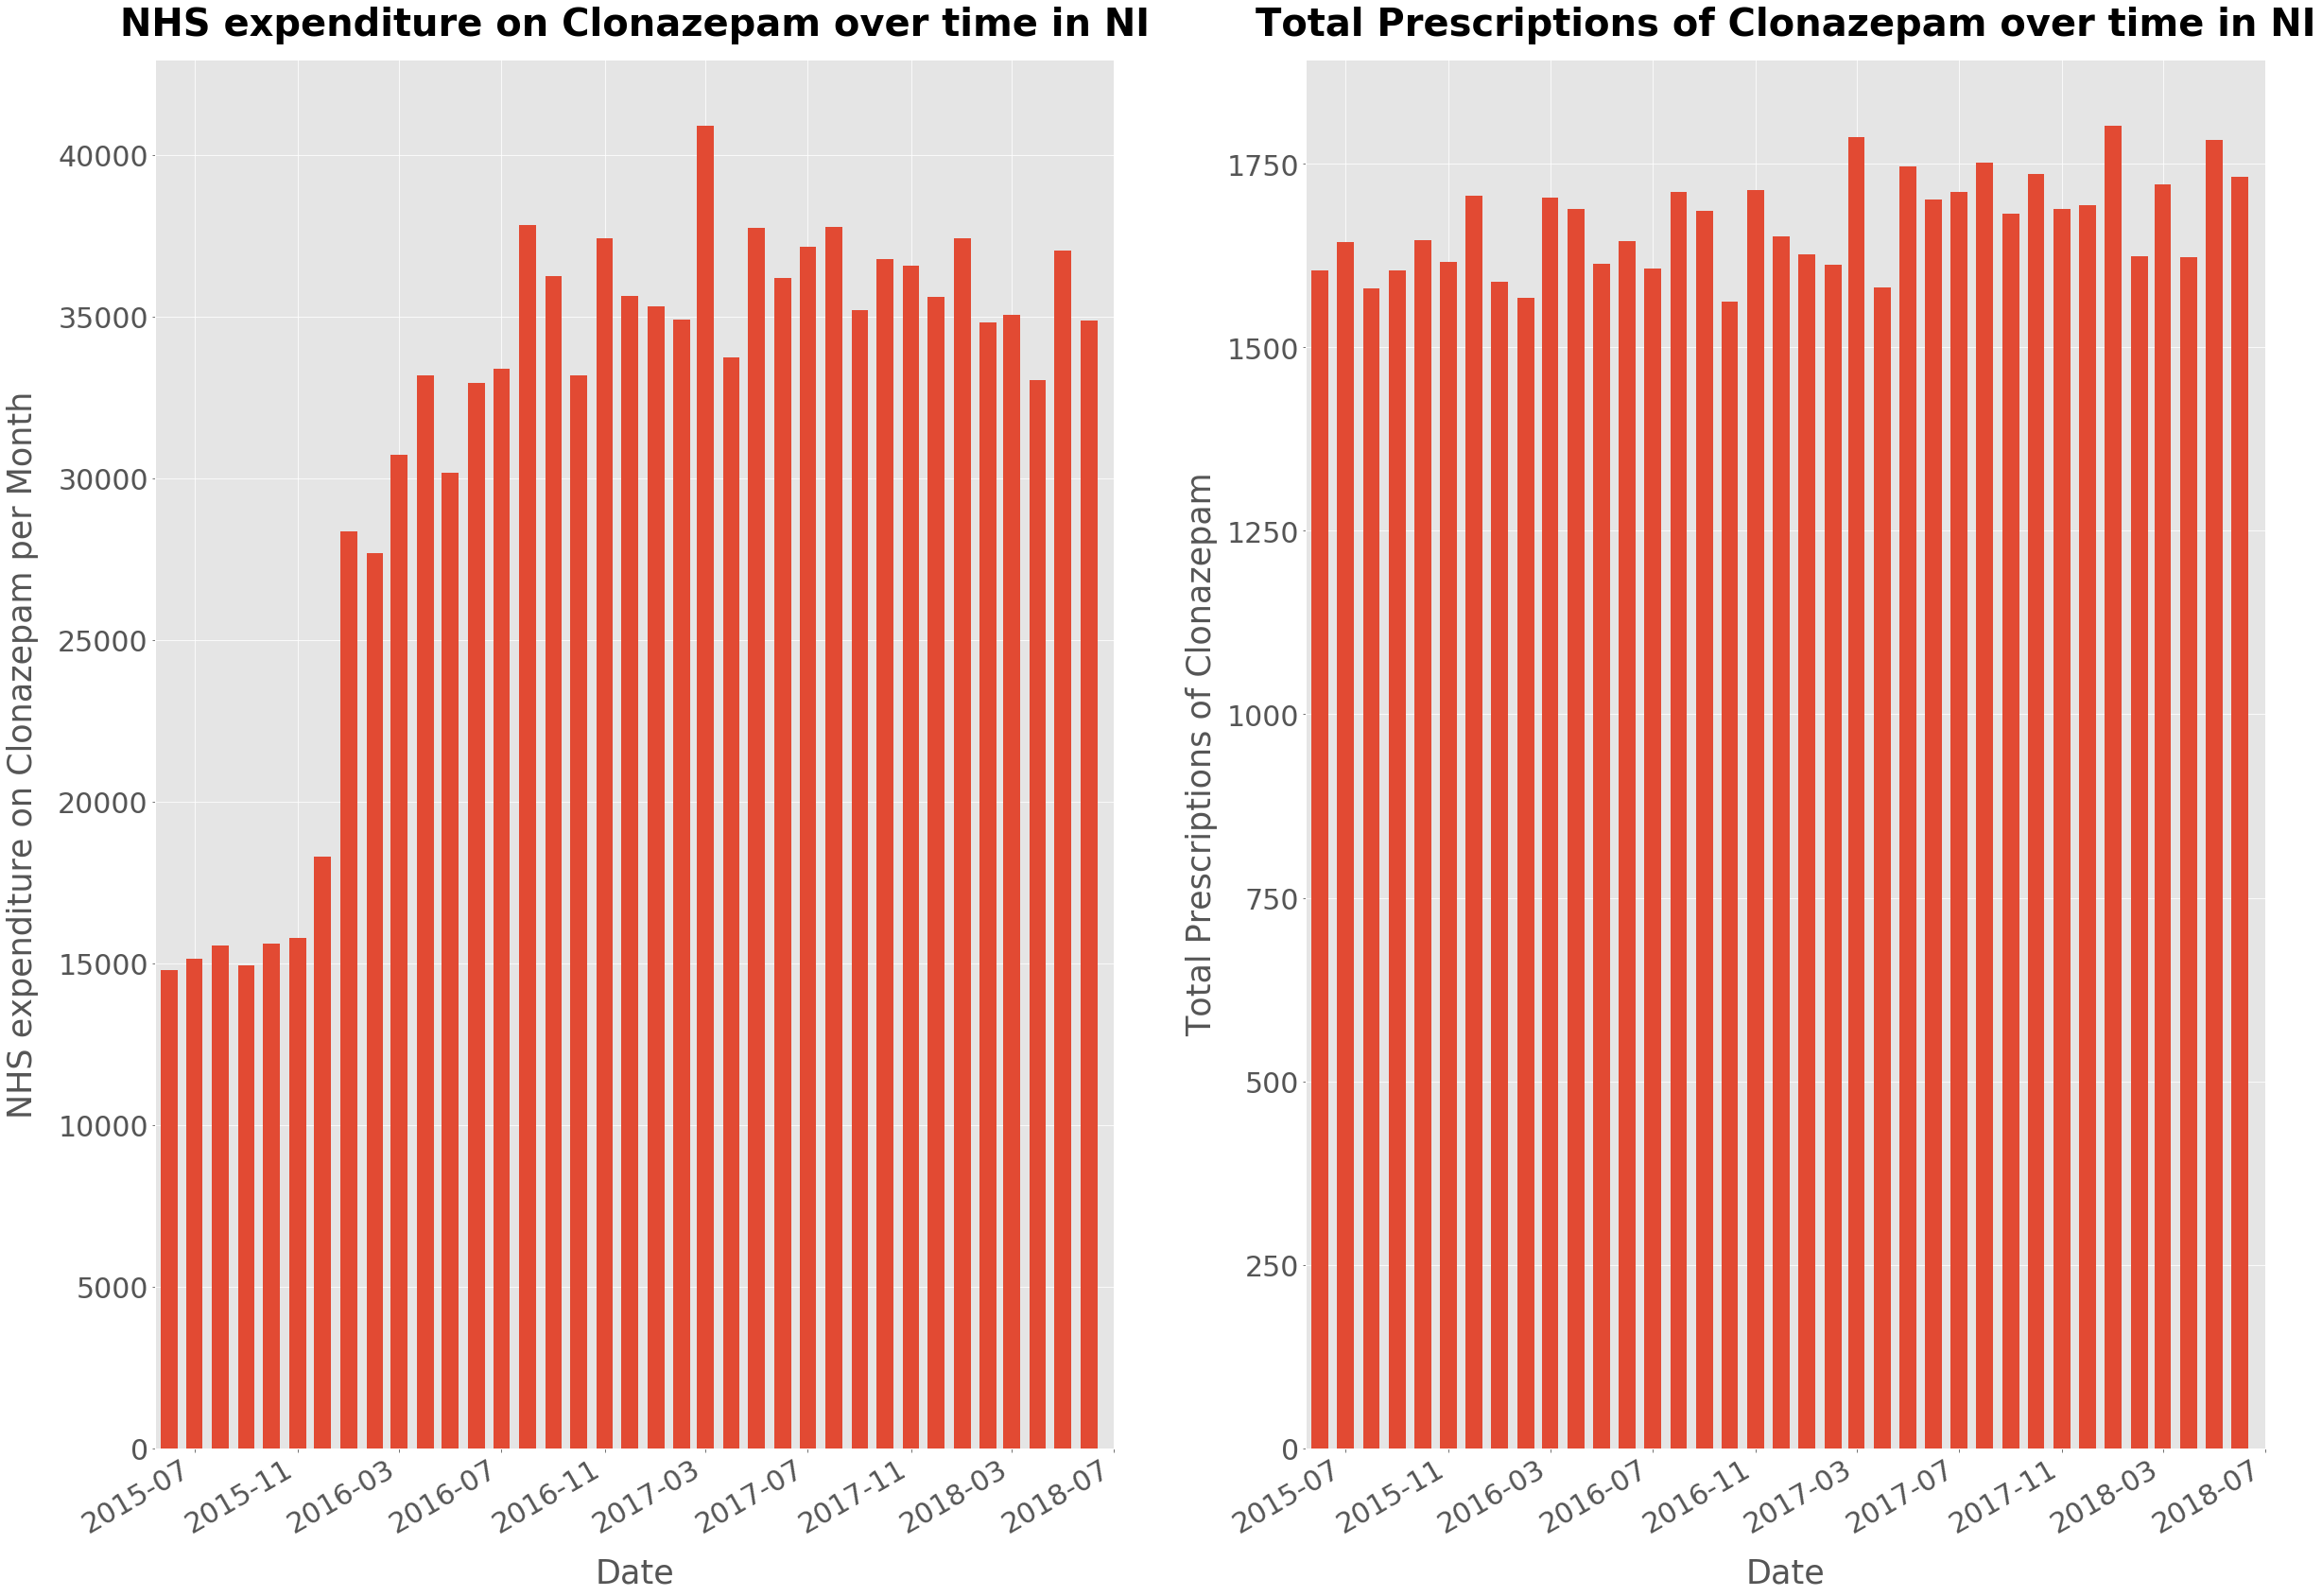

In [121]:
costPerMonth = groupbylist(Clonazepam, "Actual Cost (£)", "Date")
itemsPerMonth = groupbylist(Clonazepam, "Total Items", "Date")
fig, (ax, ax2) = plt.subplots(1, 2)
fig.set_size_inches(40,30)
#plt.subplot(1, 2, 1)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('NHS expenditure on Clonazepam per Month', fontsize = 35, labelpad = 20.0)
ax.set_title('NHS expenditure on Clonazepam over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax.grid(True)
ax.bar(allDates, costPerMonth, width = 20)
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
#ax.set_ylim([0,60000000])
#ax.set_xlim([datetime.date(2015, 12, 15),datetime.date(2018, 6, 30)])
ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Total Prescriptions of Clonazepam', fontsize = 35, labelpad = 10.0)
ax2.set_title('Total Prescriptions of Clonazepam over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax2.grid(True)
ax2.bar(allDates, itemsPerMonth, width = 20)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
plt.subplots_adjust(hspace = 0.2) 

<b> Again the visualisation shows a sudden jump in cost, only this time the jump happens at the start of the 2016 calendar year. I'll perform a visualissation below to see if the jump in cost this time is in relation to replacing generic medication with branded. </b>

In [122]:
compar = drugsbranded[ClonazepamB]
#compar = compar.loc[compar['Strength'] == '500microgram/5ml']
compar.reset_index(drop = True, inplace =True)
compar1 = drugsgeneric[ClonazepamG]
#compar1 = compar1.loc[compar1['Strength'] == '500microgram']
compar1.reset_index(drop = True, inplace =True)

gendates = sorted(compar1["Date"].unique())
brandates = sorted(compar["Date"].unique())
clonBitems = groupbylist(compar, "Total Items", "Date")
clonGitems = groupbylist(compar1, "Total Items", "Date")
clonBcost = groupbylist(compar, "Actual Cost (£)", "Date")
clonGcost = groupbylist(compar1, "Actual Cost (£)", "Date")

(735733.0, 736876.0)

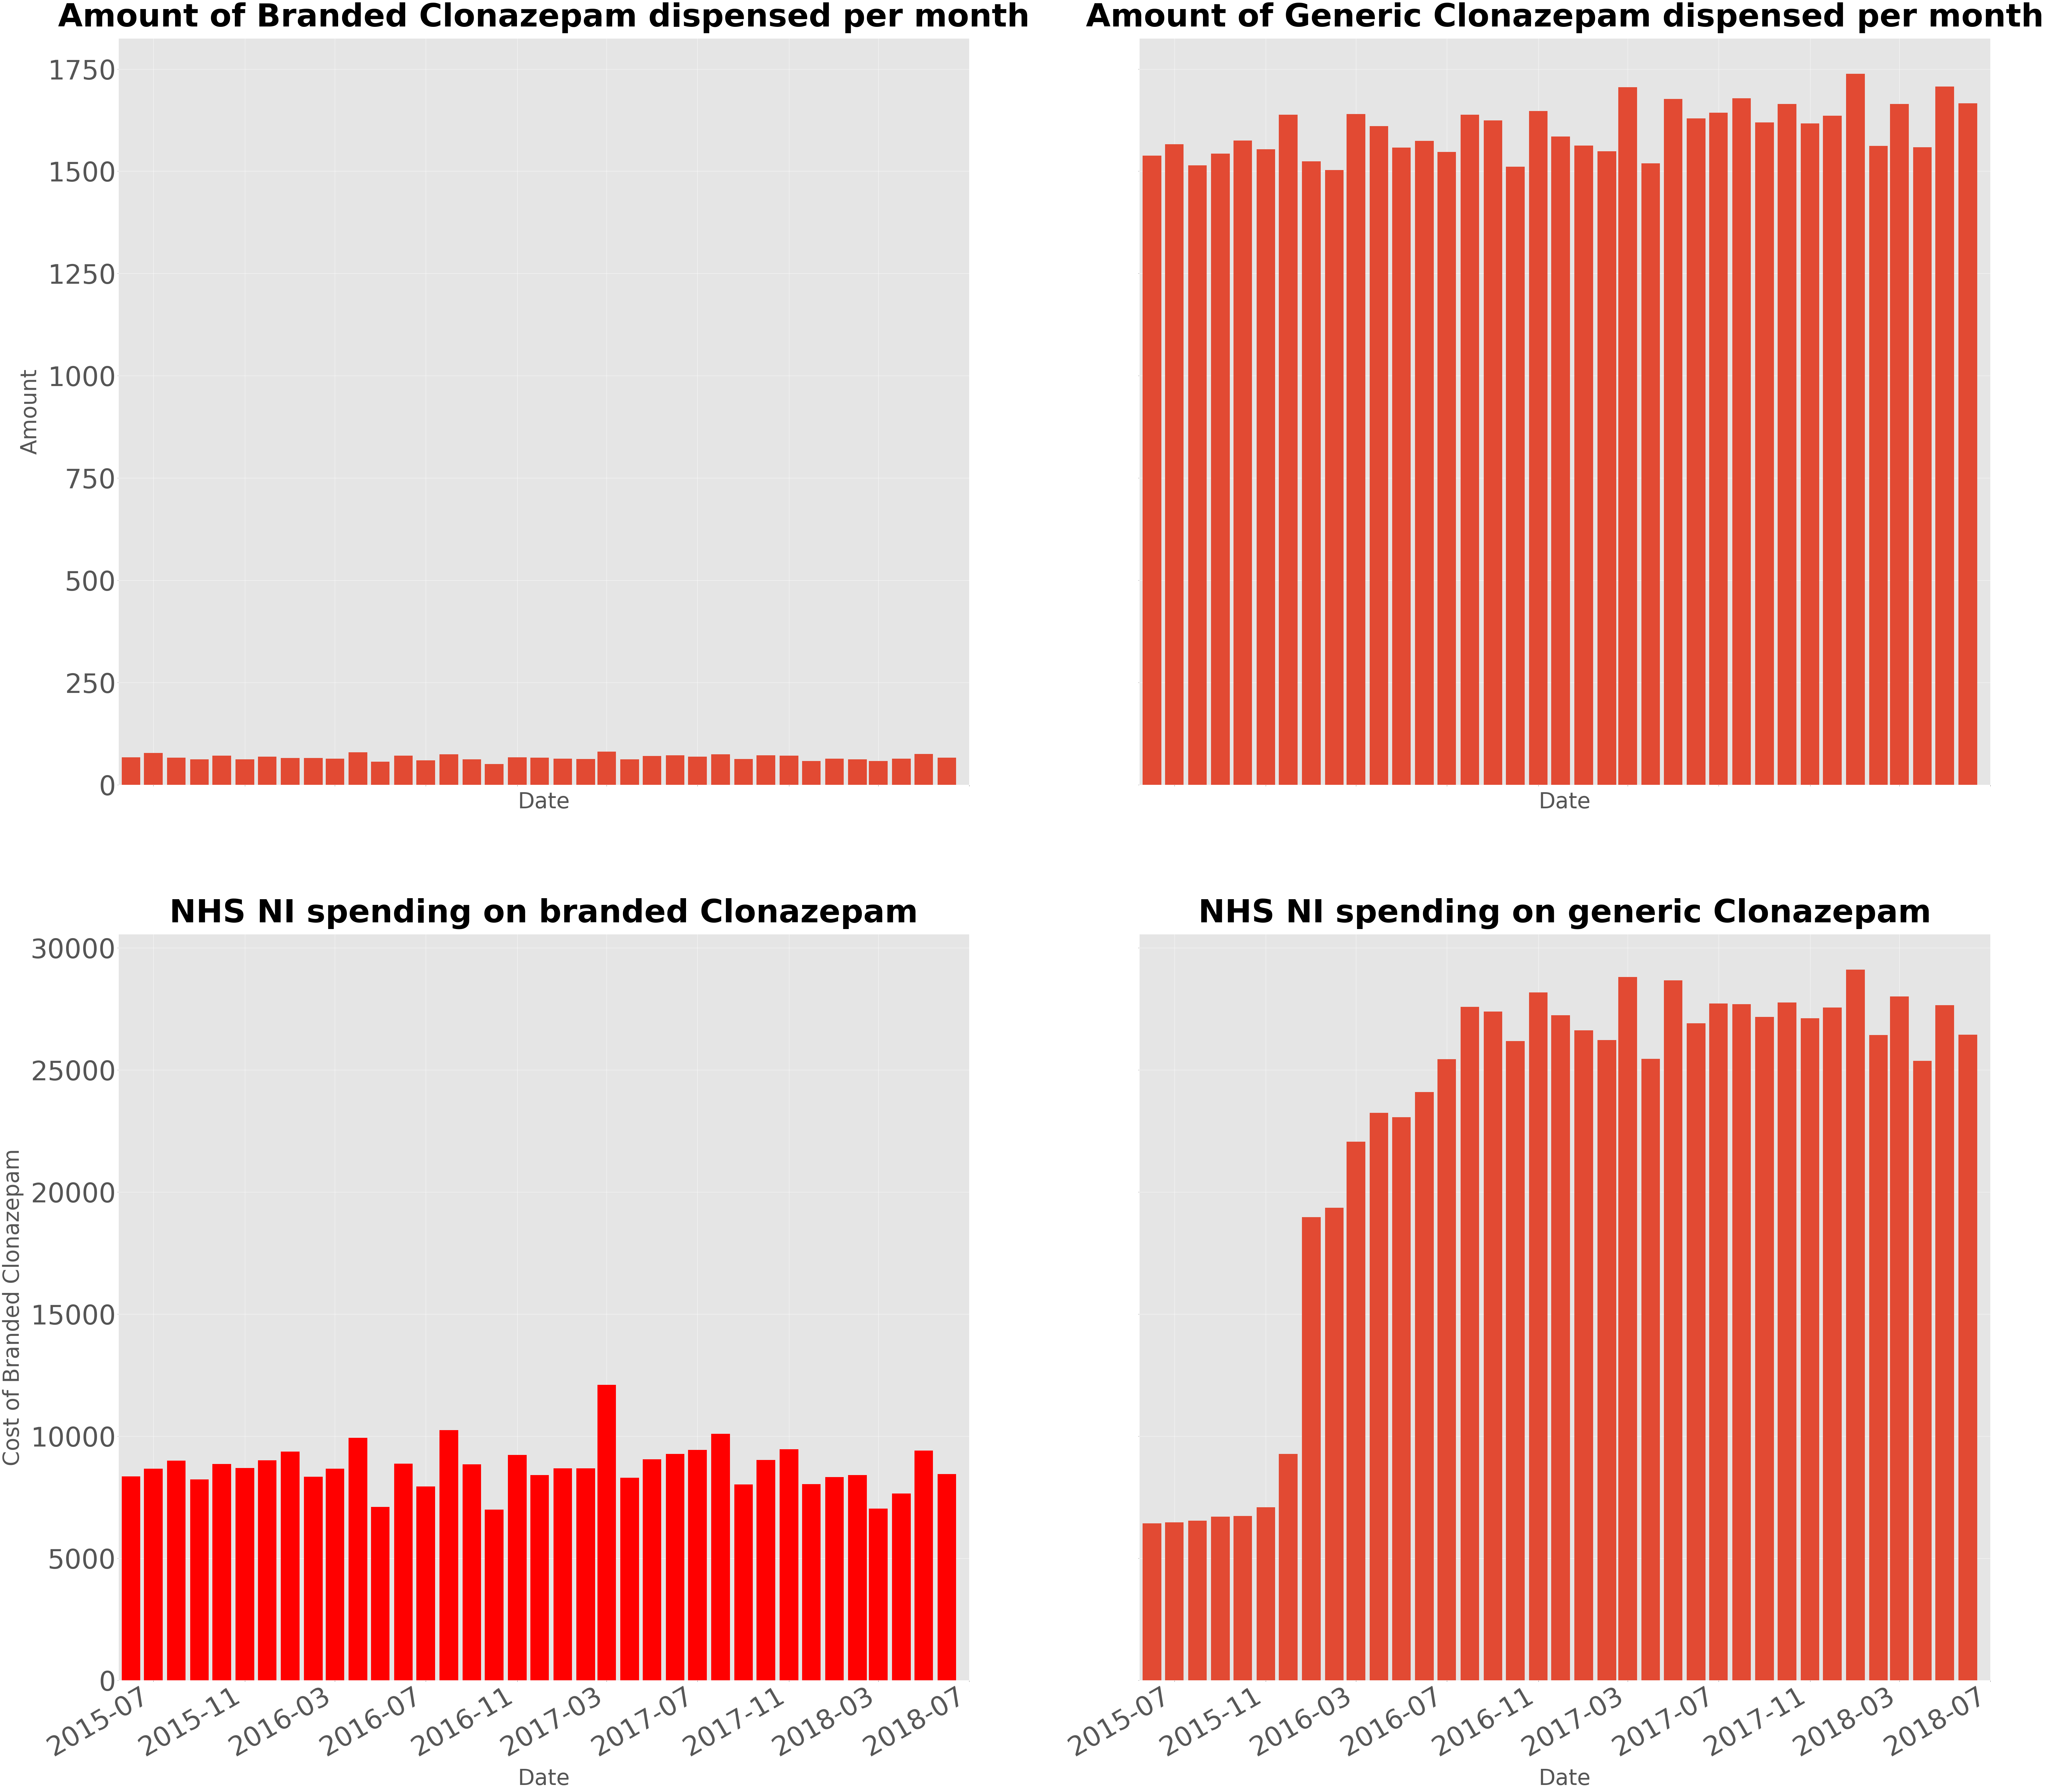

In [123]:
fig, ((ax5, ax6), (ax3, ax4)) = plt.subplots(2, 2, sharey = 'row', sharex ='col')
fig.set_size_inches(100,100)
fig.autofmt_xdate()


ax3.set_xlabel('Date', fontsize = 65, labelpad = 20.0)
ax3.set_ylabel('Cost of Branded Clonazepam', fontsize = 65, labelpad = 20.0)
ax3.set_title('NHS NI spending on branded Clonazepam', fontsize = 95, fontweight = 800, pad = 35.5)
ax3.grid(True)
ax3.bar(brandates, clonBcost, width = 25)
ax3.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax3.xaxis.set_tick_params(labelsize = 80)
ax3.yaxis.set_tick_params(labelsize = 80)

ax4.set_xlabel('Date', fontsize = 65, labelpad = 20.0)
ax4.grid(True)
ax4.bar(gendates, clonGcost, width = 25)
ax4.set_title('NHS NI spending on generic Clonazepam', fontsize = 95, fontweight = 800, pad = 35.5)
ax4.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax4.xaxis.set_tick_params(labelsize = 80)


ax5.set_xlabel('Date', fontsize = 65, labelpad = 20.0)
ax5.set_ylabel('Amount', fontsize = 65, labelpad = 20.0)
ax5.set_title('Amount of Branded Clonazepam dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax5.grid(True)
ax5.bar(brandates, clonBitems, width = 25)
ax5.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax5.yaxis.set_tick_params(labelsize = 80)

ax6.set_xlabel('Date', fontsize = 65, labelpad = 20.0)
ax6.set_title('Amount of Generic Clonazepam dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax6.grid(True)
ax6.bar(gendates, clonGitems, width = 25)
ax6.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])


<b> Yet again the sudden rise in price is not in relation to a change from using generic medication to branded medication. But with the above visualisation we can deduce that the rise in NHS NI spending on Clonazepam was down to a sudden hike in price by the generic Clonazepam supplier of the NHS, as the amount of generic Clonazepam dispensed remained largely the same while the spending on the drug rose. 
    
This does not seem to be a marketwide price hike as the price of the branded Clonazepam has seemed to remain the same as NHS spending on it remained the same while the prescriptions dispensed remained the same.
I'll delve deeper into the price per unit quantity of 500mg for generic and branded Clonazepam and see if this is the direct cause </b>

In [146]:
compar = drugsbranded[ClonazepamB]
compar = compar.loc[compar['Strength'] == '500microgram/5ml']
compar.reset_index(drop = True, inplace =True)
#print(compar.head())
GBquanpermonth = np.array(groupbylist(compar, "Total Quantity", "Date" ))
GBcostpermonth = np.array(groupbylist(compar, "Actual Cost (£)", "Date" ))
GBcostpermonth = GBcostpermonth/GBquanpermonth # cost per unit quantity (?)
#print(GBcostpermonth)

compar1 = drugsgeneric[ClonazepamG]
compar1 = compar1.loc[compar1['Strength'] == '500microgram']
compar1.reset_index(drop = True, inplace =True)

GCquanpermonth = np.array(groupbylist(compar1, "Total Quantity", "Date" ))
GCcostpermonth = np.array(groupbylist(compar1, "Actual Cost (£)", "Date" ))
GCcostpermonth = GCcostpermonth/GCquanpermonth # cost per unit quantity (?)

gendates = sorted(compar1["Date"].unique())
brandates = sorted(compar["Date"].unique())

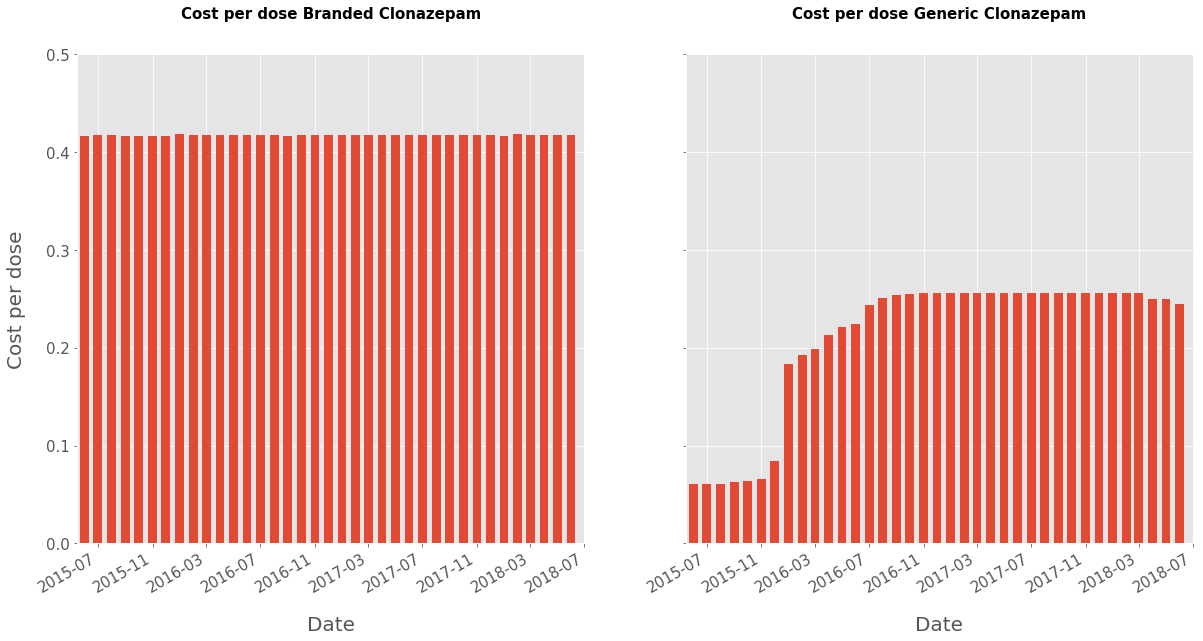

In [147]:
fig, ((ax3, ax4)) = plt.subplots(1, 2, sharey = 'row')
fig.set_size_inches(20,10)
fig.autofmt_xdate()


ax3.set_xlabel('Date', fontsize = 20, labelpad = 20.0)
ax3.set_ylabel('Cost per dose', fontsize = 20, labelpad = 20.0)
ax3.set_title('Cost per dose Branded Clonazepam', fontsize = 15, fontweight = 800, pad = 35.5)
ax3.grid(True)
ax3.bar(brandates, GBcostpermonth, width = 20)
ax3.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax3.set_ylim(0, 0.5)
ax3.xaxis.set_tick_params(labelsize = 15)
ax3.yaxis.set_tick_params(labelsize =15)

ax4.set_xlabel('Date', fontsize = 20, labelpad = 20.0)
ax4.grid(True)
ax4.bar(gendates, GCcostpermonth, width = 20)
ax4.set_title('Cost per dose Generic Clonazepam', fontsize = 15, fontweight = 800, pad = 35.5)
ax4.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax4.xaxis.set_tick_params(labelsize = 15)

# Lamotrigine
A commonly enough dispensed drug in comparison with the others I've analsyed, there have been 319,274 prescriptions of Lamotigine dispensed in NI from June 2015 - 2018.

N.B Used for focal seizures, primary and secondary generalised tonic-clonic seizures and for seizures associated with Lennox-Gastaut syndrome

In [127]:
GLpresentations = dict(drugsgeneric[LamotrigineG]["Presentation"].value_counts())
GLstrength = dict(drugsgeneric[LamotrigineG]["Strength"].value_counts())
BLpresentations = dict(drugsbranded[LamotrigineB]["Presentation"].value_counts())
BLstrength = dict(drugsbranded[LamotrigineB]["Strength"].value_counts())

print("Types of generic Lamotrigine Presentations", GLpresentations)
print("Types of branded Lamotrigine Presentations", BLpresentations)
print("Types of generic Lamotrigine Strength", GLstrength)
print("Types of branded Lamotrigine Strength", BLstrength)

print("\nThere were", int(mySum(drugsgeneric[LamotrigineG]["Total Items"])), \
      "generic prescriptions of Lamotrigine from June 2015 - June 2018")

print("There were", int(mySum(drugsbranded[LamotrigineB]["Total Items"])), \
      "branded prescriptions of Lamotrigine from June 2015 - June 2018")

Types of generic Lamotrigine Presentations {'Tablet': 36874, 'Dispersible tablet': 7365}
Types of branded Lamotrigine Presentations {'Tablet': 39907, 'Dispersible tablet': 10348}
Types of generic Lamotrigine Strength {'100mg': 13336, '25mg': 12450, '50mg': 10283, '200mg': 6889, '5mg': 1281}
Types of branded Lamotrigine Strength {'100mg': 15448, '25mg': 13614, '50mg': 10414, '200mg': 9136, '5mg': 1403, '2mg': 240}

There were 141212 generic prescriptions of Lamotrigine from June 2015 - June 2018
There were 178062 branded prescriptions of Lamotrigine from June 2015 - June 2018


<b> Comparing between the generic and branded versions of Lamotigine seems very straight forward, the presentation style is basically the same with both only coming in tablet form. The most common strength is 100mg, so I will do my statistical comparison on between the two types of drug on it. </b>

In [131]:
compar = drugsbranded[LamotrigineB]
compar = compar.loc[compar['Strength'] == '100mg']
compar.reset_index(drop = True, inplace =True)
#print(compar.head())

compar1 = drugsgeneric[LamotrigineG]
compar1 = compar1.loc[compar1['Strength'] == '100mg']
compar1.reset_index(drop = True, inplace =True)
#print(compar1.head())

In [132]:
costperbrandedL = mySum(compar['Actual Cost (£)'])/mySum(compar['Total Quantity'])
costpergenericL = mySum(compar1['Actual Cost (£)'])/mySum(compar1['Total Quantity'])



# costpermlgeneric = mySum(drugsgeneric['Actual Cost (£)'])/mySum(drugsgeneric['Total Quantity'])

print(("Average cost per prescription for generic Lamotrigine was £%.3f/500 micrograms") % \
       (costpergenericL))
print(("Average cost per prescription for branded Lamotrigine was £%.3f/500 micrograms") % \
       (costperbrandedL))

#percentageIncrease = ((costperbrandedL - costpergenericL)/costperbrandedL) * 100
times = costperbrandedL/costpergenericL

Lgencost = mySum(drugsgeneric[LamotrigineG]["Actual Cost (£)"])
Lbrancost = mySum(drugsbranded[LamotrigineB]["Actual Cost (£)"])
savings = Lgencost + Lbrancost/times
savings = (Lgencost + Lbrancost) - savings

print(("\nBranded Lamotrigine costs the NHS %.2fx more than the generic version on average when they are the same preparation/strength") % (times))
print(("\nIf the NHS used the generic Lamotrigine instead of the branded version from June 2015 - June 2018, then roughly the potential savings could have been £%.2f, which is £%.2f a calender year") % (savings, savings/3))

Average cost per prescription for generic Lamotrigine was £0.032/500 micrograms
Average cost per prescription for branded Lamotrigine was £1.233/500 micrograms

Branded Lamotrigine costs the NHS 38.86x more than the generic version on average when they are the same preparation/strength

If the NHS used the generic Lamotrigine instead of the branded version from June 2015 - June 2018, then roughly the potential savings could have been £12689902.61, which is £4229967.54 a calender year


<b>This information strongly suggests that the NHS should refrain from prescribing the branded version of Lamotrigine as it has been proven to be far too overpirced, and at approximately an extra cost of £4,229,967 a calender year in NI alone it should be addressed immediately.
    
There seems to be no advantage or reason for prescribing the branded version of this drug over the generic version. The branded version does not offer any alternative presentation or strength nor does it promise any greater effectiveness.

# Lamotrigine Price analysis

In [133]:
Lamotrigine = aeddrug[aeddrug['VTM_NM'] ==  'Lamotrigine']
Lamotrigine.head()

AMP_NM  Actual Cost (£)         BNF Code  Month  PRACTICE  \
1                        -             1.62  0408010H0AAAAAA      4       1.0   
2                        -            13.58  0408010H0AAAPAP      4       1.0   
10                       -             1.63  0408010H0AAAAAA      4       3.0   
11  Lamictal 100mg tablets           621.36  0408010H0BBABAA      4       3.0   
12                       -             5.89  0408010H0AAA1A1      4       3.0   

          Presentation Strength  Total Items  Total Quantity  \
1               Tablet    100mg          1.0            56.0   
2   Dispersible tablet      5mg          1.0            56.0   
10              Tablet    100mg          1.0            56.0   
11              Tablet    100mg         10.0           504.0   
12              Tablet    200mg          1.0           112.0   

                                            VMP_NM       VTM_NM  Year  \
1                        Lamotrigine 100mg tablets  Lamotrigine  2016   
2   Lamotrigine 5mg dispersible tablets sugar free  Lamotrigine  2016   
10                       Lamotrigine 100mg tablets  Lamotrigine  2016   
11                       Lamotrigine 100mg tablets  Lamotrigine  2016   
12                       Lamotrigine 200mg tablets  Lamotrigine  2016   

         Date      Generic  
1  2016-04-01      Generic  
2  2016-04-01      Generic  
10 2016-04-01      Generic  
11 2016-04-01  Not Generic  
12 2016-04-01      Generic

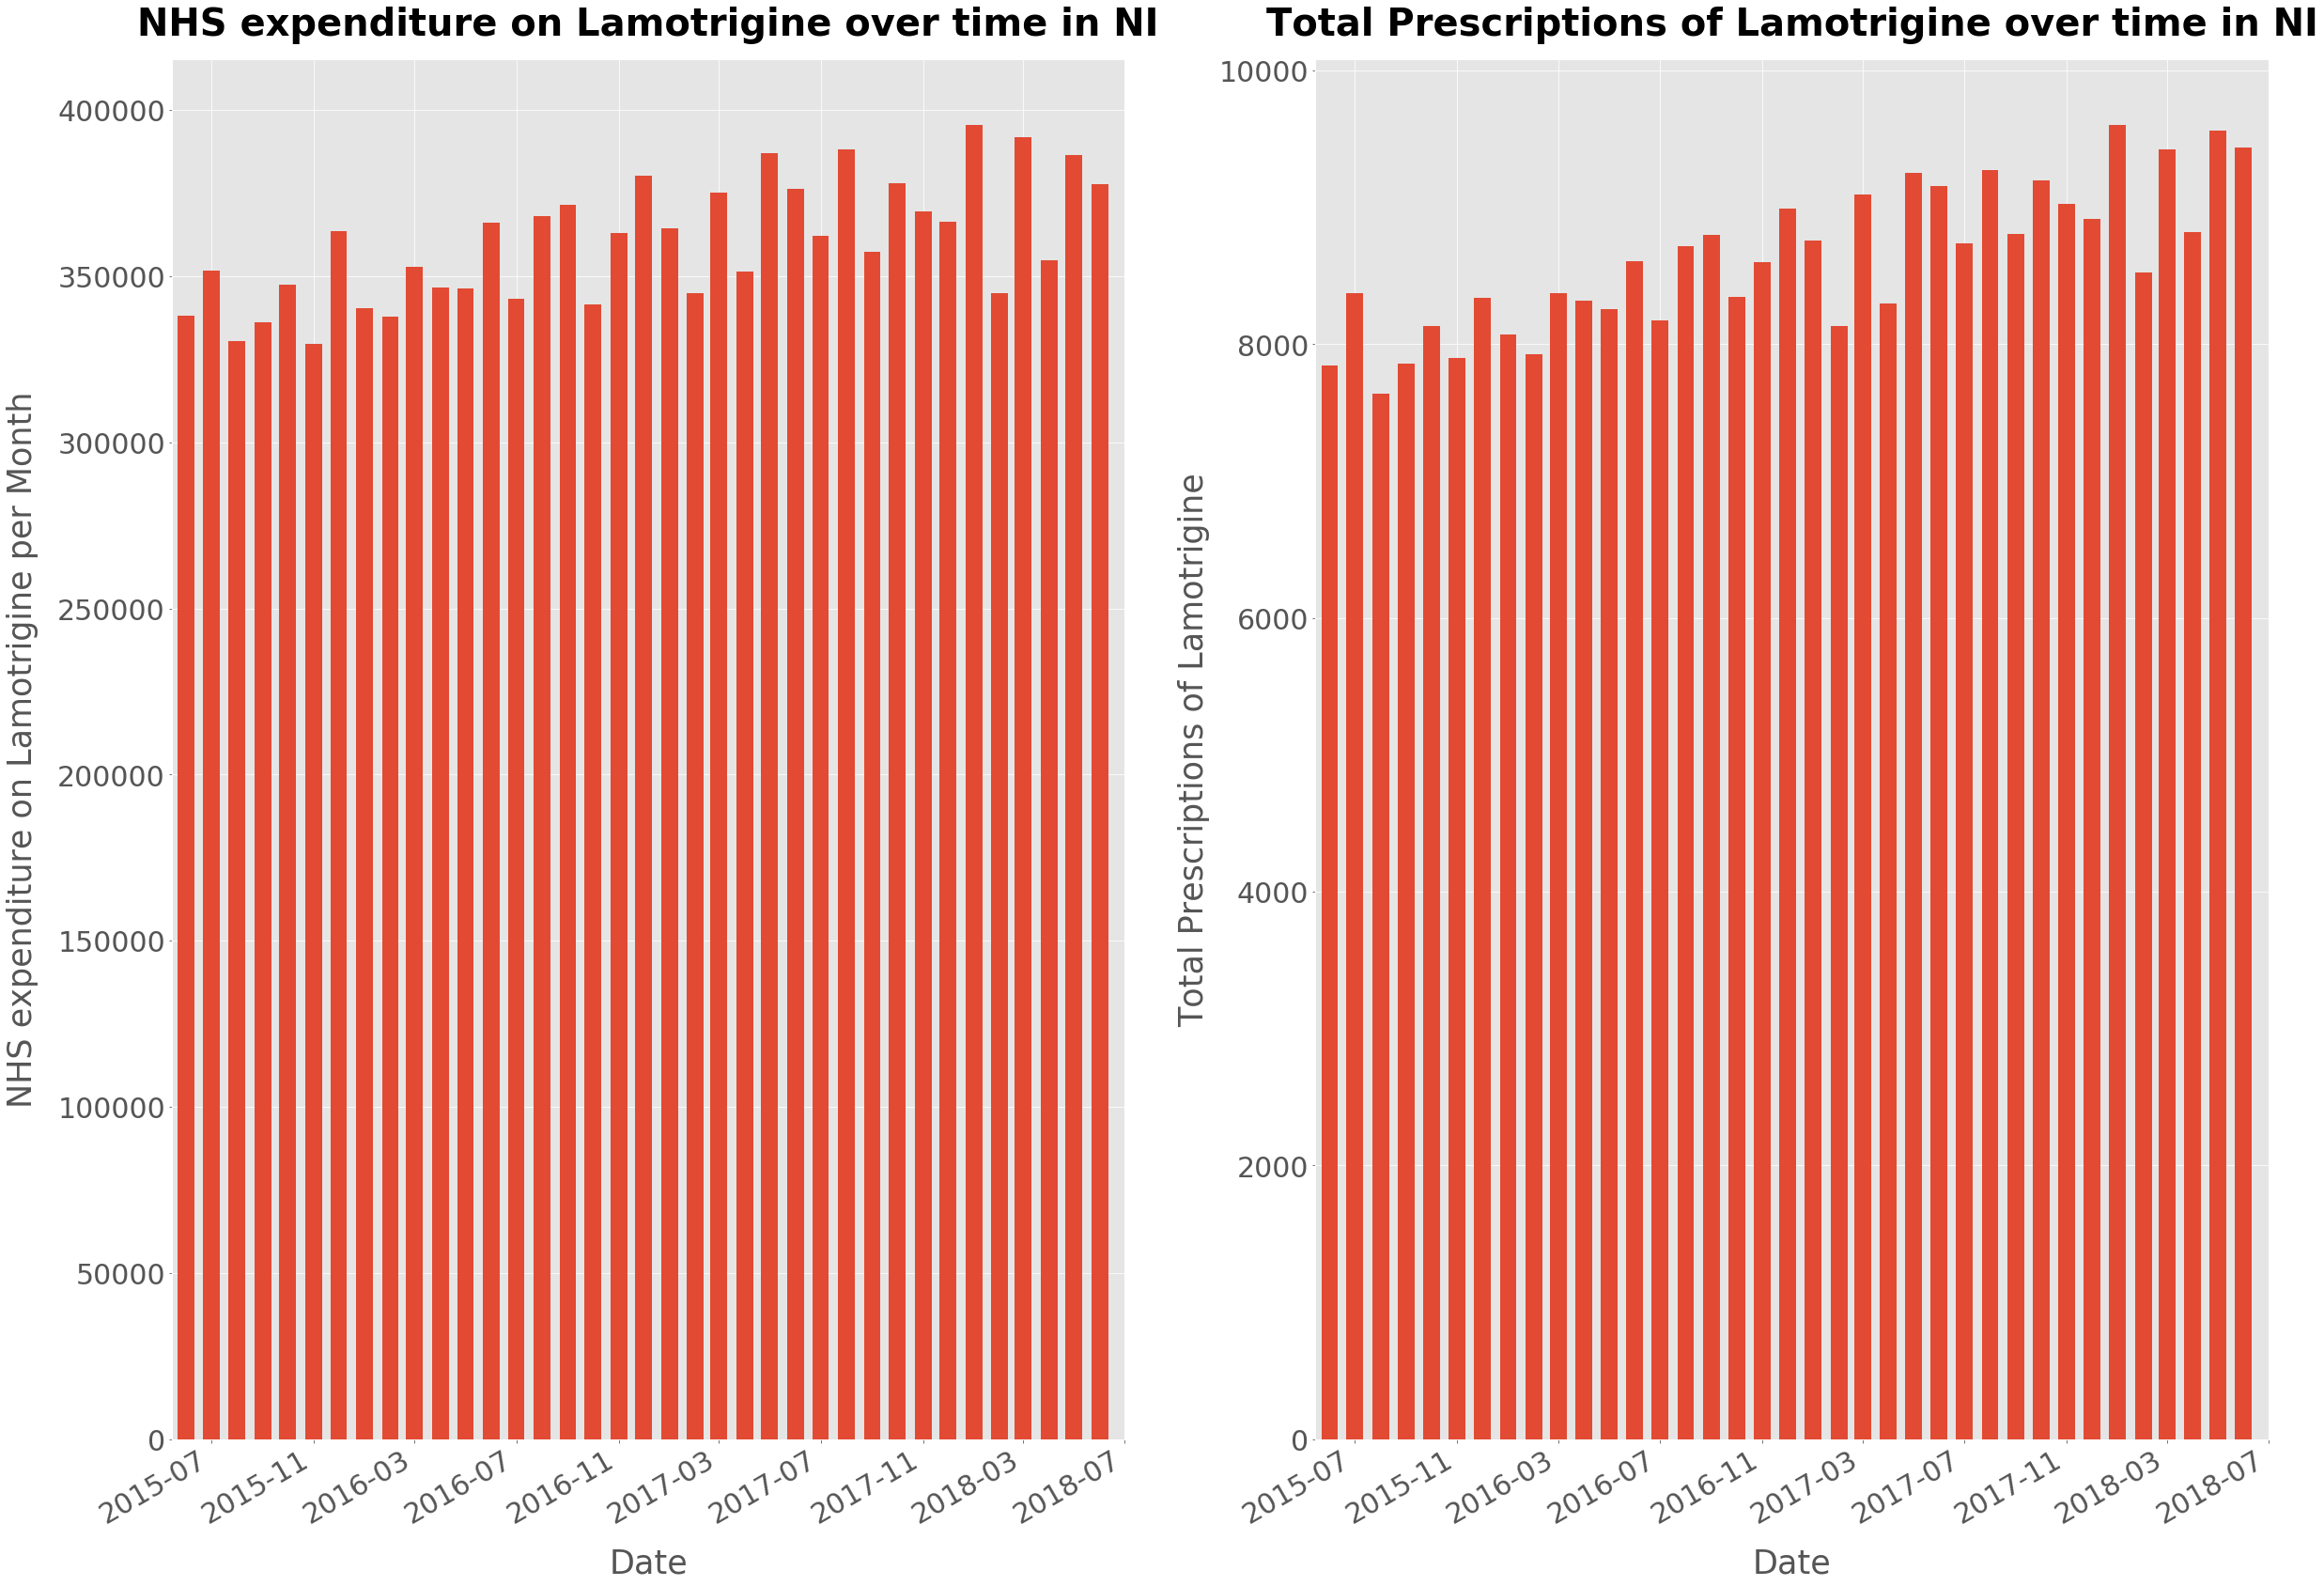

In [134]:
costPerMonth = groupbylist(Lamotrigine, "Actual Cost (£)", "Date")
itemsPerMonth = groupbylist(Lamotrigine, "Total Items", "Date")
fig, (ax, ax2) = plt.subplots(1, 2)
fig.set_size_inches(40,30)
#plt.subplot(1, 2, 1)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('NHS expenditure on Lamotrigine per Month', fontsize = 35, labelpad = 20.0)
ax.set_title('NHS expenditure on Lamotrigine over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax.grid(True)
ax.bar(allDates, costPerMonth, width = 20)
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
#ax.set_ylim([0,60000000])
#ax.set_xlim([datetime.date(2015, 12, 15),datetime.date(2018, 6, 30)])
ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Total Prescriptions of Lamotrigine', fontsize = 35, labelpad = 10.0)
ax2.set_title('Total Prescriptions of Lamotrigine over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax2.grid(True)
ax2.bar(allDates, itemsPerMonth, width = 20)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
plt.subplots_adjust(hspace = 0.2) 

In [135]:
compar = drugsbranded[LamotrigineB]
compar.reset_index(drop = True, inplace =True)
compar1 = drugsgeneric[LamotrigineG]
compar1.reset_index(drop = True, inplace =True)

gendates = sorted(compar1["Date"].unique())
brandates = sorted(compar["Date"].unique())
lamoBitems = groupbylist(compar, "Total Items", "Date")
lamoGitems = groupbylist(compar1, "Total Items", "Date")
lamoBcost = groupbylist(compar, "Actual Cost (£)", "Date")
lamoGcost = groupbylist(compar1, "Actual Cost (£)", "Date")


#For the quantity per cost Branded
qcompar = compar.loc[compar['Strength'] == '100mg']
BLquanpermonth = np.array(groupbylist(qcompar, "Total Quantity", "Date" ))
BLcostpermonth = np.array(groupbylist(qcompar, "Actual Cost (£)", "Date" ))
BLcostpermonth = BLcostpermonth/BLquanpermonth 

#For quantity of cost Generic
qcompar1 = compar1.loc[compar1['Strength'] == '100mg']
GLquanpermonth = np.array(groupbylist(qcompar1, "Total Quantity", "Date" ))
GLcostpermonth = np.array(groupbylist(qcompar1, "Actual Cost (£)", "Date" ))
GLcostpermonth = GLcostpermonth/GLquanpermonth 

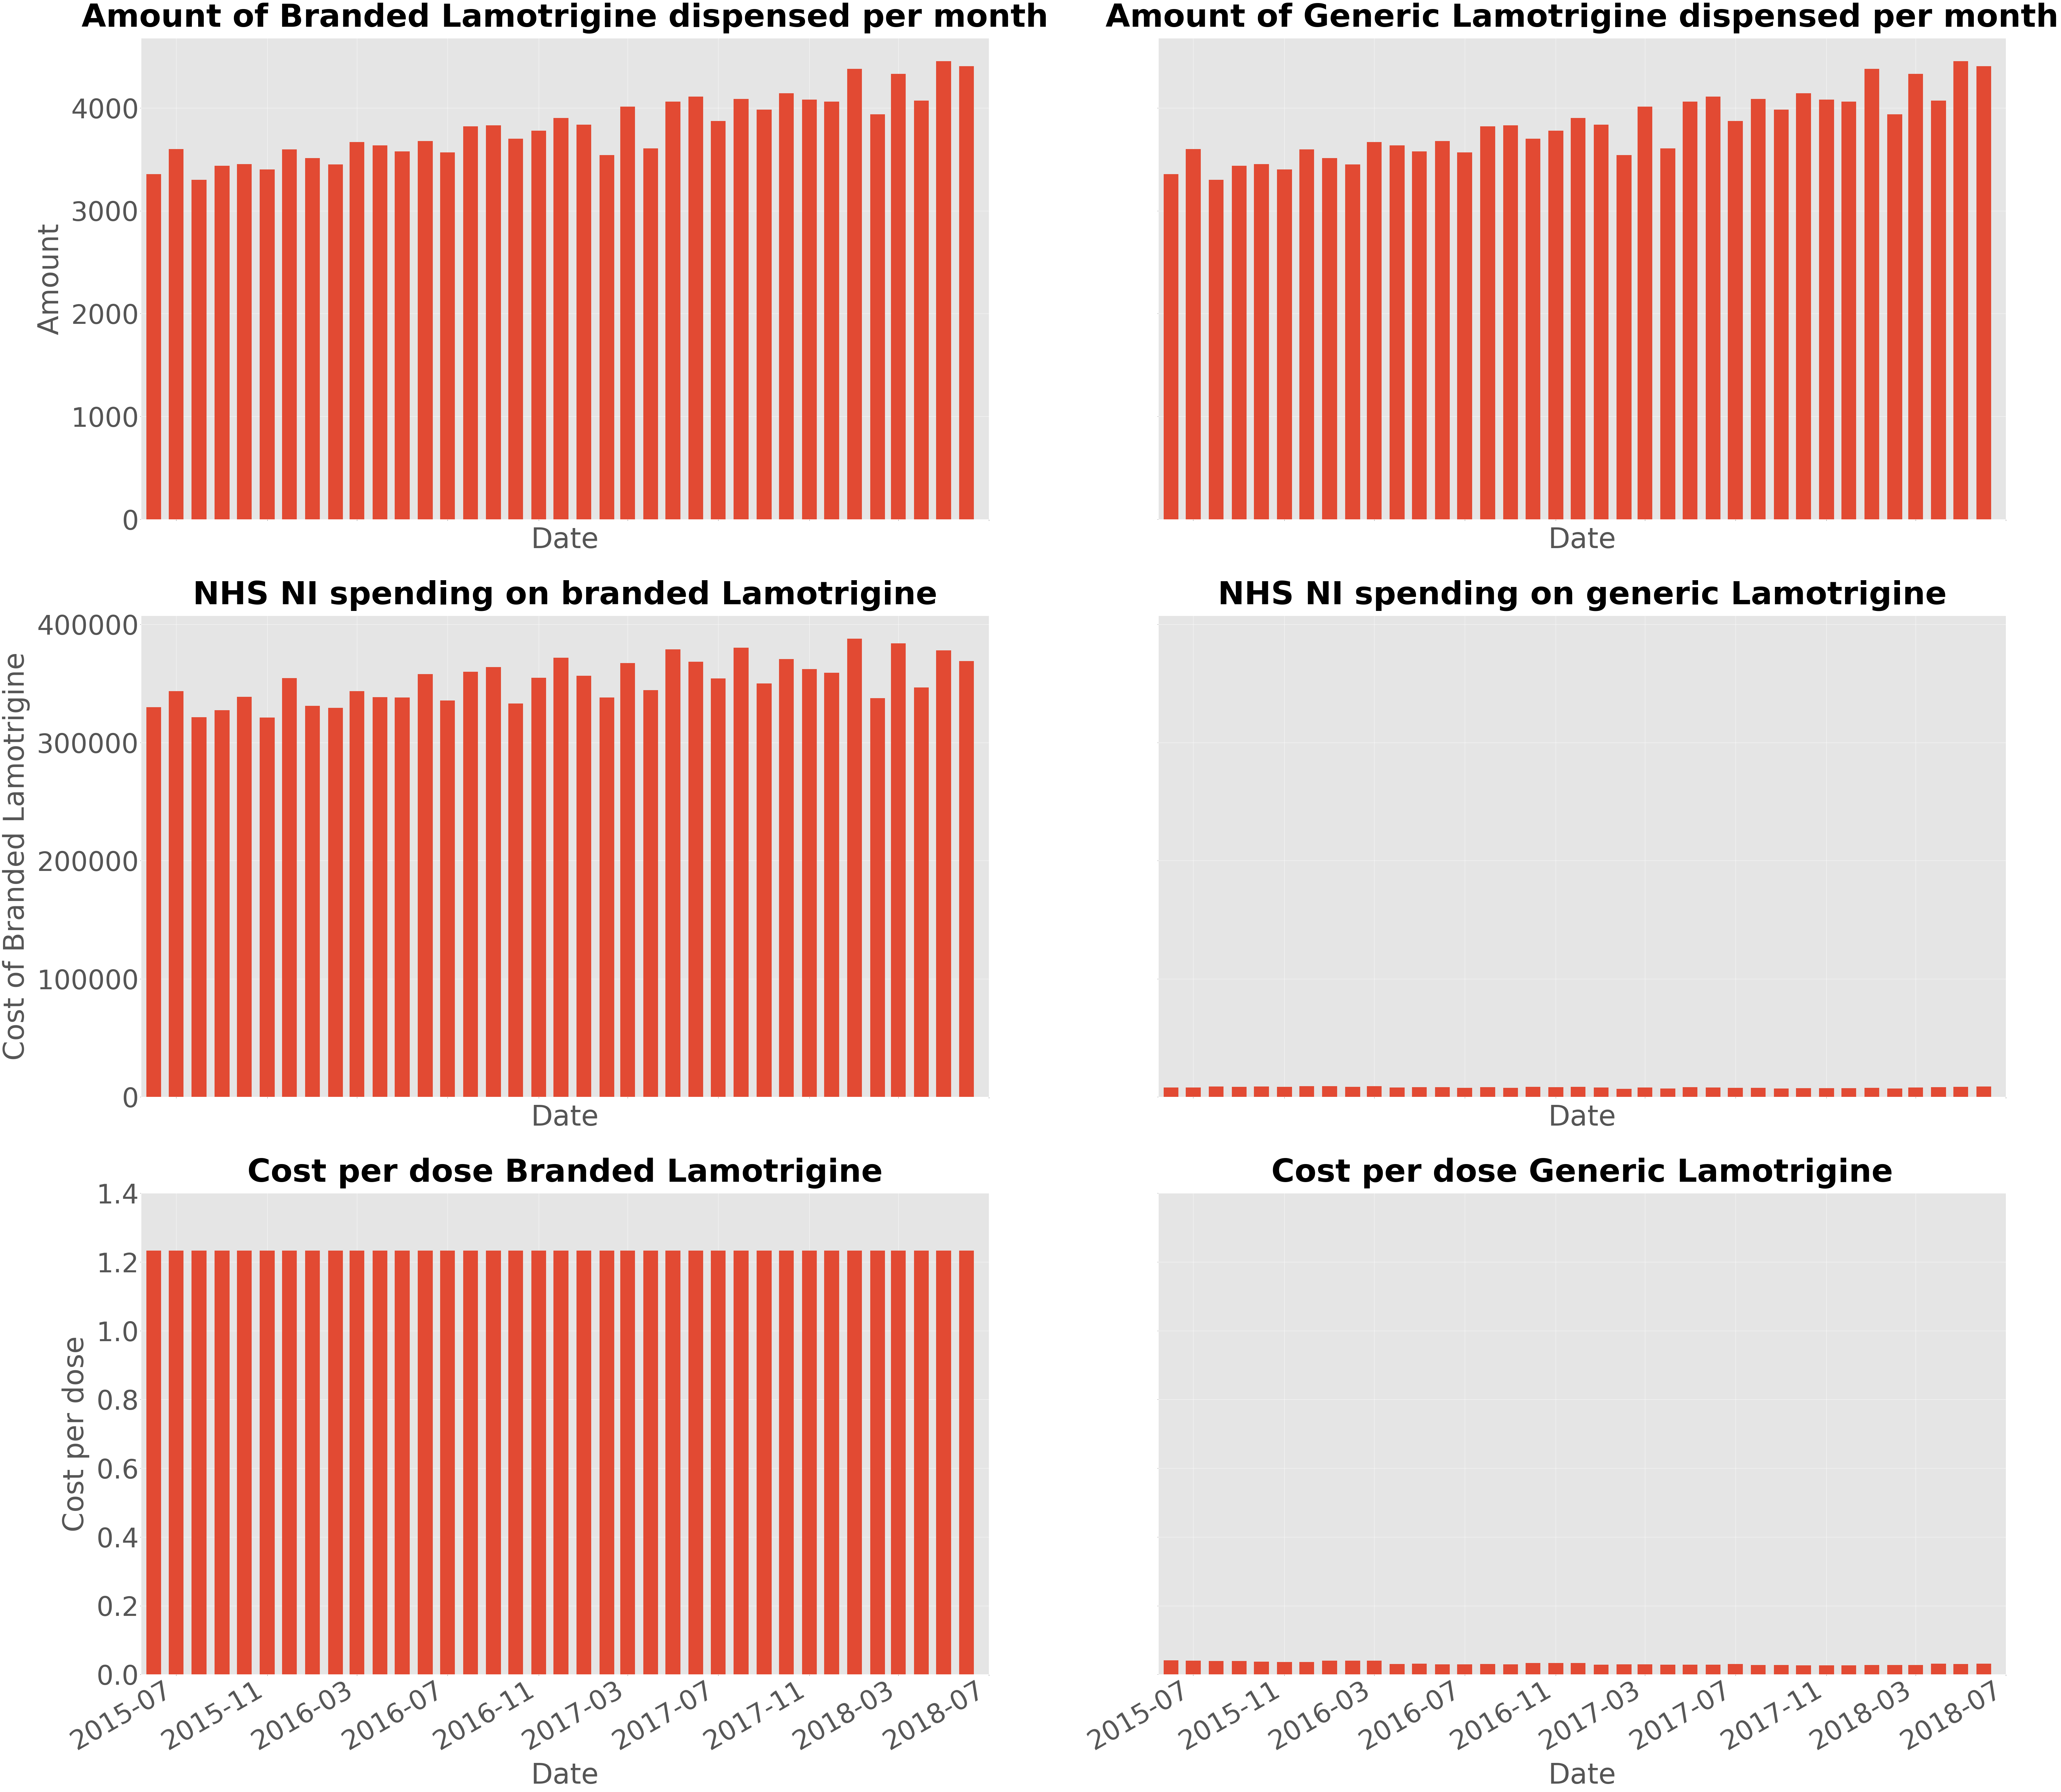

In [138]:
fig, ((ax5, ax6), (ax3, ax4), (ax1, ax2)) = plt.subplots(3, 2, sharey = 'row', sharex ='col')
fig.set_size_inches(100,100)
fig.autofmt_xdate()

ax3.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax3.set_ylabel('Cost of Branded Lamotrigine', fontsize = 85, labelpad = 20.0)
ax3.set_title('NHS NI spending on branded Lamotrigine', fontsize = 95, fontweight = 800, pad = 35.5)
ax3.grid(True)
ax3.bar(brandates, lamoBcost, width = 20)
ax3.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax3.xaxis.set_tick_params(labelsize = 80)
ax3.yaxis.set_tick_params(labelsize = 80)

ax4.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax4.grid(True)
ax4.bar(gendates, lamoGcost, width = 20)
ax4.set_title('NHS NI spending on generic Lamotrigine', fontsize = 95, fontweight = 800, pad = 35.5)
ax4.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax4.xaxis.set_tick_params(labelsize = 80)


ax5.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax5.set_ylabel('Amount', fontsize = 85, labelpad = 20.0)
ax5.set_title('Amount of Branded Lamotrigine dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax5.grid(True)
ax5.bar(brandates, lamoGitems, width = 20)
ax5.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax5.yaxis.set_tick_params(labelsize = 80)

ax6.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax6.set_title('Amount of Generic Lamotrigine dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax6.grid(True)
ax6.bar(gendates, lamoGitems, width = 20)
ax6.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])

ax1.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax1.set_ylabel('Cost per dose', fontsize = 85, labelpad = 20.0)
ax1.set_title('Cost per dose Branded Lamotrigine', fontsize = 95, fontweight = 800, pad = 35.5)
ax1.grid(True)
ax1.bar(brandates, BLcostpermonth, width = 20)
ax1.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax1.xaxis.set_tick_params(labelsize = 80)
ax1.yaxis.set_tick_params(labelsize =80)

ax2.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax2.grid(True)
ax2.bar(gendates, GLcostpermonth, width = 20)
ax2.set_title('Cost per dose Generic Lamotrigine', fontsize = 95, fontweight = 800, pad = 35.5)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.set_ylim(0, 1.4)
ax2.xaxis.set_tick_params(labelsize = 80)


<b> These visualisations clearly demonstrate that swift action needs to be taken in regards to replacing the branded Lamotrigine with it's generic counterpart. The saving potential is huge. These graphs show that in NI whilst roughly the same amount of generic and branded Lamotrigine are dispensed, the spending on the branded Lamotrigine absolutely dwarfs that of the generic version.</b>

# Gabapentin
Again a relatively common drug, there were 546,419 prescriptions of Gabapentin dispensed in NI from June 2015 - June 2018

N.B This drug is prescribed for children and adults who suffer from focal seizures

In [148]:
GGpresentations = dict(drugsgeneric[GabapentinG]["Presentation"].value_counts())
GGstrength = dict(drugsgeneric[GabapentinG]["Strength"].value_counts())
BGpresentations = dict(drugsbranded[GabapentinB]["Presentation"].value_counts())
BGstrength = dict(drugsbranded[GabapentinB]["Strength"].value_counts())

print("Types of generic Gabapentin Presentations", GGpresentations)
print("Types of branded Gabapentin Presentations", BGpresentations)
print("Types of generic Gabapentin Strength", GGstrength)
print("Types of branded Gabapentin Strength", BGstrength)

print("\nThere were", int(mySum(drugsgeneric[GabapentinG]["Total Items"])), \
      "generic prescriptions of Gabapentin from June 2015 - June 2018")

print("There were", int(mySum(drugsbranded[GabapentinB]["Total Items"])), \
      "branded prescriptions of Gabapentin from June 2015 - June 2018")

Types of generic Gabapentin Presentations {'Capsule': 32682, 'Tablet': 13915}
Types of branded Gabapentin Presentations {'Capsule': 3352, 'Oral solution': 2482, 'Tablet': 638}
Types of generic Gabapentin Strength {'300mg': 12619, '100mg': 11982, '600mg': 10418, '400mg': 8081, '800mg': 3497}
Types of branded Gabapentin Strength {'50mg/ml': 2482, '300mg': 2217, '100mg': 614, '400mg': 521, '600mg': 360, '800mg': 278}

There were 536890 generic prescriptions of Gabapentin from June 2015 - June 2018
There were 9529 branded prescriptions of Gabapentin from June 2015 - June 2018


In [149]:
compar = drugsbranded[GabapentinB]
compar = compar.loc[compar['Strength'] == '300mg']
compar.reset_index(drop = True, inplace =True)


compar1 = drugsgeneric[GabapentinG]
compar1 = compar1.loc[compar1['Strength'] == '300mg']
compar1.reset_index(drop = True, inplace =True)

In [150]:
costperbrandedG = mySum(compar['Actual Cost (£)'])/mySum(compar['Total Quantity'])
costpergenericG = mySum(compar1['Actual Cost (£)'])/mySum(compar1['Total Quantity'])


print(("Average cost per prescription for generic Gabapentin was £%.3f/300 micrograms") % \
       (costpergenericG))
print(("Average cost per prescription for branded Gabapentin was £%.3f/300 micrograms") % \
       (costperbrandedG))


times = costperbrandedG/costpergenericG

Ggencost = mySum(drugsgeneric[GabapentinG]["Actual Cost (£)"])
Gbrancost = mySum(drugsbranded[GabapentinB]["Actual Cost (£)"])
savings = Ggencost + Gbrancost/times
savings = (Ggencost + Gbrancost) - savings

print(("\nBranded Gabapentin costs the NHS %.2fx more than the generic version on average when they are the same preparation/strength") % (times))
print(("\nIf the NHS used the generic Gabapentin instead of the branded version from June 2015 - June 2018, then roughly the potential savings could have been £%.2f, which is £%.2f a calender year") % (savings, savings/3))

Average cost per prescription for generic Gabapentin was £0.043/300 micrograms
Average cost per prescription for branded Gabapentin was £0.424/300 micrograms

Branded Gabapentin costs the NHS 9.88x more than the generic version on average when they are the same preparation/strength

If the NHS used the generic Gabapentin instead of the branded version from June 2015 - June 2018, then roughly the potential savings could have been £842374.01, which is £280791.34 a calender year


# Gabapentin price analysis

In [142]:
Gabapentin = aeddrug[aeddrug['VTM_NM'] ==  'Gabapentin']
#Gabapentin.head()

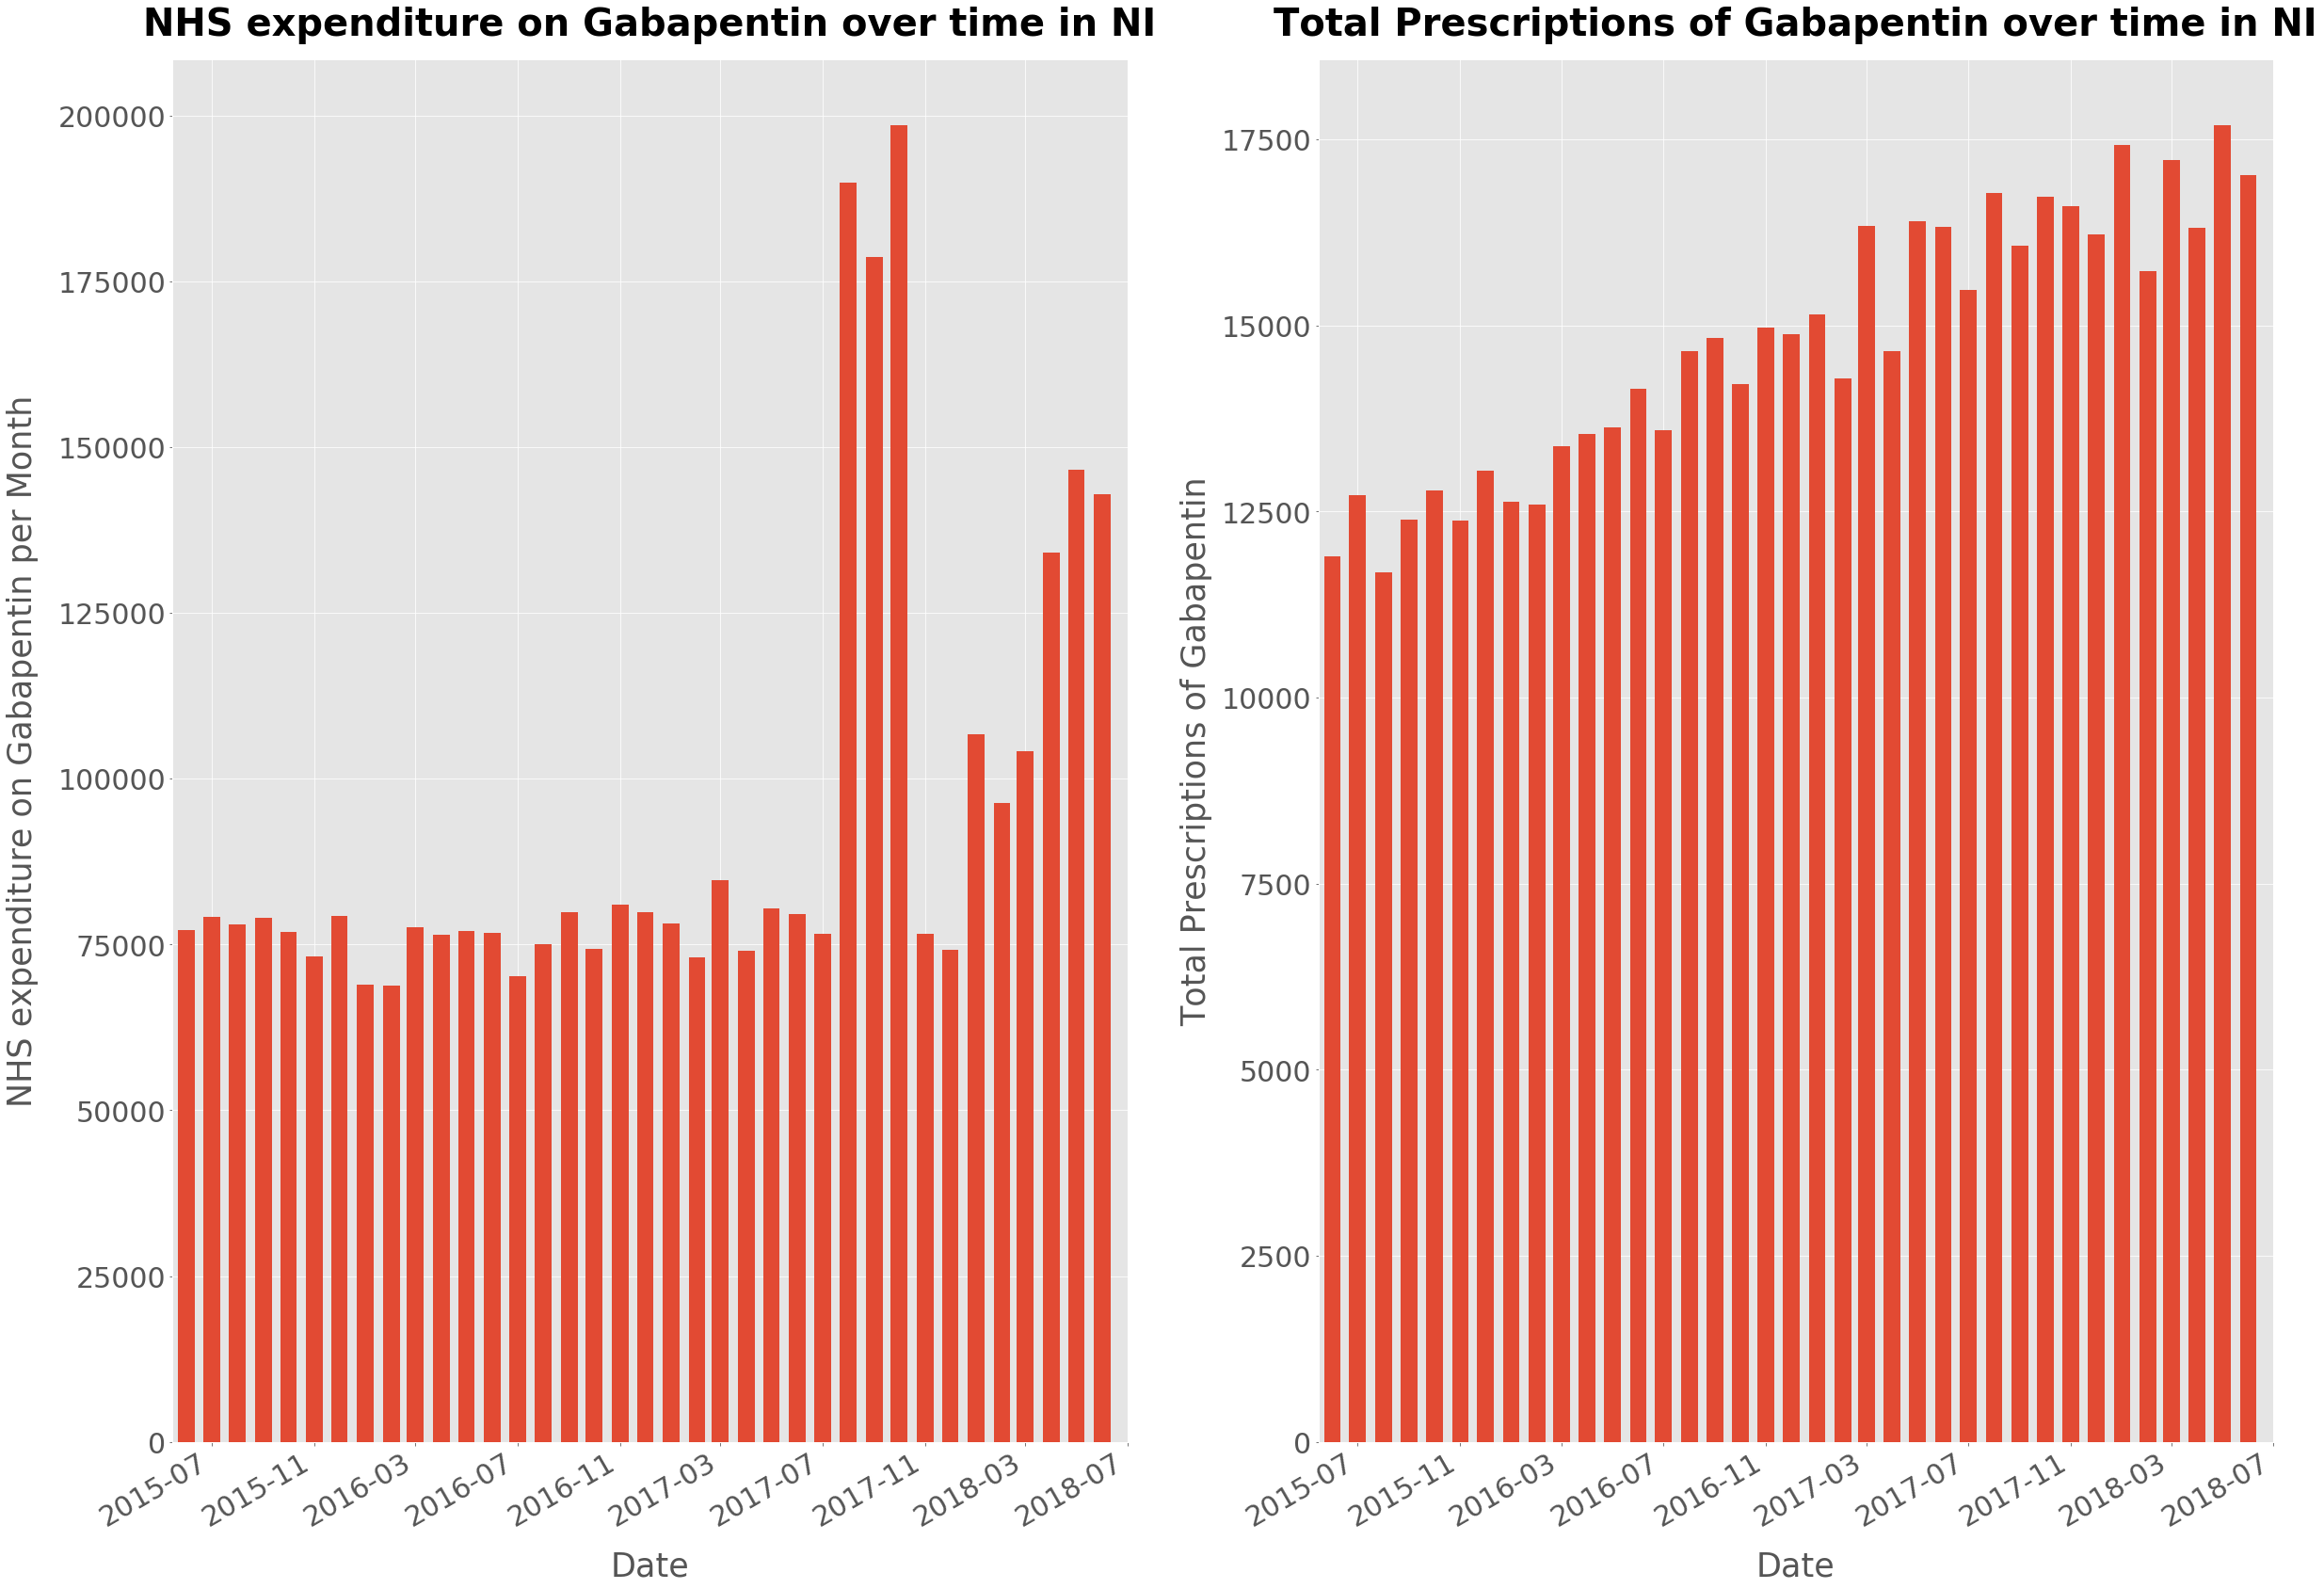

In [151]:
costPerMonth = groupbylist(Gabapentin, "Actual Cost (£)", "Date")
itemsPerMonth = groupbylist(Gabapentin, "Total Items", "Date")
fig, (ax, ax2) = plt.subplots(1, 2)
fig.set_size_inches(40,30)
#plt.subplot(1, 2, 1)
fig.autofmt_xdate()
ax.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax.set_ylabel('NHS expenditure on Gabapentin per Month', fontsize = 35, labelpad = 20.0)
ax.set_title('NHS expenditure on Gabapentin over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax.grid(True)
ax.bar(allDates, costPerMonth, width = 20)
ax.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
#ax.set_ylim([0,60000000])
#ax.set_xlim([datetime.date(2015, 12, 15),datetime.date(2018, 6, 30)])
ax2.set_xlabel('Date', fontsize = 35, labelpad = 20.0)
ax2.set_ylabel('Total Prescriptions of Gabapentin', fontsize = 35, labelpad = 10.0)
ax2.set_title('Total Prescriptions of Gabapentin over time in NI', fontsize = 40, fontweight = 800, pad = 25.5)
ax2.grid(True)
ax2.bar(allDates, itemsPerMonth, width = 20)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 30)
ax2.yaxis.set_tick_params(labelsize = 30)
plt.subplots_adjust(hspace = 0.2) 

In [152]:
compar = drugsbranded[GabapentinB]
compar.reset_index(drop = True, inplace =True)
compar1 = drugsgeneric[GabapentinG]
compar1.reset_index(drop = True, inplace =True)

gendates = sorted(compar1["Date"].unique())
brandates = sorted(compar["Date"].unique())
gabaBitems = groupbylist(compar, "Total Items", "Date")
gabaGitems = groupbylist(compar1, "Total Items", "Date")
gabaBcost = groupbylist(compar, "Actual Cost (£)", "Date")
gabaGcost = groupbylist(compar1, "Actual Cost (£)", "Date")


#For the quantity per cost Branded
qcompar = compar.loc[compar['Strength'] == '300mg']
BGquanpermonth = np.array(groupbylist(qcompar, "Total Quantity", "Date" ))
BGcostpermonth = np.array(groupbylist(qcompar, "Actual Cost (£)", "Date" ))
BGcostpermonth = BGcostpermonth/BGquanpermonth # cost per unit quantity (?)

#For quantity of cost Generic
qcompar1 = compar1.loc[compar1['Strength'] == '300mg']
GGquanpermonth = np.array(groupbylist(qcompar1, "Total Quantity", "Date" ))
GGcostpermonth = np.array(groupbylist(qcompar1, "Actual Cost (£)", "Date" ))
GGcostpermonth = GGcostpermonth/GGquanpermonth # cost per unit quantity (?)

(0, 0.6)

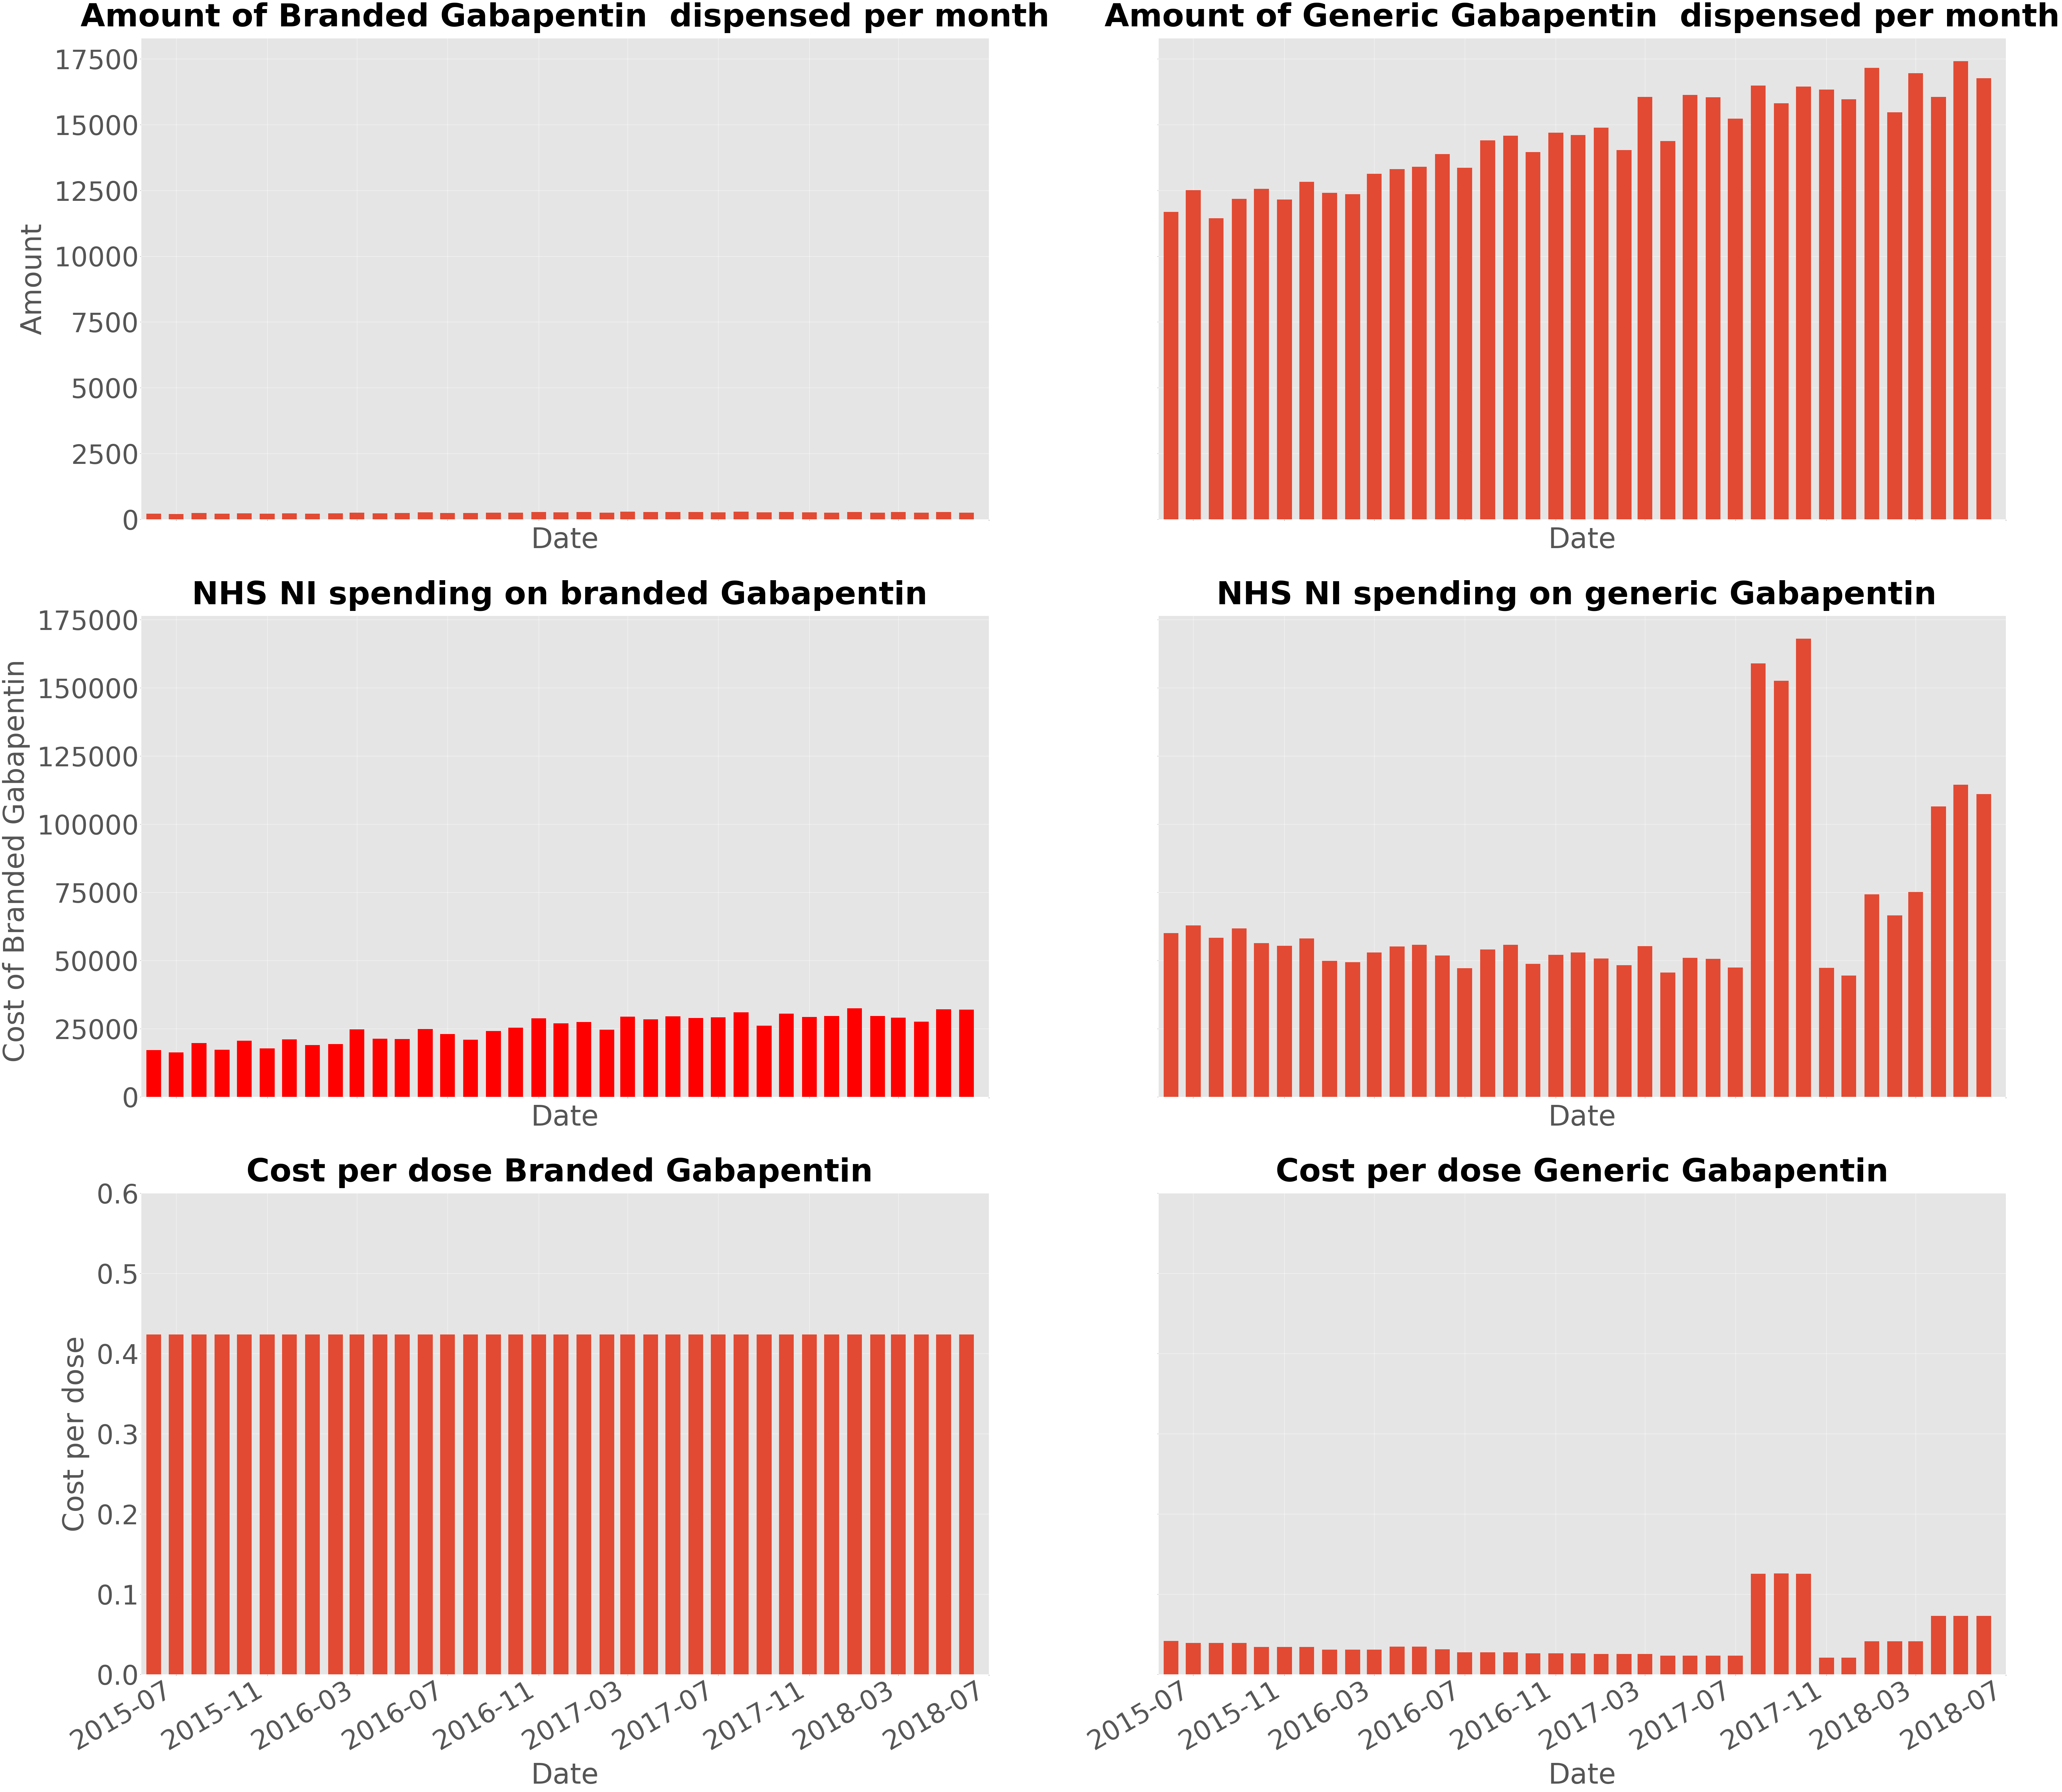

In [155]:
fig, ((ax5, ax6), (ax3, ax4), (ax1, ax2)) = plt.subplots(3, 2, sharey = 'row', sharex ='col')
fig.set_size_inches(100,100)
fig.autofmt_xdate()

ax3.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax3.set_ylabel('Cost of Branded Gabapentin ', fontsize = 85, labelpad = 20.0)
ax3.set_title('NHS NI spending on branded Gabapentin ', fontsize = 95, fontweight = 800, pad = 35.5)
ax3.grid(True)
ax3.bar(brandates, gabaBcost, width = 20, color = "red")
ax3.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax3.xaxis.set_tick_params(labelsize = 80)
ax3.yaxis.set_tick_params(labelsize = 80)

ax4.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax4.grid(True)
ax4.bar(gendates, gabaGcost, width = 20)
ax4.set_title('NHS NI spending on generic Gabapentin ', fontsize = 95, fontweight = 800, pad = 35.5)
ax4.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax4.xaxis.set_tick_params(labelsize = 80)


ax5.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax5.set_ylabel('Amount', fontsize = 85, labelpad = 20.0)
ax5.set_title('Amount of Branded Gabapentin  dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax5.grid(True)
ax5.bar(brandates, gabaBitems, width = 20)
ax5.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax5.yaxis.set_tick_params(labelsize = 80)

ax6.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax6.set_title('Amount of Generic Gabapentin  dispensed per month', fontsize = 95, fontweight = 800, pad = 35.5)
ax6.grid(True)
ax6.bar(gendates, gabaGitems, width = 20)
ax6.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])

ax1.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax1.set_ylabel('Cost per dose', fontsize = 85, labelpad = 20.0)
ax1.set_title('Cost per dose Branded Gabapentin ', fontsize = 95, fontweight = 800, pad = 35.5)
ax1.grid(True)
ax1.bar(brandates, BGcostpermonth, width = 20)
ax1.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax1.xaxis.set_tick_params(labelsize = 80)
ax1.yaxis.set_tick_params(labelsize =80)

ax2.set_xlabel('Date', fontsize = 85, labelpad = 20.0)
ax2.grid(True)
ax2.bar(gendates, GGcostpermonth, width = 20)
ax2.set_title('Cost per dose Generic Gabapentin', fontsize = 95, fontweight = 800, pad = 35.5)
ax2.set_xlim([datetime.date(2015, 5, 15),datetime.date(2018, 7, 1)])
ax2.xaxis.set_tick_params(labelsize = 80)
ax2.set_ylim(0, 0.6)


# Identifying which NI practices supply these branded drugs the most
<b> Here I only review the 2018 prescriptions of these drugs, as we are only concerned with practices who are recently prescribing these inefficient drugs. We'll not look at Ethosuximide as the branded version is not really an option to prescribe right now and the solution for dealing with the inefficency in connection with that drug would require a regulation change by a higher NHS authority such as NICE.
<br>
<br>
On the other hand though, switching from a branded version of a drug to a generic version does not require such complicated action, it only requires a simple change in judgement. I hope that by pinpointing which practices prescribe the branded versions of these drugs the most I can help the NHS advise them better on how to spend their resources.</b>

In [163]:
import numpy as np
dropcols = ["VMP_NM", "Total Quantity", "Strength", "Presentation", "AMP_NM", \
            "Gross Cost (£)","BNF Chapter","BNF Paragraph", "BNF Section", "BNF Sub-Paragraph"]

aed2018 = concatenate_files(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\HospitalsAndHealth\GP Prescribing 2018', dropcols = dropcols)
cols = ["Year", "Month"]
aed2018[cols] = aed2018[cols].applymap(np.int64)

aed2018 = aed2018.loc[(aed2018['VTM_NM'] == 'Clonazepam') | \
           (aed2018['VTM_NM'] == 'Gabapentin') | \
           (aed2018['VTM_NM'] == 'Lamotrigine')]

aed2018['Generic'] = aed2018['BNF Code'].str[10:12]
aed2018['Generic'].replace('AA', 'Generic', inplace = True)
aed2018.loc[aed2018['Generic'] != 'Generic', 'Generic'] = 'Not Generic'
aed2018.reset_index(drop = True, inplace = True)
print(aed2018.info())

aed2018["Date"] =  aed2018["Month"].astype(str) + aed2018["Year"].astype(str)
aed2018['Date'] = pd.to_datetime(aed2018['Date'], format ='%m%Y')
aed2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27456 entries, 0 to 27455
Data columns (total 8 columns):
Actual Cost (£)    27456 non-null float64
BNF Code           27456 non-null object
Month              27456 non-null int64
Practice           27456 non-null int64
Total Items        27456 non-null int64
VTM_NM             27456 non-null object
Year               27456 non-null int64
Generic            27456 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 1.7+ MB
None


Actual Cost (£)         BNF Code  Month  Practice  Total Items      VTM_NM  \
0         1.922339  0408010F0AAACAC      4         1            1  Clonazepam   
1       149.320062  0408010F0AAABAB      4         1            7  Clonazepam   
2         6.408045  0408010G0AAAAAA      4         1            3  Gabapentin   
3       242.033475  0408010G0AAABAB      4         1           24  Gabapentin   
4       113.632000  0408010G0BBABAB      4         1            2  Gabapentin   

   Year      Generic       Date  
0  2018      Generic 2018-04-01  
1  2018      Generic 2018-04-01  
2  2018      Generic 2018-04-01  
3  2018      Generic 2018-04-01  
4  2018  Not Generic 2018-04-01

<b> Again splitting up this data into generic and branded prescriptions. I want to keep the generic records of these drugs and see if maybe these practices which I will identify maybe just use a lot of the drug and could possibly use the branded versions only when there is a shortage. I can maybe find this out if they use the generic versions of their drugs far more than the branded versions.</b>

In [164]:
drugsgeneric18 = aed2018[aed2018['Generic'] == 'Generic']
drugsgeneric18.reset_index(inplace = True, drop = True)

print("There were", len(drugsgeneric18.index), \
      "generic versions of these drugs dispensed in the first half of 2018")

drugsgeneric18.head()

There were 17832 generic versions of these drugs dispensed in the first half of 2018


Actual Cost (£)         BNF Code  Month  Practice  Total Items      VTM_NM  \
0         1.922339  0408010F0AAACAC      4         1            1  Clonazepam   
1       149.320062  0408010F0AAABAB      4         1            7  Clonazepam   
2         6.408045  0408010G0AAAAAA      4         1            3  Gabapentin   
3       242.033475  0408010G0AAABAB      4         1           24  Gabapentin   
4         3.038634  0408010G0AAACAC      4         1            1  Gabapentin   

   Year  Generic       Date  
0  2018  Generic 2018-04-01  
1  2018  Generic 2018-04-01  
2  2018  Generic 2018-04-01  
3  2018  Generic 2018-04-01  
4  2018  Generic 2018-04-01

In [165]:
drugsbranded18 = aed2018[aed2018['Generic'] != 'Generic']
drugsbranded18.reset_index(inplace = True, drop = True)

print("There were", len(drugsbranded18.index), \
      "generic versions of these drugs dispensed in the first half of 2018")

drugsbranded18.head()

There were 9624 generic versions of these drugs dispensed in the first half of 2018


Actual Cost (£)         BNF Code  Month  Practice  Total Items  \
0       113.632000  0408010G0BBABAB      4         1            2   
1       138.000000  0408010G0AABGBG      4         1            1   
2       138.080000  0408010H0BBAFAW      4         1            1   
3       379.720000  0408010H0BBABAA      4         1            6   
4        42.537534  0408010H0BBAEAQ      4         1            1   

        VTM_NM  Year      Generic       Date  
0   Gabapentin  2018  Not Generic 2018-04-01  
1   Gabapentin  2018  Not Generic 2018-04-01  
2  Lamotrigine  2018  Not Generic 2018-04-01  
3  Lamotrigine  2018  Not Generic 2018-04-01  
4  Lamotrigine  2018  Not Generic 2018-04-01

In [166]:
ClonazepamB = drugsbranded18['VTM_NM'] ==  'Clonazepam'
GabapentinB = drugsbranded18['VTM_NM'] ==  'Gabapentin'
LamotrigineB = drugsbranded18['VTM_NM'] ==  'Lamotrigine'

In [169]:
from collections import Counter
PracticeC = dict(drugsbranded18[ClonazepamB]["Practice"].value_counts())
PracticeC = dict(Counter(PracticeC).most_common(20))
print(PracticeC)

{599: 8, 307: 8, 14: 7, 165: 7, 390: 6, 493: 6, 465: 6, 252: 6, 80: 6, 433: 6, 330: 6, 495: 6, 145: 6, 274: 5, 256: 5, 232: 5, 505: 5, 93: 5, 660: 5, 140: 5}


In [170]:
PracticeG = dict(drugsbranded18[GabapentinB]["Practice"].value_counts())
PracticeG = dict(Counter(PracticeG).most_common(20))
print(PracticeG)

{663: 24, 608: 22, 333: 21, 574: 17, 307: 16, 319: 15, 616: 15, 258: 14, 396: 13, 349: 13, 564: 12, 539: 12, 410: 12, 33: 12, 469: 12, 407: 12, 493: 11, 602: 11, 465: 11, 584: 11}


In [171]:
PracticeL = dict(drugsbranded18[LamotrigineB]["Practice"].value_counts())
PracticeL = dict(Counter(PracticeL).most_common(20))
print(PracticeL)

{615: 42, 596: 42, 609: 41, 93: 41, 663: 40, 662: 40, 599: 40, 431: 40, 606: 39, 624: 38, 604: 38, 81: 37, 598: 37, 664: 37, 597: 37, 469: 37, 536: 36, 345: 36, 621: 36, 516: 36}


<b> These Practice IDs don't tell me much, fortunately I was able to locate the supplementay file to this main dataset which describes which practice has which ID. Now I can merge the most recent Practice name reference file with my database and find the true names of these practices corresponding to their Practice ID in my original dataframe </b>

In [172]:
practicejul18 = pd.read_csv(r'C:\Users\fionn\OneDrive\Documents\3062dataanalysis\GP Practices\GP_Practice_Reference_File _July_2018.csv',\
                            encoding = 'ISO-8859-1', low_memory = False)
practicejul18.drop(["Unnamed: 8", "Unnamed: 9"], axis=1, inplace = True)
practicejul18.reset_index(drop = True, inplace = True)
practicejul18.rename(columns ={"Practice No": "Practice"}, inplace = True)

practicejul18.head()

Practice                         Practice Name  \
0         1  Dr. IRWIN & PARTNERS                   
1         3  Dr. MCCUTCHEON & PARTNERS              
2         5  Dr. MCBRIEN                            
3         6  Dr. SHARKEY & PARTNERS                 
4        10  Dr. WILSON & PARTNER                   

                        Address1                Address2           Address3  \
0       HARLAND MEDICAL PRACTICE      WESTMINSTER AVENUE            BELFAST   
1  HOLYWOOD ARCHES HEALTH CENTRE         WESTMINSTER AVE            BELFAST   
2          CASTLE MEDICAL CENTRE  35-45 CASTLEREAGH ROAD            BELFAST   
3              CARRYDUFF SURGERY       HILLSBOROUGH ROAD  CARRYDUFF BELFAST   
4      TEMPLEMORE MEDICAL CENTRE   225 ALBERTBRIDGE ROAD            BELFAST   

  Postcode      LCG  Registered Patients  
0  BT4 1NS  Belfast               6821.0  
1  BT4 1NS  Belfast               7178.0  
2  BT5 5FB  Belfast               1420.0  
3  BT8 8HR  Belfast              10956.0  
4  BT5 4PX  Belfast               2458.0

In [188]:
AED2018 = pd.merge(aed2018, practicejul18, on="Practice", how = "left")
print(AED2018.head())
print(AED2018.info())

   Actual Cost (£)         BNF Code  Month  Practice  Total Items      VTM_NM  \
0         1.922339  0408010F0AAACAC      4         1            1  Clonazepam   
1       149.320062  0408010F0AAABAB      4         1            7  Clonazepam   
2         6.408045  0408010G0AAAAAA      4         1            3  Gabapentin   
3       242.033475  0408010G0AAABAB      4         1           24  Gabapentin   
4       113.632000  0408010G0BBABAB      4         1            2  Gabapentin   

   Year      Generic       Date                         Practice Name  \
0  2018      Generic 2018-04-01  Dr. IRWIN & PARTNERS                   
1  2018      Generic 2018-04-01  Dr. IRWIN & PARTNERS                   
2  2018      Generic 2018-04-01  Dr. IRWIN & PARTNERS                   
3  2018      Generic 2018-04-01  Dr. IRWIN & PARTNERS                   
4  2018  Not Generic 2018-04-01  Dr. IRWIN & PARTNERS                   

                   Address1            Address2 Address3 Postcode      LCG

<b>About 116 records have not returned with a Practice Name, this could be due to a recent closure of a practice or an error in the GP Practice refernce file, anyways this isn't of concern as I can't recommend action against/ advise to a closed down GP practice </b>

In [189]:
#Redoing the splitting of the new dataframes into generic and branded
drugsgeneric18 = AED2018[AED2018['Generic'] == 'Generic']
drugsgeneric18.reset_index(inplace = True, drop = True)

drugsbranded18 = AED2018[AED2018['Generic'] != 'Generic']
drugsbranded18.reset_index(inplace = True, drop = True)

ClonazepamB = drugsbranded18['VTM_NM'] ==  'Clonazepam'
GabapentinB = drugsbranded18['VTM_NM'] ==  'Gabapentin'
LamotrigineB = drugsbranded18['VTM_NM'] ==  'Lamotrigine'

In [190]:
PracticeL = dict(drugsbranded18[LamotrigineB]["Practice Name"].value_counts())
PracticeL = dict(Counter(PracticeL).most_common(20))
print(PracticeL)

{'Dr. MCCLOSKEY & PARTNERS            ': 141, 'Dr. BAILIE & PARTNERS               ': 95, 'Dr. JOHNSTON & PARTNERS             ': 83, 'Dr. WILSON & PARTNERS               ': 75, 'Dr. PATTERSON & PARTNERS            ': 73, "Dr. O'FLAHERTY & PARTNERS           ": 72, 'Dr. POLLOCK & PARTNERS              ': 71, 'Dr. DORAN & PARTNERS                ': 67, "Dr. O'NEILL & PARTNERS              ": 65, 'Dr. ROSS & PARTNERS                 ': 65, 'Dr. WRIGHT & PARTNERS               ': 62, "Dr. O'DONNELL & PARTNERS            ": 61, 'Dr. IRWIN & PARTNERS                ': 61, 'Dr. MULHOLLAND & PARTNERS           ': 60, 'Dr. ALLEN & PARTNER                 ': 57, 'Dr. MCQUILLAN & PARTNERS            ': 54, 'Dr. MCILROY & PARTNERS              ': 54, 'Dr. GALLAGHER & PARTNERS            ': 52, 'Dr. HUEY & PARTNERS                 ': 51, 'Dr. CRAWFORD & PARTNERS             ': 51}


<b> The output above is different to the values I obtained above when I sorted by individual practice IDs, upon close inspection of the reference file the reason for this is because there are many practices sharing the same name - whether this is by chance or if it's part of a GP chain business cannot be determined for sure.
    
However, I'll have to distinguish these individual practices uniquely, I can do this by combining their Practice name with their postcode.

Also noticeable is the whitespace in each Practice Name entry, this can be easily rectified with the strip function</b>

In [191]:
drugsbranded18['Practice Name'] = drugsbranded18['Practice Name'].str.strip()
PracticeL = dict(drugsbranded18[LamotrigineB]["Practice Name"].value_counts())
PracticeL = dict(Counter(PracticeL).most_common(20))
print(PracticeL)

{'Dr. MCCLOSKEY & PARTNERS': 141, 'Dr. BAILIE & PARTNERS': 95, 'Dr. JOHNSTON & PARTNERS': 83, 'Dr. WILSON & PARTNERS': 75, 'Dr. PATTERSON & PARTNERS': 73, "Dr. O'FLAHERTY & PARTNERS": 72, 'Dr. POLLOCK & PARTNERS': 71, 'Dr. DORAN & PARTNERS': 67, 'Dr. ROSS & PARTNERS': 65, "Dr. O'NEILL & PARTNERS": 65, 'Dr. WRIGHT & PARTNERS': 62, "Dr. O'DONNELL & PARTNERS": 61, 'Dr. IRWIN & PARTNERS': 61, 'Dr. MULHOLLAND & PARTNERS': 60, 'Dr. ALLEN & PARTNER': 57, 'Dr. MCQUILLAN & PARTNERS': 54, 'Dr. MCILROY & PARTNERS': 54, 'Dr. GALLAGHER & PARTNERS': 52, 'Dr. HUEY & PARTNERS': 51, 'Dr. CRAWFORD & PARTNERS': 51}


C:\Users\fionn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b> OK the whitepsace is fixed, now to create unique practice names </b>

In [209]:
AED2018['Practice Name'] = AED2018['Practice Name'].str.strip()
AED2018['New Practice Name'] = AED2018['Practice Name'].astype(str) + " " + AED2018['Postcode'].astype(str)
#Redoing the allocation once again on the improved dataframe
drugsgeneric18 = AED2018[AED2018['Generic'] == 'Generic']
drugsgeneric18.reset_index(inplace = True, drop = True)

drugsbranded18 = AED2018[AED2018['Generic'] != 'Generic']
drugsbranded18.reset_index(inplace = True, drop = True)

ClonazepamB = drugsbranded18['VTM_NM'] ==  'Clonazepam'
GabapentinB = drugsbranded18['VTM_NM'] ==  'Gabapentin'
LamotrigineB = drugsbranded18['VTM_NM'] ==  'Lamotrigine'

ClonazepamG = drugsgeneric18['VTM_NM'] ==  'Clonazepam'
GabapentinG = drugsgeneric18['VTM_NM'] ==  'Gabapentin'
LamotrigineG = drugsgeneric18['VTM_NM'] ==  'Lamotrigine'


AED2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27456 entries, 0 to 27455
Data columns (total 17 columns):
Actual Cost (£)        27456 non-null float64
BNF Code               27456 non-null object
Month                  27456 non-null int64
Practice               27456 non-null int64
Total Items            27456 non-null int64
VTM_NM                 27456 non-null object
Year                   27456 non-null int64
Generic                27456 non-null object
Date                   27456 non-null datetime64[ns]
Practice Name          27340 non-null object
Address1               27340 non-null object
Address2               27340 non-null object
Address3               25253 non-null object
Postcode               27340 non-null object
LCG                    26719 non-null object
Registered Patients    27340 non-null float64
New Practice Name      27456 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 3.8+ MB


In [210]:
PracticeC = dict(drugsbranded18[ClonazepamB]["New Practice Name"].value_counts())
PracticeC = dict(Counter(PracticeC).most_common(20))
print(PracticeC)

{'Dr. FIELD & PARTNERS BT41 4BS': 8, "Dr. O'DONNELL & PARTNERS BT48 7DH": 8, 'Dr. KEANE & PARTNERS BT7 2GG': 7, 'Dr. COULTER & PARTNERS BT4 3HZ': 7, 'Dr. LAWSON & PARTNERS BT18 9AD': 6, 'Dr. CONWAY & PARTNERS BT14 6QG': 6, 'Dr. MCKENNA & PARTNERS BT41 4BS': 6, 'Dr. LOGAN & PARTNERS BT39 9HL': 6, 'Dr. ARMSTRONG & PARTNERS BT67 9AA': 6, 'Dr. KILLINER & PARTNERS BT12 5JJ': 6, 'Dr. CARSON & PARTNERS BT70 1HX': 6, 'Dr. BOLTON & PARTNERS BT38 7HT': 6, 'Dr. THOMPSON & PARTNERS BT71 6BX': 6, 'Dr. CRAIG & PARTNER BT20 5PE': 5, 'Dr. CHAMBERS & PARTNERS BT14 7QR': 5, 'Dr. MAHOOD & PARTNERS BT14 6JN': 5, 'Dr. MALLON & PARTNER BT74 6NN': 5, 'Dr. DICK & PARTNERS BT17 9AL': 5, 'Dr. GLANCY & PARTNERS BT45 5DD': 5, 'Dr. CORRY & PARTNERS BT79 9JR': 5}


In [206]:
PracticeG = dict(drugsbranded18[GabapentinB]["New Practice Name"].value_counts())
PracticeG = dict(Counter(PracticeG).most_common(20))
print(PracticeG)

{'Dr. DEEHAN & PARTNER BT79 0NR': 24, 'Dr. BLACK & PARTNERS BT48 9DN': 22, 'Dr. JOHNSTON & PARTNER BT41 3TF': 21, 'Dr. PORTEOUS & PARTNERS BT92 0FP': 17, 'Dr. FIELD & PARTNERS BT41 4BS': 16, 'Dr. BAILIE & PARTNERS BT81 7AZ': 15, 'Dr. MCCUSKER & PARTNERS BT44 8AD': 15, 'Dr. DREW & PARTNERS BT20 4LD': 14, 'Dr. STERNE & PARTNERS BT53 8TY': 13, 'Dr. VERCOE-ROGERS & PARTNER BT43 5AF': 13, 'Dr. MEADE & PARTNERS BT74 6NN': 12, 'Dr. IRWIN & PARTNERS BT80 8BH': 12, 'Dr. MCCANDLESS & PARTNERS BT32 3GN': 12, 'Dr. FORSHAW & PARTNERS BT35 6BW': 12, 'Dr. SHAW & PARTNERS BT46 5EA': 12, 'Dr. RODGERS & PARTNERS BT6 9DL': 12, 'Dr. THOMPSON & PARTNERS BT71 6BX': 11, 'Dr. REILLY BT78 3AU': 11, 'Dr. DOHERTY & PARTNERS BT48 7DH': 11, 'Dr. CROMIE & PARTNERS BT94 4JG': 11}


In [207]:
PracticeL = dict(drugsbranded18[LamotrigineB]["New Practice Name"].value_counts())
PracticeL = dict(Counter(PracticeL).most_common(20))
print(PracticeL)

{'Dr. LALSINGH & PARTNERS BT48 7GW': 42, 'Dr. MCCALLION & PARTNERS BT47 6AH': 42, 'Dr. MAHOOD & PARTNERS BT14 6JN': 41, 'Dr. PRATT & PARTNERS BT49 0TE': 41, 'Dr. DEEHAN & PARTNER BT79 0NR': 40, "Dr. O'DONNELL & PARTNERS BT48 7DH": 40, 'Dr. MEENAN & PARTNERS BT37 9UH': 40, 'Dr. GALLAGHER & PARTNERS BT79 0NR': 40, 'Dr. BANKHEAD & PARTNERS BT48 6LD': 39, 'Dr. MCCLOSKEY & PARTNERS BT48 7NY': 38, "Dr. O'FLAHERTY & PARTNERS BT47 6AH": 38, 'Dr. MCCANDLESS & PARTNERS BT32 3GN': 37, 'Dr. HICKS & PARTNER BT79 8DL': 37, 'Dr. DURAND & PARTNERS BT48 7NN': 37, 'Dr. MCHUGH & PARTNERS BT12 7AH': 37, 'Dr. MCQUILLAN & PARTNERS BT49 0TE': 37, 'Dr. LEAVY & PARTNERS BT12 7DP': 36, 'Dr. DOHERTY & PARTNERS BT48 7DH': 36, "Dr. O'HAGAN & PARTNERS BT61 7QG": 36, 'Dr. RYAN & PARTNERS BT28 1LU': 36}


<b> Again, I should be instead measuring how much of the branded drugs each practice is buying rather than how many times it comes up in the database. I can use my groupbylist function again - which will create a very long list, but it is the easiest and most reliable way to split up practices by a specific metric - in this instance actual cost.
<br>
<br>
I can then put these lists into their own columns each into a dataframe and I can sort which practices are outliers in terms of spending on branded prescriptions from there</b>

## Practices Dispensing Branded Clonazepam

In [250]:
allpracticeCB = list(drugsbranded18[ClonazepamB]["New Practice Name"].unique())
allpracticeCB = sorted(allpracticeCB)

ClonazepamCostB = groupbylist(drugsbranded18[ClonazepamB], "Actual Cost (£)", "New Practice Name")
#ClonazepamItemsB = groupbylist(drugsbranded18[ClonazepamB], "Total Items", "New Practice Name")

allpracticeCG = list(drugsgeneric18[ClonazepamG]["New Practice Name"].unique())
allpracticeCG = sorted(allpracticeCG)

ClonazepamCostG = groupbylist(drugsgeneric18[ClonazepamG], "Actual Cost (£)", "New Practice Name")
#ClonazepamItemsG = groupbylist(drugsgeneric18[ClonazepamG], "Total Items", "New Practice Name")

In [257]:
brandedclon = pd.DataFrame(
    {'Practice_Name': allpracticeCB,
     'Branded_Spend': ClonazepamCostB,
     #'Branded_Prescriptions': ClonazepamItemsB
    })
genericclon =  pd.DataFrame(
    {'Practice_Name': allpracticeCG,
     'Generic_Spend': ClonazepamCostG,
     #'Generic_Prescriptions': ClonazepamItemsG
    })
clon = pd.merge(brandedclon, genericclon, on="Practice_Name")
clon["Spend_diff"] = clon["Branded_Spend"] - clon["Generic_Spend"]
print(clon.head())

                       Practice_Name  Branded_Spend  Generic_Spend  Spend_diff
0  Dr. ARMSTRONG & PARTNERS BT67 9AA        1120.96         179.19      941.77
1   Dr. ATCHISON & PARTNERS BT25 1BD         750.51         420.84      329.67
2     Dr. BAILIE & PARTNERS BT81 7AZ         293.68        1742.97    -1449.29
3     Dr. BOLTON & PARTNERS BT38 7HT        1883.98         857.24     1026.74
4   Dr. CALDWELL & PARTNERS BT40 1PB        1208.47         650.20      558.27


In [271]:
#q90 = np.percentile(clon['Spend_diff'], [90])
q25, q75 = np.percentile(clon['Spend_diff'], [25, 75])
upper = q75 + 1.5*(q75-q25) 
outlierC = clon[clon['Spend_diff'] > upper]
outlierC.head(10)

Practice_Name  Branded_Spend  Generic_Spend  Spend_diff
16  Dr. COULTER & PARTNERS BT4 3HZ        2839.99         539.27     2300.72
18    Dr. DEANE & PARTNER BT48 8NL        1862.94         197.15     1665.79
30  Dr. GLANCY & PARTNERS BT45 5DD        3120.22         477.48     2642.74

<b> These practices should maybe be advised to use the generic version of the drug more often. It seems as though the spending on these drugs outweighs the generic spending in each of these practices so it's not down to these branded prescriptions only being given once in a blue moon. I'll continue my analysis with the other drugs which will most likely give more exciting results.
<br>
<br>
I attempted to find the outliers in spending difference between branded and generic prescriptions as just finding outliers in branded spend might just return large practices that happen to buy a lot of drugs, branded and generic - at least here we can see at a glance which practices use branded prescriptions a lot in comparison with other practices and in relation to how often they use generic products</b>

## Practices Dispensing Branded Gabapentin

In [265]:
allpracticeGB = list(drugsbranded18[GabapentinB]["New Practice Name"].unique())
allpracticeGB = sorted(allpracticeGB)

GabapentinCostB = groupbylist(drugsbranded18[GabapentinB], "Actual Cost (£)", "New Practice Name")
#GabapentinItemsB = groupbylist(drugsbranded18[GabapentinB], "Total Items", "New Practice Name")

allpracticeGG = list(drugsgeneric18[GabapentinG]["New Practice Name"].unique())
allpracticeGG = sorted(allpracticeGG)

GabapentinCostG = groupbylist(drugsgeneric18[GabapentinG], "Actual Cost (£)", "New Practice Name")
#GabapentinItemsG = groupbylist(drugsgeneric18[GabapentinG], "Total Items", "New Practice Name")

brandedgab = pd.DataFrame(
    {'Practice_Name': allpracticeGB,
     'Branded_Spend': GabapentinCostB,
     #'Branded_Prescriptions': ClonazepamItemsB
    })
genericgab =  pd.DataFrame(
    {'Practice_Name': allpracticeGG,
     'Generic_Spend': GabapentinCostG,
     #'Generic_Prescriptions': ClonazepamItemsG
    })
gab = pd.merge(brandedgab, genericgab, on="Practice_Name")
gab["Spend_diff"] = gab["Branded_Spend"] - gab["Generic_Spend"]
gab.head()

Practice_Name  Branded_Spend  Generic_Spend  Spend_diff
0       Dr. ALLEN & PARTNER BT35 9JJ         775.92         657.90      118.02
1   Dr. ARMSTRONG & PARTNER BT23 4FH          71.23        1573.81    -1502.58
2  Dr. ARMSTRONG & PARTNERS BT67 9AA         734.65        2489.85    -1755.20
3   Dr. ATCHISON & PARTNERS BT25 1BD         142.46        1289.11    -1146.65
4     Dr. BAILIE & PARTNERS BT81 7AZ        4084.38        4036.46       47.92

In [272]:
#q90 = np.percentile(gab['Spend_diff'], [90])
q25, q75 = np.percentile(gab['Spend_diff'], [25, 75])
upper = q75 + 1.5*(q75-q25) 
outlierG = gab[gab['Spend_diff'] > upper]
outlierG.head(10)

Practice_Name  Branded_Spend  Generic_Spend  \
17      Dr. CHEYNE & PARTNERS BT7 3GG        3312.00         629.53   
73    Dr. JOHNSTON & PARTNER BT41 3TF        3364.58         518.01   
185  Dr. THOMPSON & PARTNERS BT71 6BX        7078.05        1326.10   

     Spend_diff  
17      2682.47  
73      2846.57  
185     5751.95

## Practices Dispensing Branded Lamotrigine

In [274]:
allpracticeLB = list(drugsbranded18[LamotrigineB]["New Practice Name"].unique())
allpracticeLB = sorted(allpracticeLB)

LamotrigineCostB = groupbylist(drugsbranded18[LamotrigineB], "Actual Cost (£)", "New Practice Name")
#LamotrigineItemsB = groupbylist(drugsbranded18[LamotrigineB], "Total Items", "New Practice Name")

allpracticeLG = list(drugsgeneric18[LamotrigineG]["New Practice Name"].unique())
allpracticeLG = sorted(allpracticeLG)

LamotrigineCostG = groupbylist(drugsgeneric18[LamotrigineG], "Actual Cost (£)", "New Practice Name")
#LamotrigineItemsG = groupbylist(drugsgeneric18[LamotrigineG], "Total Items", "New Practice Name")

brandedlam = pd.DataFrame(
    {'Practice_Name': allpracticeLB,
     'Branded_Spend': LamotrigineCostB
     #'Branded_Prescriptions': LamotrigineItemsB
    })
genericlam =  pd.DataFrame(
    {'Practice_Name': allpracticeLG,
     'Generic_Spend': LamotrigineCostG
     #'Generic_Prescriptions': LamotrigineItemsG
    })
lam = pd.merge(brandedlam, genericlam, on="Practice_Name")
lam["Spend_diff"] = lam["Branded_Spend"] - lam["Generic_Spend"]

q25, q75 = np.percentile(lam['Spend_diff'], [25, 75])
upper = q75 + 1.5*(q75-q25) 
outlierL = lam[lam['Spend_diff'] > upper]
outlierL.head(100)

Practice_Name  Branded_Spend  Generic_Spend  \
8        Dr. BAILIE & PARTNERS BT81 7AZ       31489.04         256.73   
17       Dr. BOLTON & PARTNERS BT38 7HT       28631.09         172.39   
67      Dr. DOHERTY & PARTNERS BT48 7DH       19339.89         285.07   
92    Dr. GALLAGHER & PARTNERS BT79 0NR       18070.29         314.67   
138    Dr. JOHNSTON & PARTNERS BT53 6HB       20530.91           1.46   
153    Dr. LALSINGH & PARTNERS BT48 7GW       33256.52         158.28   
155      Dr. LAWSON & PARTNERS BT18 9AD       22111.75         313.58   
156       Dr. LEAVY & PARTNERS BT12 7DP       17857.97          30.86   
161       Dr. LOGAN & PARTNERS BT39 9HL       23315.25          73.88   
169     Dr. MAGUIRE & PARTNERS BT13 1AD       17735.21          80.09   
185   Dr. MCCLOSKEY & PARTNERS BT48 7NY       25531.54         280.73   
223      Dr. MEENAN & PARTNERS BT37 9UH       20052.38          62.30   
241   Dr. O'DONNELL & PARTNERS BT48 7DH       22368.20         164.11   
243  Dr. O'FLAHERTY & PARTNERS BT47 6AH       29931.83          92.78   

     Spend_diff  
8      31232.31  
17     28458.70  
67     19054.82  
92     17755.62  
138    20529.45  
153    33098.24  
155    21798.17  
156    17827.11  
161    23241.37  
169    17655.12  
185    25250.81  
223    19990.08  
241    22204.09  
243    29839.05

<b> Here is evidence of a much larger problem than the other two drugs, as we have seen before there is absolutely no difference in generic and branded Lamotrigine. Branded Lamotrigine does not offer an alternative strength/presentation method that would explain a GP's preference to using it instead of the generic version.
<br>
<br>
I would recommend that the NHS in NI should immediately advise these practices against using the branded Lamotrigine and alert them to the potential saving the NHS could make if they only prescribed the generic Lamotrigine, which again, is just as effective as the branded version</b>

## Ethical & legal concerns
<i> My report has no reason to be described as having ethical concerns as it only shows an overview of how to save money on prescription ourchases. It does not recommend that these drugs are not purchased, because while some of them are extortionatly priced, I cannot pretend to know what prescription medicines are best for patients. Especially for patients who have extreme epilepsy who would depend on some of these specific medicines more than most. I made sure to research diligently what the effects were of switching from branded to generic - and if there were any risks associated with my recommendations. Inded in the case of Clonazepam, I made sure to note that some patients may require the need of the liquid form of the medicine and this could explain why GPs may choose to dispense the more expensive branded version. Clearly no discrimination of sex, race or religion was present in my report either
<br>
<br>
Legally, whilst I idnetify individual practices and recommend action against them in some cases; I believe this is fair practice - as these medical practices are on public record and they spend public money to fulfill these prescriptions and so are somewhat acountble to the public. I made sure to not unfairly labelthem as outliers in thei branded spend by including their spend on generic products in the equation </i>
